In [1]:
import numpy as np 
import pandas as pd 
import math 
import datetime 
import seaborn as sns

### Load Cohort

In [233]:
# df_adm = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/admissions.txt", encoding = 'utf8', sep="\t")
# df_adm = df_adm[['subject_id','hadm_id','admittime','dischtime']].sort_values('admittime').drop_duplicates()
df_adm = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/Delirium/df_hadm.csv", encoding = 'utf8', sep=",")

df_dx_adm = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/subject_type.txt", encoding = 'utf8', sep="\t")

mydict = {}
for row in df_dx_adm.itertuples():
    k = row.subject_id
    v = row.subject_type
    mydict[k]=v

df_adm['subject_type'] = df_adm['subject_id'].map(mydict)
    
df_dx_adm = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/adm_type.txt", encoding = 'utf8', sep="\t")

mydict = {}
for row in df_dx_adm.itertuples():
    k = row.hadm_id
    v = row.adm_type
    mydict[k]=v
    
df_adm['adm_type'] = df_adm['hadm_id'].map(mydict)

In [315]:
df_hadm = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/Delirium/df_hadm.csv", encoding = 'utf8', sep=",")
# df_cohort_hadm = df_hadm.loc[df_hadm['age']!='0']
# df_cohort_hadm = df_cohort_hadm.loc[df_cohort_hadm['disabled']=='.']
# df_cohort_hadm = df_cohort_hadm.loc[df_cohort_hadm['los']>=1]
df_cohort_hadm = df_hadm.loc[df_hadm['filter']!=-1]
df_cohort_hadm1 = df_cohort_hadm.loc[df_cohort_hadm['highest_dose_given_haloperidol']<501]
df_cohort_hadm1 = df_cohort_hadm1.loc[df_cohort_hadm1['highest_dose_given_haloperidol']>0]
df_cohort_hadm2 = df_cohort_hadm.loc[df_cohort_hadm['icucam_valuenum']=='1']
df_cohort_hadm3 = df_cohort_hadm.loc[df_cohort_hadm['icd_seq_num']!='.']
frames = [df_cohort_hadm1,df_cohort_hadm2,df_cohort_hadm3]
df_cohort_hadm = pd.concat(frames).drop_duplicates()
df_cohort_hadm = df_cohort_hadm.loc[df_cohort_hadm['filter']!=0]

# df_dx_adm = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/subject_type.txt", encoding = 'utf8', sep="\t")

# mydict = {}
# for row in df_dx_adm.itertuples():
#     k = row.subject_id
#     v = row.subject_type
#     mydict[k]=v

# df_cohort_hadm['subject_type'] = df_cohort_hadm['subject_id'].map(mydict)
    
# df_dx_adm = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/adm_type.txt", encoding = 'utf8', sep="\t")

# mydict = {}
# for row in df_dx_adm.itertuples():
#     k = row.hadm_id
#     v = row.adm_type
#     mydict[k]=v
    
# df_cohort_hadm['adm_type'] = df_cohort_hadm['hadm_id'].map(mydict)

# df_cohort_hadm
# df_cohort_hadm.to_csv('/Users/yzm9199/Documents/NU/RWE/MIMIC/Delirium/df_cohort_hadm.csv')

In [318]:
# cohort_hadm = df_cohort_hadm['hadm_id'].tolist()
# df_dx_cohort_hadm = df_dx[df_dx['hadm_id'].isin(cohort_hadm)]

count = df_cohort_hadm.groupby('admission_type').size()
count.sort_values(ascending=False).head(50)

admission_type
EMER           5965
OBSERVATION    4376
SURGICAL        358
ELECTIVE        168
dtype: int64

### Check Dx

In [5]:
df_dx = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/diagnoses_icd.txt", encoding = 'utf8', sep="\t")
df_dx['icd_code'] = df_dx['icd_code'].str.strip()   

df_d_dx = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/d_icd_diagnoses.txt", encoding = 'utf8', sep="\t")
df_d_dx['icd_code'] = df_d_dx['icd_code'].str.strip()

mydict = {}
for row in df_d_dx.itertuples():
    k = row.icd_code
    v = row.long_title
    mydict[k]=v
df_dx['long_title'] = df_dx['icd_code'].map(mydict)

df_dx_group = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/dx_group.txt", encoding = 'utf8', sep="\t")
dx_group = {}
for row in df_dx_group.itertuples():
    k = row.icd_code
    v = row.dx_group
    dx_group[k]=v
    
df_dx['dx_group'] = df_dx['icd_code'].map(dx_group)
df_dx['dx_group'] = df_dx['dx_group'].fillna(df_dx['long_title'].str.replace(',',''))
df_dx = df_dx.loc[df_dx['dx_group'].notna()]

# df_dx_adm = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/subject_type.txt", encoding = 'utf8', sep="\t")
# mydict = {}
# for row in df_dx_adm.itertuples():
#     k = row.subject_id
#     v = row.subject_type
#     mydict[k]=v
# df_dx['subject_type'] = df_dx['subject_id'].map(mydict)
    
# df_dx_adm = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/adm_type.txt", encoding = 'utf8', sep="\t")
# mydict = {}
# for row in df_dx_adm.itertuples():
#     k = row.hadm_id
#     v = row.adm_type
#     mydict[k]=v
# df_dx['adm_type'] = df_dx['hadm_id'].map(mydict)

# df_dx = df_dx.loc[df_dx['seq_num']<=3]

df_dx

subject_id   hadm_id  seq_num icd_code  icd_version  \
0          11603789  25552978        3    65801            9   
1          11603789  25552978        4    64881            9   
2          11603789  25552978        5     V270            9   
3          11603789  25552978        1    65221            9   
4          11603789  25552978        2    64421            9   
...             ...       ...      ...      ...          ...   
4677919    13747041  25594844       10     N189           10   
4677920    13747041  25594844        5     N179           10   
4677921    13747041  25594844        6     R531           10   
4677922    13747041  25594844        1  T50901A           10   
4677923    13747041  25594844        8    R0902           10   

                                                long_title  \
0        Oligohydramnios, delivered, with or without me...   
1        Abnormal glucose tolerance of mother, delivere...   
2                     Outcome of delivery, single liveborn   
3        Breech presentation without mention of version...   
4        Early onset of delivery, delivered, with or wi...   
...                                                    ...   
4677919                Chronic kidney disease, unspecified   
4677920                  Acute kidney failure, unspecified   
4677921                                           Weakness   
4677922  Poisoning by unspecified drugs, medicaments an...   
4677923                                          Hypoxemia   

                        dx_group  
0                       Delivery  
1        Diabetes_Mellitus_comps  
2                       Delivery  
3                       Delivery  
4                       Delivery  
...                          ...  
4677919   Disease_Kidney_Chronic  
4677920            Disease_Renal  
4677921                  Fatigue  
4677922             Allergy_Drug  
4677923                Hypoxemia  

[4671356 rows x 7 columns]

In [4]:
df_dx1 = df_dx.loc[df_dx.dx_group.str.contains("Disease_Renal")][['hadm_id','seq_num']].drop_duplicates()
df_dx2 = df_dx.loc[df_dx.dx_group.str.contains("Failure_Heart")][['hadm_id','seq_num']].drop_duplicates()
df_dx3 = df_dx.loc[df_dx.dx_group.str.contains("Malignancy_ALL")][['hadm_id','seq_num']].drop_duplicates()
df_dx4 = df_dx.loc[df_dx.dx_group.str.contains("Diabetes_Mellitus_comps")][['hadm_id','seq_num']].drop_duplicates()
df_dx5 = df_dx.loc[df_dx.dx_group.str.contains("Disease_Kidney_Chronic")][['hadm_id','seq_num']].drop_duplicates()
df_dx6 = df_dx.loc[df_dx.dx_group.str.contains("Failure_Respiratory")][['hadm_id','seq_num']].drop_duplicates()
df_dx7 = df_dx.loc[df_dx.dx_group.str.contains("Septicemia_Bacteremia")][['hadm_id','seq_num']].drop_duplicates()
df_dx8 = df_dx.loc[df_dx.dx_group.str.contains("Hypertension")][['hadm_id','seq_num']].drop_duplicates()
df_dx9 = df_dx.loc[df_dx.dx_group.str.contains("Infection_Urinary")][['hadm_id','seq_num']].drop_duplicates()
df_dx10 = df_dx.loc[df_dx.dx_group.str.contains("Pneumonia")][['hadm_id','seq_num']].drop_duplicates()
df_dx11 = df_dx.loc[df_dx.dx_group.str.contains("Psychosis")][['hadm_id','seq_num']].drop_duplicates()
df_dx12 = df_dx.loc[df_dx.dx_group.str.contains("Toxic encephalopathy")][['hadm_id','seq_num']].drop_duplicates()
df_dx13 = df_dx.loc[df_dx.dx_group.str.contains("Fibrillation_Atrial")][['hadm_id','seq_num']].drop_duplicates()
df_dx14 = df_dx.loc[df_dx.dx_group.str.contains("Fibrosis_Pulmonary")][['hadm_id','seq_num']].drop_duplicates()
df_dx15 = df_dx.loc[df_dx.dx_group.str.contains("Infarction_Myocardial")][['hadm_id','seq_num']].drop_duplicates()
df_dx16 = df_dx.loc[df_dx.dx_group.str.contains("Arrhythmia_Cardiac")][['hadm_id','seq_num']].drop_duplicates()
df_dx17 = df_dx.loc[df_dx.dx_group.str.contains("Disease_Coronary_Artery")][['hadm_id','seq_num']].drop_duplicates()
df_dx18 = df_dx.loc[df_dx.dx_group.str.contains("Disease_Liver_Alcoholic")][['hadm_id','seq_num']].drop_duplicates()
df_dx19 = df_dx.loc[df_dx.dx_group.str.contains("Seizure_Epilepsy")][['hadm_id','seq_num']].drop_duplicates()
df_dx20 = df_dx.loc[df_dx.dx_group.str.contains("Fractures")][['hadm_id','seq_num']].drop_duplicates()
df_dx21 = df_dx.loc[df_dx.dx_group.str.contains("Malnutrition")][['hadm_id','seq_num']].drop_duplicates()
df_dx22 = df_dx.loc[df_dx.dx_group.str.contains("Alcoholism")][['hadm_id','seq_num']].drop_duplicates()
df_dx23 = df_dx.loc[df_dx.dx_group.str.contains("Depression")][['hadm_id','seq_num']].drop_duplicates()
df_dx24 = df_dx.loc[df_dx.dx_group.str.contains("Suicide_Gestures")][['hadm_id','seq_num']].drop_duplicates()
df_dx25 = df_dx.loc[df_dx.dx_group.str.contains("Ulcer_Skin")][['hadm_id','seq_num']].drop_duplicates()
df_dx26 = df_dx.loc[df_dx.dx_group.str.contains("Complaints_Functional_GI")][['hadm_id','seq_num']].drop_duplicates()
df_dx27 = df_dx.loc[df_dx.dx_group.str.contains("Dementia")][['hadm_id','seq_num']].drop_duplicates()
df_dx28 = df_dx.loc[df_dx.dx_group.str.contains("Asthma")][['hadm_id','seq_num']].drop_duplicates()
df_dx29 = df_dx.loc[df_dx.dx_group.str.contains("Acidosis")][['hadm_id','seq_num']].drop_duplicates()
df_dx30 = df_dx.loc[df_dx.dx_group.str.contains("Disorder_Bleeding")][['hadm_id','seq_num']].drop_duplicates()

In [381]:
df_dx1_g = df_dx1.groupby('hadm_id').size().reset_index()
df_dx2_g = df_dx2.groupby('hadm_id').size().reset_index()
df_dx3_g = df_dx3.groupby('hadm_id').size().reset_index()
df_dx4_g = df_dx4.groupby('hadm_id').size().reset_index()
df_dx5_g = df_dx5.groupby('hadm_id').size().reset_index()
df_dx6_g = df_dx6.groupby('hadm_id').size().reset_index()
df_dx7_g = df_dx7.groupby('hadm_id').size().reset_index()
df_dx8_g = df_dx8.groupby('hadm_id').size().reset_index()
df_dx9_g = df_dx9.groupby('hadm_id').size().reset_index()
df_dx10_g = df_dx10.groupby('hadm_id').size().reset_index()
df_dx11_g = df_dx11.groupby('hadm_id').size().reset_index()
df_dx12_g = df_dx12.groupby('hadm_id').size().reset_index()
df_dx13_g = df_dx13.groupby('hadm_id').size().reset_index()
df_dx14_g = df_dx14.groupby('hadm_id').size().reset_index()
df_dx15_g = df_dx15.groupby('hadm_id').size().reset_index()
df_dx16_g = df_dx16.groupby('hadm_id').size().reset_index()
df_dx17_g = df_dx17.groupby('hadm_id').size().reset_index()
df_dx18_g = df_dx18.groupby('hadm_id').size().reset_index()
df_dx19_g = df_dx19.groupby('hadm_id').size().reset_index()
df_dx20_g = df_dx20.groupby('hadm_id').size().reset_index()
df_dx21_g = df_dx21.groupby('hadm_id').size().reset_index()
df_dx22_g = df_dx22.groupby('hadm_id').size().reset_index()
df_dx23_g = df_dx23.groupby('hadm_id').size().reset_index()
df_dx24_g = df_dx24.groupby('hadm_id').size().reset_index()
df_dx25_g = df_dx25.groupby('hadm_id').size().reset_index()
df_dx26_g = df_dx26.groupby('hadm_id').size().reset_index()
df_dx27_g = df_dx27.groupby('hadm_id').size().reset_index()
df_dx28_g = df_dx28.groupby('hadm_id').size().reset_index()
df_dx29_g = df_dx29.groupby('hadm_id').size().reset_index()
df_dx30_g = df_dx30.groupby('hadm_id').size().reset_index()

In [382]:
mydict = {}
for row in df_dx1_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx1'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx2_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx2'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx3_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx3'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx4_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx4'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx5_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx5'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx6_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx6'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx7_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx7'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx8_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx8'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx9_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx9'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx10_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx10'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx11_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx11'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx12_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx12'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx13_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx13'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx14_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx14'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx15_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx15'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx16_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx16'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx17_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx17'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx18_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx18'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx19_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx19'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx20_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx20'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx21_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx21'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx22_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx22'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx23_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx23'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx24_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx24'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx25_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx25'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx26_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx26'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx27_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx27'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx28_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx28'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx29_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx29'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_dx30_g.itertuples():
    k = row.hadm_id
    v = row[2]
    mydict[k]=v
df_adm_imputed_mean['df_dx30'] = df_adm_imputed_mean['hadm_id'].map(mydict)

df_adm_imputed_mean = df_adm_imputed_mean.fillna(0)

### Cohort Demographic

In [18]:
df_pt = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/patients.txt", encoding = 'utf8', sep="\t")
df_cohort = df_pt[df_pt['subject_id'].isin(cohort)]
df_cohort

subject_id gender  anchor_age  anchor_year anchor_year_group  dod
7871      10055625      M          55         2148       2014 - 2016  NaN
7875      10056612      F          70         2183       2008 - 2010  NaN
7940      10071281      M          88         2156       2014 - 2016  NaN
7953      10074434      F          76         2155       2008 - 2010  NaN
7997      10086652      F          20         2141       2011 - 2013  NaN
...            ...    ...         ...          ...               ...  ...
383048    19961152      M          86         2148       2014 - 2016  NaN
383069    19965408      F          81         2132       2014 - 2016  NaN
383084    19969593      F          20         2139       2014 - 2016  NaN
383127    19979360      M          71         2176       2017 - 2019  NaN
383169    19987602      F          88         2165       2017 - 2019  NaN

[6837 rows x 6 columns]

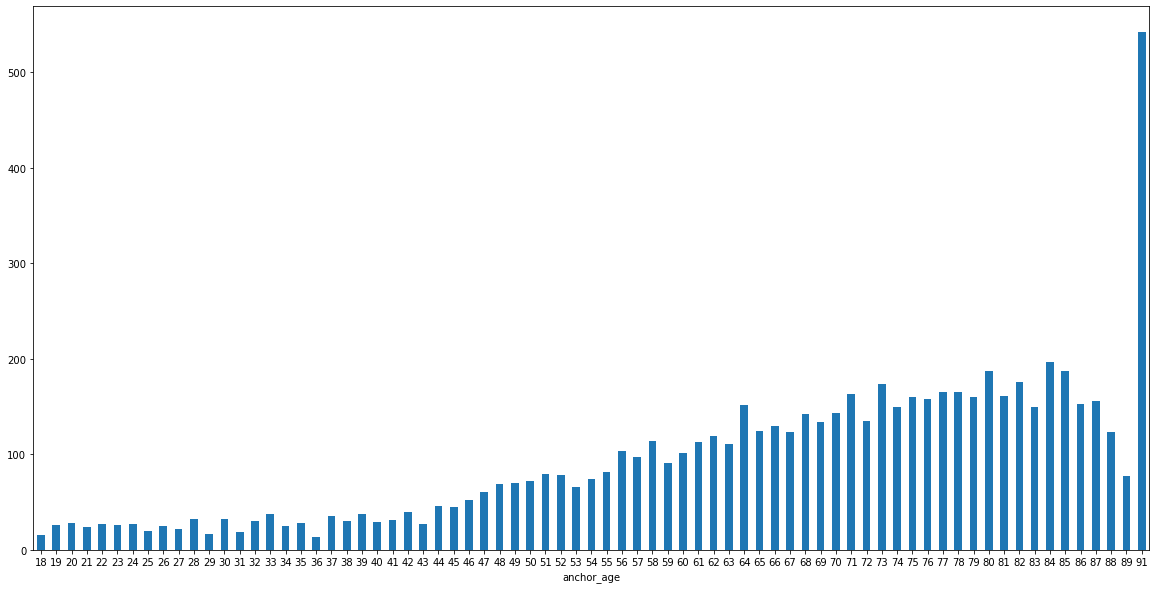

In [39]:
dx_age = df_cohort.groupby('anchor_age').size()
ax = dx_age.plot.bar(rot=0, figsize=(20,10))

In [40]:
dx_gender = df_cohort.groupby('gender').size()
dx_gender

gender
F    3288
M    3549
dtype: int64

### Dx Adm_Type

[(-0.5, 30.5)]

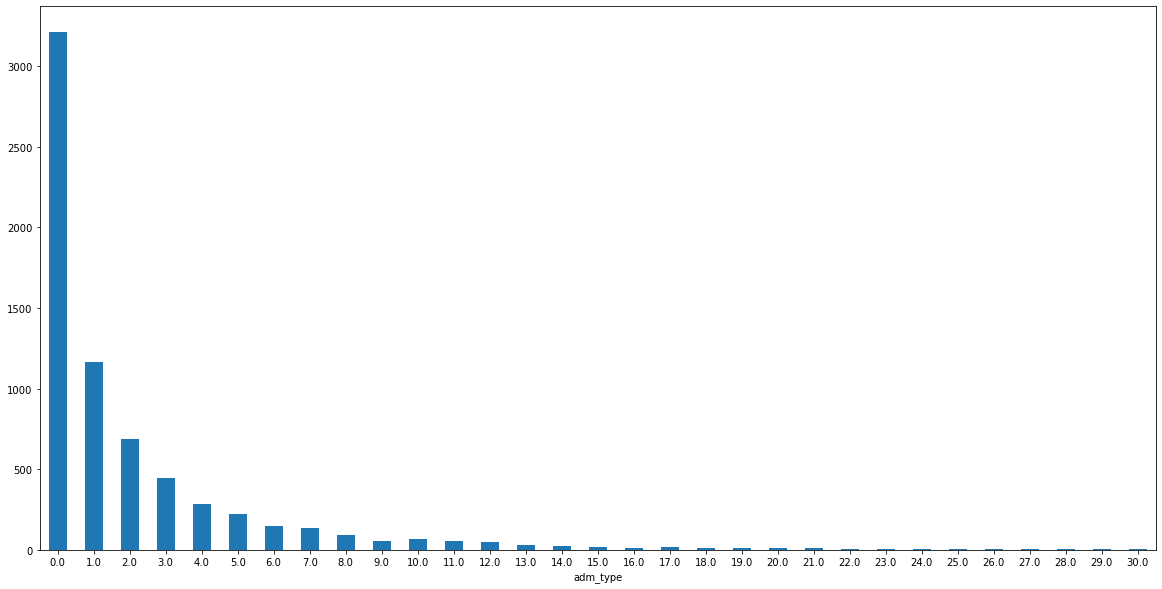

In [33]:
df_new = df_new.loc[df_new['dx_group']=='Delirium']
dx_min = df_new.groupby(['subject_id'], sort=False)['adm_type'].min()
dx_min = dx_min.to_frame()
dx_min_count = dx_min.groupby('adm_type').size()
ax = dx_min_count.plot.bar(rot=0, figsize=(20,10))
ax.set(xlim=(-0.5, 30.5))

### Check Chart

In [ ]:
df_adm = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/admissions.txt", encoding = 'utf8', sep="\t")
df_adm = df_adm[['subject_id','hadm_id','admittime','dischtime']].drop_duplicates()

mydict = {}
for row in df_adm.itertuples():
    k = row.hadm_id
    v = row.admittime
    mydict[k]=v
    
df_delirium_adm['admittime'] = df_delirium_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_adm.itertuples():
    k = row.hadm_id
    v = row.dischtime
    mydict[k]=v
    
df_delirium_adm['dischtime'] = df_delirium_adm['hadm_id'].map(mydict)

In [6]:
df_chart_all = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/chartevents.txt", encoding = 'utf8', sep="\t")
# df_chart = df_chart_all[df_chart_all['hadm_id'].isin(cohort_adm)]
df_chart = df_chart_all

/Users/yzm9199/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [37]:
df_icucam1 = df_chart.loc[df_chart['itemid']==229324]
df_icucam2 = df_chart.loc[df_chart['itemid']==229325]
df_icucam3 = df_chart.loc[df_chart['itemid']==229326]
df_icucam4 = df_chart.loc[df_chart['itemid']==229334]
df_icucam5 = df_chart.loc[df_chart['itemid']==228300]
df_icucam6 = df_chart.loc[df_chart['itemid']==228301]
df_icucam7 = df_chart.loc[df_chart['itemid']==228302]
df_icucam8 = df_chart.loc[df_chart['itemid']==228303]
df_icucam9 = df_chart.loc[df_chart['itemid']==228335]
df_icucam10 = df_chart.loc[df_chart['itemid']==228336]
df_icucam11 = df_chart.loc[df_chart['itemid']==228337]
frames = [df_icucam1, df_icucam2, df_icucam3, df_icucam4, df_icucam5, df_icucam6, df_icucam7, df_icucam8, df_icucam9, df_icucam10, df_icucam11]
df_icucam = pd.concat(frames).sort_values(by=['charttime'])

mydict = {}
for row in df_adm.itertuples():
    k = row.hadm_id
    v = row.admittime
    mydict[k]=v
df_icucam['admittime'] = df_icucam['hadm_id'].map(mydict)

mydict = {}
for row in df_adm.itertuples():
    k = row.hadm_id
    v = row.dischtime
    mydict[k]=v
df_icucam['dischtime'] = df_icucam['hadm_id'].map(mydict)

df_icucam.to_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/Delirium/df_icucam.csv")

In [ ]:
df_wt_kg = df_chart.loc[df_chart['itemid']==226512]
df_wt_lb = df_chart.loc[df_chart['itemid']==226531]
df_wt_d = df_chart.loc[df_chart['itemid']==224639]
df_wt_kg['value1'] = df_wt_kg['valuenum'].astype(float)
df_wt_lb['value1'] = df_wt_lb['valuenum'].astype(float) * 0.45359237
df_wt_d['value1'] = df_wt_d['valuenum'].astype(float)

df_vent = df_chart.loc[df_chart['itemid']==223848]

df_heart_rate = df_chart.loc[df_chart['itemid']==220045] #Heart Rate
df_art_bp_systolic = df_chart.loc[df_chart['itemid']==225309] #ART BP Systolic
df_art_bp_diastolic = df_chart.loc[df_chart['itemid']==225310] #ART BP Diastolic
df_art_bp_mean = df_chart.loc[df_chart['itemid']==225312] #ART BP Mean
df_arterial_blood_pressure_systolic = df_chart.loc[df_chart['itemid']==220050] #Arterial Blood Pressure systolic
df_arterial_blood_pressure_diastolic = df_chart.loc[df_chart['itemid']==220051] #Arterial Blood Pressure diastolic
df_arterial_blood_pressure_mean = df_chart.loc[df_chart['itemid']==220052] #Arterial Blood Pressure mean
df_non_invasive_blood_pressure_systolic = df_chart.loc[df_chart['itemid']==220179] #Non Invasive Blood Pressure systolic
df_non_invasive_blood_pressure_diastolic = df_chart.loc[df_chart['itemid']==220180] #Non Invasive Blood Pressure diastolic
df_non_invasive_blood_pressure_mean = df_chart.loc[df_chart['itemid']==220181] #Non Invasive Blood Pressure mean
df_respiratory_rate = df_chart.loc[df_chart['itemid']==220210] #Respiratory Rate
df_respiratory_rate_total = df_chart.loc[df_chart['itemid']==224690] #Respiratory Rate (Total)
df_spo2_peripheral = df_chart.loc[df_chart['itemid']==220277] #SPO2, peripheral
df_glucose_finger_stick = df_chart.loc[df_chart['itemid']==225664] #Glucose finger stick
df_glucose_serum = df_chart.loc[df_chart['itemid']==220621] #Glucose (serum)
# df_glucose_whole_blood = df_chart.loc[df_chart['itemid']==226537] #Glucose (whole blood)
df_temperature_celsius = df_chart.loc[df_chart['itemid']==223762] #Temperature Celsius
df_temperature_fahrenheit = df_chart.loc[df_chart['itemid']==223761] #Temperature Fahrenheit
# df_temperature_site = df_chart.loc[df_chart['itemid']==224642] #Temperature Site
df_temperature_celsius['value1'] = df_temperature_celsius['valuenum'].astype(float)
df_temperature_fahrenheit['value1'] = (df_temperature_fahrenheit['valuenum'].astype(float) - 32) * 5 / 9

# df_heart_rhythm = df_chart.loc[df_chart['itemid']==220048] #Heart Rhythm
# df_ectopy_type_1 = df_chart.loc[df_chart['itemid']==224650] #Ectopy Type 1
# df_ectopy_frequency_1 = df_chart.loc[df_chart['itemid']==224651] #Ectopy Frequency 1
# df_ectopy_type_2 = df_chart.loc[df_chart['itemid']==226479] #Ectopy Type 2
# df_ectopy_frequency_2 = df_chart.loc[df_chart['itemid']==226480] #Ectopy Frequency 2

# df_icp1 = df_chart.loc[df_chart['itemid']==220765]
# df_icp2 = df_chart.loc[df_chart['itemid']==227989]

frames = [df_wt_kg, df_wt_lb, df_wt_d]
df_weight = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_art_bp_systolic, df_arterial_blood_pressure_systolic, df_non_invasive_blood_pressure_systolic]
df_bp_systolic = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_art_bp_diastolic, df_arterial_blood_pressure_diastolic, df_non_invasive_blood_pressure_diastolic]
df_bp_diastolic = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_art_bp_mean, df_arterial_blood_pressure_mean, df_non_invasive_blood_pressure_mean]
df_bp_mean = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_respiratory_rate, df_respiratory_rate_total]
df_resp_rate = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_temperature_celsius, df_temperature_fahrenheit]
df_temperature = pd.concat(frames).sort_values(by=['charttime'])

df_heart_rate['valuenum'] = df_heart_rate['valuenum'].astype(float)
df_weight['value1'] = df_weight['value1'].astype(float)
df_bp_systolic['valuenum'] = df_bp_systolic['valuenum'].astype(float)
df_bp_diastolic['valuenum'] = df_bp_diastolic['valuenum'].astype(float)
df_bp_mean['valuenum'] = df_bp_mean['valuenum'].astype(float)
df_resp_rate['valuenum'] = df_resp_rate['valuenum'].astype(float)
df_temperature['value1'] = df_temperature['value1'].astype(float)
df_heart_rate1 = df_heart_rate.loc[df_heart_rate['warning']==1]
df_weight1 = df_weight.loc[df_weight['warning']==1]
df_bp_systolic1 = df_bp_systolic.loc[df_bp_systolic['warning']==1]
df_bp_diastolic1 = df_bp_diastolic.loc[df_bp_diastolic['warning']==1]
df_bp_mean1 = df_bp_mean.loc[df_bp_mean['warning']==1]
df_resp_rate1 = df_resp_rate.loc[df_resp_rate['warning']==1]
df_temperature1 = df_temperature.loc[df_temperature['warning']==1]

### Check Lab

In [27]:
df_lab_all = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/labevents.txt", encoding = 'utf8', sep="\t")
# df_lab1 = df_lab_all[df_lab_all['hadm_id'].isin(cohort_hadm)]
# df_lab1 = df_lab[df_lab['subject_id'].isin(cohort)]
df_lab = df_lab_all[df_lab_all.hadm_id.str.contains("N")]

In [ ]:
# df1 = df_lab.loc[df_lab['subject_id']==19696359]
lst = df_lab.index.tolist()
i=0
for row in df_lab.itertuples():
    df = df_delirium_adm.loc[df_delirium_adm['subject_id']==row.subject_id]
    for row1 in df.itertuples():
        timediff1 = datetime.datetime.strptime(str(row.charttime), '%Y-%m-%d %H:%M:%S') - datetime.datetime.strptime(str(row1.admittime), '%Y-%m-%d %H:%M:%S')
        timediff2 = datetime.datetime.strptime(str(row.charttime), '%Y-%m-%d %H:%M:%S') - datetime.datetime.strptime(str(row1.dischtime), '%Y-%m-%d %H:%M:%S')
        if divmod(timediff1.total_seconds(),3600)[0] >= -6 and divmod(timediff2.total_seconds(),3600)[0] <= 6:
            df_lab.at[lst[i], 'hadm_id']= row1.hadm_id
    i+=1

In [32]:
lst = df_lab.index.tolist()
i=0
for row in df_lab.itertuples():
    df = df_adm.loc[df_adm['subject_id']==row.subject_id]
    for row1 in df.itertuples():
        timediff1 = datetime.datetime.strptime(str(row.charttime), '%Y-%m-%d %H:%M:%S') - datetime.datetime.strptime(str(row1.admittime), '%Y-%m-%d %H:%M:%S')
        timediff2 = datetime.datetime.strptime(str(row.charttime), '%Y-%m-%d %H:%M:%S') - datetime.datetime.strptime(str(row1.dischtime), '%Y-%m-%d %H:%M:%S')
        if divmod(timediff1.total_seconds(),3600)[0] >= -6 and divmod(timediff2.total_seconds(),3600)[0] <= 6:
            df_lab.at[lst[i], 'hadm_id']= row1.hadm_id
    i+=1

In [ ]:
df_lab['hadm_id'] = df_lab['hadm_id'].astype(str)
df_lab = df_lab[~df_lab.hadm_id.str.contains("N")]
df_lab = df_lab[~df_lab.valuenum.str.contains("N")]

In [24]:
# df_lab.to_csv('/Users/yzm9199/Documents/NU/RWE/MIMIC/Delirium/df_lab_all.csv')
df_lab = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/Delirium/df_lab_all.csv", encoding = 'utf8', sep=",")

/Users/yzm9199/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [226]:
## bg.sql
df_aado2 = df_lab.loc[df_lab['itemid']==50801] #aado2
df_baseexcess1 = df_lab.loc[df_lab['itemid']==50802] #baseexcess
df_bicarbonate1 = df_lab.loc[df_lab['itemid']==50803] #bicarbonate
df_totalco2_1 = df_lab.loc[df_lab['itemid']==50804] #totalco2
df_carboxyhemoglobin = df_lab.loc[df_lab['itemid']==50805] #carboxyhemoglobin
df_chloride1 = df_lab.loc[df_lab['itemid']==50806] #chloride
df_calcium1 = df_lab.loc[df_lab['itemid']==50808] #calcium
df_glucose1 = df_lab.loc[df_lab['itemid']==50809] #glucose
df_hematocrit1 = df_lab.loc[df_lab['itemid']==50810] #hematocrit
df_hemoglobin1 = df_lab.loc[df_lab['itemid']==50811] #hemoglobin
df_lactate1 = df_lab.loc[df_lab['itemid']==50813] #lactate
df_methemoglobin = df_lab.loc[df_lab['itemid']==50814] #methemoglobin
df_o2flow = df_lab.loc[df_lab['itemid']==50815] #o2flow
df_fio2_1 = df_lab.loc[df_lab['itemid']==50816] #fio2
df_so2_1 = df_lab.loc[df_lab['itemid']==50817] #so2
df_pco2_1 = df_lab.loc[df_lab['itemid']==50818] #pco2
df_peep1 = df_lab.loc[df_lab['itemid']==50819] #peep
df_ph1 = df_lab.loc[df_lab['itemid']==50820] #ph
df_po2 = df_lab.loc[df_lab['itemid']==50821] #po2
df_potassium1 = df_lab.loc[df_lab['itemid']==50822] #potassium
df_requiredo2 = df_lab.loc[df_lab['itemid']==50823] #requiredo2
df_sodium1 = df_lab.loc[df_lab['itemid']==50824] #sodium
df_magnesium = df_lab.loc[df_lab['itemid']==50960] #magnesium
# df_temperature = df_lab.loc[df_lab['itemid']==50825] #temperature

## blood_differential.sql
df_basophils1 = df_lab.loc[df_lab['itemid']==51146] #basophils
df_basophils2 = df_lab.loc[df_lab['itemid']==52069] #Absolute basophil count
# df_eosinophils1 = df_lab.loc[df_lab['itemid']==51199] #Eosinophil Count
df_eosinophils2 = df_lab.loc[df_lab['itemid']==51200] #Eosinophils
# df_eosinophils3 = df_lab.loc[df_lab['itemid']==52073] #Absolute Eosinophil count
df_lymphocytes1 = df_lab.loc[df_lab['itemid']==51244] #Lymphocytes
# df_lymphocytes2 = df_lab.loc[df_lab['itemid']==51245] #Lymphocytes, Percent
df_lymphocytes3 = df_lab.loc[df_lab['itemid']==51133] #Absolute Lymphocyte Count
# df_lymphocytes4 = df_lab.loc[df_lab['itemid']==52769] #Absolute Lymphocyte Count
# df_monocytes1 = df_lab.loc[df_lab['itemid']==51253] #Monocyte Count
df_monocytes2 = df_lab.loc[df_lab['itemid']==51254] #Monocytes
# df_monocytes3 = df_lab.loc[df_lab['itemid']==52074] #Absolute Monocyte Count
df_neutrophils1 = df_lab.loc[df_lab['itemid']==51256] #Neutrophils
# df_neutrophils2 = df_lab.loc[df_lab['itemid']==52075] #Absolute Neutrophil Count
df_atypical_lymphocytes = df_lab.loc[df_lab['itemid']==51143] #Atypical lymphocytes
df_bands = df_lab.loc[df_lab['itemid']==51144] #Bands (%)
df_granulocyte = df_lab.loc[df_lab['itemid']==51218] #Granulocyte Count
df_immature_granulocytes = df_lab.loc[df_lab['itemid']==52135] #Immature granulocytes (%)
df_metamyelocytes = df_lab.loc[df_lab['itemid']==51251] #Metamyelocytes
df_nrc = df_lab.loc[df_lab['itemid']==51257] #Nucleated Red Cells
df_wbc1 = df_lab.loc[df_lab['itemid']==51300] #WBC
df_wbc2 = df_lab.loc[df_lab['itemid']==51301] #WBC
# df_wbc3 = df_lab.loc[df_lab['itemid']==51755] #WBC
# df_wbc4 = df_lab.loc[df_lab['itemid']==52220] #WBC (%)

## cardiac_marker.sql
df_troponin1 = df_lab.loc[df_lab['itemid']==51003] #Troponin T
df_ckmb = df_lab.loc[df_lab['itemid']==50911] #Creatinine Kinase-MB isoenzyme

## chemistry.sql
df_albumin1 = df_lab.loc[df_lab['itemid']==50862] #ALBUMIN
df_globulin = df_lab.loc[df_lab['itemid']==50930] #Globulin
df_total_protein = df_lab.loc[df_lab['itemid']==50976] #Total protein
df_anion_gap1 = df_lab.loc[df_lab['itemid']==50868] #ANION GAP
df_bicarbonate2 = df_lab.loc[df_lab['itemid']==50882] #BICARBONATE
df_bun1 = df_lab.loc[df_lab['itemid']==51006] #BUN
df_calcium2 = df_lab.loc[df_lab['itemid']==50893] #Calcium
df_creatinine1 = df_lab.loc[df_lab['itemid']==50912] #CREATININE
df_chloride2 = df_lab.loc[df_lab['itemid']==50902] #CHLORIDE
df_glucose2 = df_lab.loc[df_lab['itemid']==50931] #GLUCOSE
df_potassium2 = df_lab.loc[df_lab['itemid']==50971] #POTASSIUM
df_sodium2 = df_lab.loc[df_lab['itemid']==50983] #SODIUM
df_urea_nitrogen = df_lab.loc[df_lab['itemid']==51006] #UREA NITROGEN

## coagulation.sql
df_d_dimer = df_lab.loc[df_lab['itemid']==51196] #D-Dimer
df_fibrinogen1 = df_lab.loc[df_lab['itemid']==51214] #Fibrinogen
df_thrombin = df_lab.loc[df_lab['itemid']==51297] #thrombin
df_inr1 = df_lab.loc[df_lab['itemid']==51237] #INR
df_pt1 = df_lab.loc[df_lab['itemid']==51274] #PT
df_ptt1 = df_lab.loc[df_lab['itemid']==51275] #PTT

## complete_blood_count.sql
df_hematocrit2 = df_lab.loc[df_lab['itemid']==51221] #hematocrit
df_hemoglobin2 = df_lab.loc[df_lab['itemid']==51222] #hemoglobin
df_mch = df_lab.loc[df_lab['itemid']==51248] #MCH
df_mchc = df_lab.loc[df_lab['itemid']==51249] #MCHC
df_mcv = df_lab.loc[df_lab['itemid']==51250] #MCV
df_platelet1 = df_lab.loc[df_lab['itemid']==51265] #platelets
df_rbc = df_lab.loc[df_lab['itemid']==51279] #RBC
df_rdw = df_lab.loc[df_lab['itemid']==51277] #RDW
df_rdw_sd = df_lab.loc[df_lab['itemid']==52159] #RDW SD
# df_wbc = df_lab.loc[df_lab['itemid']==51301] #WBC

## enzyme.sql
df_alt1 = df_lab.loc[df_lab['itemid']==50861] #Alanine transaminase (ALT)
df_alp = df_lab.loc[df_lab['itemid']==50863] #Alkaline phosphatase (ALP)
df_ast1 = df_lab.loc[df_lab['itemid']==50878] #Aspartate transaminase (AST)
df_amylase = df_lab.loc[df_lab['itemid']==50867] #Amylase
df_total_bili1 = df_lab.loc[df_lab['itemid']==50885] #total bili
df_indirect_bili = df_lab.loc[df_lab['itemid']==50884] #indirect bili
df_direct_bili = df_lab.loc[df_lab['itemid']==50883] #direct bili
df_ck_cpk_1 = df_lab.loc[df_lab['itemid']==50910] #ck_cpk
# df_ck_mb = df_lab.loc[df_lab['itemid']==50911] #CK-MB
df_ggt = df_lab.loc[df_lab['itemid']==50927] #Gamma Glutamyltransferase (GGT)
df_ld_ldh = df_lab.loc[df_lab['itemid']==50954] #ld_ldh

## inflammation.sql
df_crp = df_lab.loc[df_lab['itemid']==50889] #crp

## chart
df_fio2_2 = df_chart.loc[df_chart['itemid']==223835]
df_pao2_1 = df_chart.loc[df_chart['itemid']==220224]
df_albumin2 = df_chart.loc[df_chart['itemid']==227456]
df_alt2 = df_chart.loc[df_chart['itemid']==220644]
df_ast2 = df_chart.loc[df_chart['itemid']==220587]
df_anion_gap2 = df_chart.loc[df_chart['itemid']==227073]
df_basophils3 = df_chart.loc[df_chart['itemid']==229361]
df_baseexcess2 = df_chart.loc[df_chart['itemid']==224828]
df_bun2 = df_chart.loc[df_chart['itemid']==225624]
df_calcium_i = df_chart.loc[df_chart['itemid']==225667]
df_calcium_n = df_chart.loc[df_chart['itemid']==225625]
df_chloride3 = df_chart.loc[df_chart['itemid']==220602]
df_ck_cpk_2 = df_chart.loc[df_chart['itemid']==225634]
df_creatinine2 = df_chart.loc[df_chart['itemid']==220615]
df_eosinophils1 = df_chart.loc[df_chart['itemid']==229360]
df_fibrinogen2 = df_chart.loc[df_chart['itemid']==227468]
df_hematocrit3 = df_chart.loc[df_chart['itemid']==220545]
df_hemoglobin3 = df_chart.loc[df_chart['itemid']==220228]
df_inr2 = df_chart.loc[df_chart['itemid']==227467]
df_lactate2 = df_chart.loc[df_chart['itemid']==225668]
df_ldh1 = df_chart.loc[df_chart['itemid']==220632]
df_lymphocytes2 = df_chart.loc[df_chart['itemid']==229358]
df_monocytes1 = df_chart.loc[df_chart['itemid']==229359]
df_neutrophils2 = df_chart.loc[df_chart['itemid']==229357]
df_pco2_v = df_chart.loc[df_chart['itemid']==226062]
df_pco2_a = df_chart.loc[df_chart['itemid']==220235]
df_platelet2 = df_chart.loc[df_chart['itemid']==227457]
df_peep2 = df_chart.loc[df_chart['itemid']==220339]
df_peep3 = df_chart.loc[df_chart['itemid']==224700]
df_ph2 = df_chart.loc[df_chart['itemid']==220274]
df_potassium3 = df_chart.loc[df_chart['itemid']==227442]
df_pt2 = df_chart.loc[df_chart['itemid']==227465]
df_ptt2 = df_chart.loc[df_chart['itemid']==227466]
df_so2_2 = df_chart.loc[df_chart['itemid']==220277]
df_sodium3 = df_chart.loc[df_chart['itemid']==220645]
df_total_bili2 = df_chart.loc[df_chart['itemid']==225690]
df_totalco2_v = df_chart.loc[df_chart['itemid']==223679]
df_totalco2_a = df_chart.loc[df_chart['itemid']==225698]
df_troponin2 = df_chart.loc[df_chart['itemid']==227429]
df_wbc3 = df_chart.loc[df_chart['itemid']==220546]

frames = [df_albumin1, df_albumin2]
df_albumin = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_alt1, df_alt2]
df_alt = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_ast1, df_ast2]
df_ast = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_anion_gap1, df_anion_gap2]
df_anion_gap = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_baseexcess1, df_baseexcess2]
df_baseexcess = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_bun1, df_bun2]
df_bun = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_basophils1, df_basophils2, df_basophils3]
df_basophils = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_bicarbonate1, df_bicarbonate2]
df_bicarbonate = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_calcium1, df_calcium2]
df_calcium = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_chloride1, df_chloride2, df_chloride3]
df_chloride = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_ck_cpk_1, df_ck_cpk_2]
df_ck_cpk = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_creatinine1, df_creatinine2]
df_creatinine = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_eosinophils1, df_eosinophils2]
df_eosinophils = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_fibrinogen1, df_fibrinogen2]
df_fibrinogen = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_fio2_1, df_fio2_2]
df_fio2 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_glucose_finger_stick, df_glucose_serum, df_glucose1, df_glucose2]
df_glucose = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_hematocrit1, df_hematocrit2, df_hematocrit3]
df_hematocrit = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_hemoglobin1, df_hemoglobin2, df_hemoglobin3]
df_hemoglobin = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_inr1, df_inr2]
df_inr = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_lactate1, df_lactate2]
df_lactate = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_ld_ldh, df_ldh1]
df_ldh = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_lymphocytes1, df_lymphocytes2, df_lymphocytes3]
df_lymphocytes = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_monocytes1, df_monocytes2]
df_monocytes = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_neutrophils1, df_neutrophils2]
df_neutrophils = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_pao2_1, df_po2]
df_pao2 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_pco2_1, df_pco2_a]
df_pco2 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_platelet1, df_platelet2]
df_platelets = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_peep1, df_peep2, df_peep3]
df_peep = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_ph1, df_ph2]
df_ph = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_potassium1, df_potassium2, df_potassium3]
df_potassium = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_pt1, df_pt2]
df_pt = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_ptt1, df_ptt2]
df_ptt = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_so2_1, df_so2_2]
df_so2 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_sodium1, df_sodium2, df_sodium3]
df_sodium = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_totalco2_1, df_totalco2_a]
df_totalco2 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_total_bili1, df_total_bili2]
df_total_bili = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_troponin1, df_troponin2]
df_troponin = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_wbc1, df_wbc2, df_wbc3]
df_wbc = pd.concat(frames).sort_values(by=['charttime'])

In [227]:
## df_calcium
lst = df_calcium.index.tolist()
i=0 
for row in df_calcium.itertuples():
    if row.valueuom == 'mmol/L':
        df_calcium.at[lst[i], 'valuenum']= float(row.valuenum)*4
        df_calcium.at[lst[i], 'valueuom']= 'mg/dL'
    i+=1

In [228]:
mydict_wbc = {}
for row in df_wbc.itertuples():
    k = str(row.hadm_id)+"|"+str(row.charttime)
    v = float(row.valuenum)
    mydict_wbc[k]=v
    
# df_basophils
mydict = {}
for row in df_basophils.itertuples():
    if row.valueuom == 'K/uL':
        k = str(row.hadm_id)+"|"+str(row.charttime)
        v = row.valuenum
        mydict[k]=v

lst = df_basophils1.index.tolist()
i=0    
for row in df_basophils1.itertuples():
    k = str(row.hadm_id)+"|"+str(row.charttime)
    if k not in mydict and k in mydict_wbc:
        df_basophils1.at[lst[i], 'valuenum']= float(row.valuenum)*mydict_wbc[k]/100
        df_basophils1.at[lst[i], 'valueuom']= 'K/uL'
    i+=1
    
frames = [df_basophils1, df_basophils2, df_basophils3]
df_basophils = pd.concat(frames).sort_values(by=['charttime'])
df_basophils = df_basophils[df_basophils['valueuom']=='K/uL']

# df_eosinophils
mydict = {}
for row in df_eosinophils.itertuples():
    if row.valueuom == 'K/uL':
        k = str(row.hadm_id)+"|"+str(row.charttime)
        v = row.valuenum
        mydict[k]=v
        
lst = df_eosinophils2.index.tolist()
i=0    
for row in df_eosinophils2.itertuples():
    k = str(row.hadm_id)+"|"+str(row.charttime)
    if k not in mydict and k in mydict_wbc:
        df_eosinophils2.at[lst[i], 'valuenum']= float(row.valuenum)*mydict_wbc[k]/100
        df_eosinophils2.at[lst[i], 'valueuom']= 'K/uL'
    i+=1
    
frames = [df_eosinophils1, df_eosinophils2]
df_eosinophils = pd.concat(frames).sort_values(by=['charttime'])
df_eosinophils = df_eosinophils[df_eosinophils['valueuom']=='K/uL']

# df_lymphocytes
mydict = {}
for row in df_lymphocytes.itertuples():
    if row.valueuom == 'K/uL':
        k = str(row.hadm_id)+"|"+str(row.charttime)
        v = row.valuenum
        mydict[k]=v
        
lst = df_lymphocytes1.index.tolist()
i=0    
for row in df_lymphocytes1.itertuples():
    k = str(row.hadm_id)+"|"+str(row.charttime)
    if k not in mydict and k in mydict_wbc:
        df_lymphocytes1.at[lst[i], 'valuenum']= float(row.valuenum)*mydict_wbc[k]/100
        df_lymphocytes1.at[lst[i], 'valueuom']= 'K/uL'
    i+=1
    
frames = [df_lymphocytes1, df_lymphocytes2, df_lymphocytes3]
df_lymphocytes = pd.concat(frames).sort_values(by=['charttime'])
df_lymphocytes = df_lymphocytes[df_lymphocytes['valueuom']=='K/uL']

# df_monocytes
mydict = {}
for row in df_monocytes.itertuples():
    if row.valueuom == 'K/uL':
        k = str(row.hadm_id)+"|"+str(row.charttime)
        v = row.valuenum
        mydict[k]=v
        
lst = df_monocytes2.index.tolist()
i=0    
for row in df_monocytes2.itertuples():
    k = str(row.hadm_id)+"|"+str(row.charttime)
    if k not in mydict and k in mydict_wbc:
        df_monocytes2.at[lst[i], 'valuenum']= float(row.valuenum)*mydict_wbc[k]/100
        df_monocytes2.at[lst[i], 'valueuom']= 'K/uL'
    i+=1
    
frames = [df_monocytes1, df_monocytes2]
df_monocytes = pd.concat(frames).sort_values(by=['charttime'])
df_monocytes = df_monocytes[df_monocytes['valueuom']=='K/uL']

## df_neutrophils
mydict = {}
for row in df_neutrophils.itertuples():
    if row.valueuom == 'K/uL':
        k = str(row.hadm_id)+"|"+str(row.charttime)
        v = row.valuenum
        mydict[k]=v
        
lst = df_neutrophils1.index.tolist()
i=0    
for row in df_neutrophils1.itertuples():
    k = str(row.hadm_id)+"|"+str(row.charttime)
    if k not in mydict and k in mydict_wbc:
        df_neutrophils1.at[lst[i], 'valuenum']= float(row.valuenum)*mydict_wbc[k]/100
        df_neutrophils1.at[lst[i], 'valueuom']= 'K/uL'
    i+=1
    
frames = [df_neutrophils1, df_neutrophils2]
df_neutrophils = pd.concat(frames).sort_values(by=['charttime'])
df_neutrophils = df_neutrophils[df_neutrophils['valueuom']=='K/uL']

In [229]:
df_aado2['hadm_id'] = df_aado2['hadm_id'].astype(int)
df_albumin['hadm_id'] = df_albumin['hadm_id'].astype(int)
df_alp['hadm_id'] = df_alp['hadm_id'].astype(int)
df_alt['hadm_id'] = df_alt['hadm_id'].astype(int)
df_amylase['hadm_id'] = df_amylase['hadm_id'].astype(int)
df_anion_gap['hadm_id'] = df_anion_gap['hadm_id'].astype(int)
df_ast['hadm_id'] = df_ast['hadm_id'].astype(int)
df_atypical_lymphocytes['hadm_id'] = df_atypical_lymphocytes['hadm_id'].astype(int)
df_bands['hadm_id'] = df_bands['hadm_id'].astype(int)
df_baseexcess['hadm_id'] = df_baseexcess['hadm_id'].astype(int)
df_basophils['hadm_id'] = df_basophils['hadm_id'].astype(int)
df_bicarbonate['hadm_id'] = df_bicarbonate['hadm_id'].astype(int)
df_bun['hadm_id'] = df_bun['hadm_id'].astype(int)
df_calcium['hadm_id'] = df_calcium['hadm_id'].astype(int)
df_carboxyhemoglobin['hadm_id'] = df_carboxyhemoglobin['hadm_id'].astype(int)
df_chloride['hadm_id'] = df_chloride['hadm_id'].astype(int)
df_ck_cpk['hadm_id'] = df_ck_cpk['hadm_id'].astype(int)
df_ckmb['hadm_id'] = df_ckmb['hadm_id'].astype(int)
df_creatinine['hadm_id'] = df_creatinine['hadm_id'].astype(int)
df_crp['hadm_id'] = df_crp['hadm_id'].astype(int)
df_d_dimer['hadm_id'] = df_d_dimer['hadm_id'].astype(int)
df_direct_bili['hadm_id'] = df_direct_bili['hadm_id'].astype(int)
df_eosinophils['hadm_id'] = df_eosinophils['hadm_id'].astype(int)
df_fibrinogen['hadm_id'] = df_fibrinogen['hadm_id'].astype(int)
df_fio2['hadm_id'] = df_fio2['hadm_id'].astype(int)
df_ggt['hadm_id'] = df_ggt['hadm_id'].astype(int)
df_globulin['hadm_id'] = df_globulin['hadm_id'].astype(int)
df_glucose['hadm_id'] = df_glucose['hadm_id'].astype(int)
df_granulocyte['hadm_id'] = df_granulocyte['hadm_id'].astype(int)
df_hematocrit['hadm_id'] = df_hematocrit['hadm_id'].astype(int)
df_hemoglobin['hadm_id'] = df_hemoglobin['hadm_id'].astype(int)
df_immature_granulocytes['hadm_id'] = df_immature_granulocytes['hadm_id'].astype(int)
df_indirect_bili['hadm_id'] = df_indirect_bili['hadm_id'].astype(int)
df_inr['hadm_id'] = df_inr['hadm_id'].astype(int)
df_lactate['hadm_id'] = df_lactate['hadm_id'].astype(int)
df_ldh['hadm_id'] = df_ldh['hadm_id'].astype(int)
df_lymphocytes['hadm_id'] = df_lymphocytes['hadm_id'].astype(int)
df_magnesium['hadm_id'] = df_magnesium['hadm_id'].astype(int)
df_mch['hadm_id'] = df_mch['hadm_id'].astype(int)
df_mchc['hadm_id'] = df_mchc['hadm_id'].astype(int)
df_mcv['hadm_id'] = df_mcv['hadm_id'].astype(int)
df_metamyelocytes['hadm_id'] = df_metamyelocytes['hadm_id'].astype(int)
df_methemoglobin['hadm_id'] = df_methemoglobin['hadm_id'].astype(int)
df_monocytes['hadm_id'] = df_monocytes['hadm_id'].astype(int)
df_neutrophils['hadm_id'] = df_neutrophils['hadm_id'].astype(int)
df_nrc['hadm_id'] = df_nrc['hadm_id'].astype(int)
df_o2flow['hadm_id'] = df_o2flow['hadm_id'].astype(int)
df_pao2['hadm_id'] = df_pao2['hadm_id'].astype(int)
df_pco2['hadm_id'] = df_pco2['hadm_id'].astype(int)
df_peep['hadm_id'] = df_peep['hadm_id'].astype(int)
df_ph['hadm_id'] = df_ph['hadm_id'].astype(int)
df_platelets['hadm_id'] = df_platelets['hadm_id'].astype(int)
df_po2['hadm_id'] = df_po2['hadm_id'].astype(int)
df_potassium['hadm_id'] = df_potassium['hadm_id'].astype(int)
df_pt['hadm_id'] = df_pt['hadm_id'].astype(int)
df_ptt['hadm_id'] = df_ptt['hadm_id'].astype(int)
df_rbc['hadm_id'] = df_rbc['hadm_id'].astype(int)
df_rdw['hadm_id'] = df_rdw['hadm_id'].astype(int)
df_rdw_sd['hadm_id'] = df_rdw_sd['hadm_id'].astype(int)
df_requiredo2['hadm_id'] = df_requiredo2['hadm_id'].astype(int)
df_so2['hadm_id'] = df_so2['hadm_id'].astype(int)
df_sodium['hadm_id'] = df_sodium['hadm_id'].astype(int)
df_thrombin['hadm_id'] = df_thrombin['hadm_id'].astype(int)
df_total_bili['hadm_id'] = df_total_bili['hadm_id'].astype(int)
df_total_protein['hadm_id'] = df_total_protein['hadm_id'].astype(int)
df_totalco2['hadm_id'] = df_totalco2['hadm_id'].astype(int)
df_troponin['hadm_id'] = df_troponin['hadm_id'].astype(int)
df_urea_nitrogen['hadm_id'] = df_urea_nitrogen['hadm_id'].astype(int)
df_wbc['hadm_id'] = df_wbc['hadm_id'].astype(int)

df_albumin['valuenum'] = df_albumin['valuenum'].astype(float).replace(999999, np.nan)
df_alp['valuenum'] = df_alp['valuenum'].astype(float).replace(999999, np.nan)
df_alt['valuenum'] = df_alt['valuenum'].astype(float).replace(999999, np.nan)
df_anion_gap['valuenum'] = df_anion_gap['valuenum'].astype(float).replace(999999, np.nan)
df_ast['valuenum'] = df_ast['valuenum'].astype(float).replace(999999, np.nan)
df_baseexcess['valuenum'] = df_baseexcess['valuenum'].astype(float).replace(999999, np.nan)
df_basophils['valuenum'] = df_basophils['valuenum'].astype(float).replace(999999, np.nan)
df_bicarbonate['valuenum'] = df_bicarbonate['valuenum'].astype(float).replace(999999, np.nan)
df_bun['valuenum'] = df_bun['valuenum'].astype(float).replace(999999, np.nan)
df_calcium['valuenum'] = df_calcium['valuenum'].astype(float).replace(999999, np.nan)
df_chloride['valuenum'] = df_chloride['valuenum'].astype(float).replace(999999, np.nan)
df_ck_cpk['valuenum'] = df_ck_cpk['valuenum'].astype(float).replace(999999, np.nan)
df_creatinine['valuenum'] = df_creatinine['valuenum'].astype(float).replace(999999, np.nan)
df_eosinophils['valuenum'] = df_eosinophils['valuenum'].astype(float).replace(999999, np.nan)
df_fio2['valuenum'] = df_fio2['valuenum'].astype(float).replace(999999, np.nan)
df_glucose['valuenum'] = df_glucose['valuenum'].astype(float).replace(999999, np.nan)
df_hematocrit['valuenum'] = df_hematocrit['valuenum'].astype(float).replace(999999, np.nan)
df_hemoglobin['valuenum'] = df_hemoglobin['valuenum'].astype(float).replace(999999, np.nan)
df_inr['valuenum'] = df_inr['valuenum'].astype(float).replace(999999, np.nan)
df_lactate['valuenum'] = df_lactate['valuenum'].astype(float).replace(999999, np.nan)
df_ldh['valuenum'] = df_ldh['valuenum'].astype(float).replace(999999, np.nan)
df_lymphocytes['valuenum'] = df_lymphocytes['valuenum'].astype(float).replace(999999, np.nan)
df_magnesium['valuenum'] = df_magnesium['valuenum'].astype(float).replace(999999, np.nan)
df_mch['valuenum'] = df_mch['valuenum'].astype(float).replace(999999, np.nan)
df_mchc['valuenum'] = df_mchc['valuenum'].astype(float).replace(999999, np.nan)
df_mcv['valuenum'] = df_mcv['valuenum'].astype(float).replace(999999, np.nan)
df_monocytes['valuenum'] = df_monocytes['valuenum'].astype(float).replace(999999, np.nan)
df_neutrophils['valuenum'] = df_neutrophils['valuenum'].astype(float).replace(999999, np.nan)
df_pao2['valuenum'] = df_pao2['valuenum'].astype(float).replace(999999, np.nan)
df_pco2['valuenum'] = df_pco2['valuenum'].astype(float).replace(999999, np.nan)
df_peep['valuenum'] = df_peep['valuenum'].astype(float).replace(999999, np.nan)
df_ph['valuenum'] = df_ph['valuenum'].astype(float).replace(999999, np.nan)
df_platelets['valuenum'] = df_platelets['valuenum'].astype(float).replace(999999, np.nan)
df_potassium['valuenum'] = df_potassium['valuenum'].astype(float).replace(999999, np.nan)
df_pt['valuenum'] = df_pt['valuenum'].astype(float).replace(999999, np.nan)
df_ptt['valuenum'] = df_ptt['valuenum'].astype(float).replace(999999, np.nan)
df_rbc['valuenum'] = df_rbc['valuenum'].astype(float).replace(999999, np.nan)
df_rdw['valuenum'] = df_rdw['valuenum'].astype(float).replace(999999, np.nan)
df_so2['valuenum'] = df_so2['valuenum'].astype(float).replace(999999, np.nan)
df_sodium['valuenum'] = df_sodium['valuenum'].astype(float).replace(999999, np.nan)
df_total_bili['valuenum'] = df_total_bili['valuenum'].astype(float).replace(999999, np.nan)
df_totalco2['valuenum'] = df_totalco2['valuenum'].astype(float).replace(999999, np.nan)
df_troponin['valuenum'] = df_troponin['valuenum'].astype(float).replace(999999, np.nan)
df_urea_nitrogen['valuenum'] = df_urea_nitrogen['valuenum'].astype(float).replace(999999, np.nan)
df_wbc['valuenum'] = df_wbc['valuenum'].astype(float).replace(999999, np.nan)

df_albumin['valuenum'] = df_albumin['valuenum'].astype(float).replace(999998, np.nan)
df_alp['valuenum'] = df_alp['valuenum'].astype(float).replace(999998, np.nan)
df_alt['valuenum'] = df_alt['valuenum'].astype(float).replace(999998, np.nan)
df_anion_gap['valuenum'] = df_anion_gap['valuenum'].astype(float).replace(999998, np.nan)
df_ast['valuenum'] = df_ast['valuenum'].astype(float).replace(999998, np.nan)
df_baseexcess['valuenum'] = df_baseexcess['valuenum'].astype(float).replace(999998, np.nan)
df_basophils['valuenum'] = df_basophils['valuenum'].astype(float).replace(999998, np.nan)
df_bicarbonate['valuenum'] = df_bicarbonate['valuenum'].astype(float).replace(999998, np.nan)
df_bun['valuenum'] = df_bun['valuenum'].astype(float).replace(999998, np.nan)
df_calcium['valuenum'] = df_calcium['valuenum'].astype(float).replace(999998, np.nan)
df_chloride['valuenum'] = df_chloride['valuenum'].astype(float).replace(999998, np.nan)
df_ck_cpk['valuenum'] = df_ck_cpk['valuenum'].astype(float).replace(999998, np.nan)
df_creatinine['valuenum'] = df_creatinine['valuenum'].astype(float).replace(999998, np.nan)
df_eosinophils['valuenum'] = df_eosinophils['valuenum'].astype(float).replace(999998, np.nan)
df_fio2['valuenum'] = df_fio2['valuenum'].astype(float).replace(999998, np.nan)
df_glucose['valuenum'] = df_glucose['valuenum'].astype(float).replace(999998, np.nan)
df_hematocrit['valuenum'] = df_hematocrit['valuenum'].astype(float).replace(999998, np.nan)
df_hemoglobin['valuenum'] = df_hemoglobin['valuenum'].astype(float).replace(999998, np.nan)
df_inr['valuenum'] = df_inr['valuenum'].astype(float).replace(999998, np.nan)
df_lactate['valuenum'] = df_lactate['valuenum'].astype(float).replace(999998, np.nan)
df_ldh['valuenum'] = df_ldh['valuenum'].astype(float).replace(999998, np.nan)
df_lymphocytes['valuenum'] = df_lymphocytes['valuenum'].astype(float).replace(999998, np.nan)
df_magnesium['valuenum'] = df_magnesium['valuenum'].astype(float).replace(999998, np.nan)
df_mch['valuenum'] = df_mch['valuenum'].astype(float).replace(999998, np.nan)
df_mchc['valuenum'] = df_mchc['valuenum'].astype(float).replace(999998, np.nan)
df_mcv['valuenum'] = df_mcv['valuenum'].astype(float).replace(999998, np.nan)
df_monocytes['valuenum'] = df_monocytes['valuenum'].astype(float).replace(999998, np.nan)
df_neutrophils['valuenum'] = df_neutrophils['valuenum'].astype(float).replace(999998, np.nan)
df_pao2['valuenum'] = df_pao2['valuenum'].astype(float).replace(999998, np.nan)
df_pco2['valuenum'] = df_pco2['valuenum'].astype(float).replace(999998, np.nan)
df_peep['valuenum'] = df_peep['valuenum'].astype(float).replace(999998, np.nan)
df_ph['valuenum'] = df_ph['valuenum'].astype(float).replace(999998, np.nan)
df_platelets['valuenum'] = df_platelets['valuenum'].astype(float).replace(999998, np.nan)
df_potassium['valuenum'] = df_potassium['valuenum'].astype(float).replace(999998, np.nan)
df_pt['valuenum'] = df_pt['valuenum'].astype(float).replace(999998, np.nan)
df_ptt['valuenum'] = df_ptt['valuenum'].astype(float).replace(999998, np.nan)
df_rbc['valuenum'] = df_rbc['valuenum'].astype(float).replace(999998, np.nan)
df_rdw['valuenum'] = df_rdw['valuenum'].astype(float).replace(999998, np.nan)
df_so2['valuenum'] = df_so2['valuenum'].astype(float).replace(999998, np.nan)
df_sodium['valuenum'] = df_sodium['valuenum'].astype(float).replace(999998, np.nan)
df_total_bili['valuenum'] = df_total_bili['valuenum'].astype(float).replace(999998, np.nan)
df_totalco2['valuenum'] = df_totalco2['valuenum'].astype(float).replace(999998, np.nan)
df_troponin['valuenum'] = df_troponin['valuenum'].astype(float).replace(999998, np.nan)
df_urea_nitrogen['valuenum'] = df_urea_nitrogen['valuenum'].astype(float).replace(999998, np.nan)
df_wbc['valuenum'] = df_wbc['valuenum'].astype(float).replace(999998, np.nan)

df_fio2['valuenum'] = df_fio2.valuenum.apply(lambda x: x*100 if x <=1 and x>0 else x)
df_heart_rate = df_heart_rate[df_heart_rate.valuenum<300][df_heart_rate.valuenum>0]
df_weight = df_weight[df_weight.value1<300][df_weight.value1>0]
df_bp_systolic = df_bp_systolic[df_bp_systolic.valuenum<400][df_bp_systolic.valuenum>0]
df_bp_diastolic = df_bp_diastolic[df_bp_diastolic.valuenum<300][df_bp_diastolic.valuenum>0]
df_bp_mean = df_bp_mean[df_bp_mean.valuenum<300][df_bp_mean.valuenum>0]
df_resp_rate = df_resp_rate[df_resp_rate.valuenum<300][df_resp_rate.valuenum>70]
df_temperature = df_temperature[df_temperature.value1<50][df_temperature.value1>10]
df_albumin = df_albumin[df_albumin.valuenum>0][df_albumin.valuenum<=10]
df_anion_gap = df_anion_gap[df_anion_gap.valuenum>0][df_anion_gap.valuenum<=10000]
df_basophils = df_basophils[df_basophils.valuenum>0]
df_bicarbonate = df_bicarbonate[df_bicarbonate.valuenum>0][df_bicarbonate.valuenum<=10000]
df_bun = df_bun[df_bun.valuenum>0][df_bun.valuenum<=300]
df_calcium = df_calcium[df_calcium.valuenum>0][df_calcium.valuenum<=10000]
df_chloride = df_chloride[df_chloride.valuenum>0]
df_chloride = df_chloride[df_chloride.valuenum<=10000]
df_creatinine = df_creatinine[df_creatinine.valuenum>0]
df_creatinine = df_creatinine[df_creatinine.valuenum<=150]
df_eosinophils = df_eosinophils[df_eosinophils.valuenum>0]
df_fio2 = df_fio2[df_fio2.valuenum>20]
df_fio2 = df_fio2[df_fio2.valuenum<=100]
df_glucose = df_glucose[df_glucose.valuenum>0]
df_glucose = df_glucose[df_glucose.valuenum<=10000]
df_hematocrit = df_hematocrit[df_hematocrit.valuenum>0]
df_hematocrit = df_hematocrit[df_hematocrit.valuenum<=100]
df_lactate = df_lactate[df_lactate.valuenum>0][df_lactate.valuenum<=10000]
df_lymphocytes = df_lymphocytes[df_lymphocytes.valuenum>0]
df_monocytes = df_monocytes[df_monocytes.valuenum>0]
df_neutrophils = df_neutrophils[df_neutrophils.valuenum>0]
df_magnesium = df_magnesium[df_magnesium.valuenum>0]
df_potassium = df_potassium[df_potassium.valuenum>0][df_potassium.valuenum<=30]
df_so2 = df_so2[df_so2.valuenum>0]
df_so2 = df_so2[df_so2.valuenum<=100]
df_sodium = df_sodium[df_sodium.valuenum>0]
df_sodium = df_sodium[df_sodium.valuenum<=200]
df_wbc = df_wbc[df_wbc.valuenum>0]

<ipython-input-229-2a37665bcacf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aado2['hadm_id'] = df_aado2['hadm_id'].astype(int)
<ipython-input-229-2a37665bcacf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alp['hadm_id'] = df_alp['hadm_id'].astype(int)
<ipython-input-229-2a37665bcacf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-229-2a37665bcacf>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_po2['hadm_id'] = df_po2['hadm_id'].astype(int)
<ipython-input-229-2a37665bcacf>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rbc['hadm_id'] = df_rbc['hadm_id'].astype(int)
<ipython-input-229-2a37665bcacf>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

<ipython-input-229-2a37665bcacf>:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_urea_nitrogen['valuenum'] = df_urea_nitrogen['valuenum'].astype(float).replace(999998, np.nan)
<ipython-input-229-2a37665bcacf>:171: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_albumin = df_albumin[df_albumin.valuenum>0][df_albumin.valuenum<=10]
<ipython-input-229-2a37665bcacf>:172: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_anion_gap = df_anion_gap[df_anion_gap.valuenum>0][df_anion_gap.valuenum<=10000]
<ipython-input-229-2a37665bcacf>:175: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_bun = df_bun[df_bun.valuenum>0][df_bun.valuenum<=300]
<ipython-input

In [230]:
df_albumin1_1 = df_albumin.loc[df_albumin['warning']==1]
df_alt1_1 = df_alt.loc[df_alt['warning']==1]
df_anion_gap1_1 = df_anion_gap.loc[df_anion_gap['warning']==1]
df_ast1_1 = df_ast.loc[df_ast['warning']==1]
df_baseexcess1_1 = df_baseexcess.loc[df_baseexcess['warning']==1]
df_basophils1_1 = df_basophils.loc[df_basophils['warning']==1]
df_bun1_1 = df_bun.loc[df_bun['warning']==1]
df_chloride1_1 = df_chloride.loc[df_chloride['warning']==1]
df_ck_cpk1_1 = df_ck_cpk.loc[df_ck_cpk['warning']==1]
df_creatinine1_1 = df_creatinine.loc[df_creatinine['warning']==1]
df_eosinophils1_1 = df_eosinophils.loc[df_eosinophils['warning']==1]
df_fio21_1 = df_fio2.loc[df_fio2['warning']==1]
df_glucose1_1 = df_glucose.loc[df_glucose['warning']==1]
df_hematocrit1_1 = df_hematocrit.loc[df_hematocrit['warning']==1]
df_hemoglobin1_1 = df_hemoglobin.loc[df_hemoglobin['warning']==1]
df_inr1_1 = df_inr.loc[df_inr['warning']==1]
df_lactate1_1 = df_lactate.loc[df_lactate['warning']==1]
df_ldh1_1 = df_ldh.loc[df_ldh['warning']==1]
df_lymphocytes1_1 = df_lymphocytes.loc[df_lymphocytes['warning']==1]
df_monocytes1_1 = df_monocytes.loc[df_monocytes['warning']==1]
df_neutrophils1_1 = df_neutrophils.loc[df_neutrophils['warning']==1]
df_pao21_1 = df_pao2.loc[df_pao2['warning']==1]
df_pco21_1 = df_pco2.loc[df_pco2['warning']==1]
df_peep1_1 = df_peep.loc[df_peep['warning']==1]
df_ph1_1 = df_ph.loc[df_ph['warning']==1]
df_platelets1_1 = df_platelets.loc[df_platelets['warning']==1]
df_potassium1_1 = df_potassium.loc[df_potassium['warning']==1]
df_pt1_1 = df_pt.loc[df_pt['warning']==1]
df_ptt1_1 = df_ptt.loc[df_ptt['warning']==1]
df_so21_1 = df_so2.loc[df_so2['warning']==1]
df_sodium1_1 = df_sodium.loc[df_sodium['warning']==1]
df_total_bili1_1 = df_total_bili.loc[df_total_bili['warning']==1]
df_totalco21_1 = df_totalco2.loc[df_totalco2['warning']==1]
df_troponin1_1 = df_troponin.loc[df_troponin['warning']==1]
df_wbc1_1 = df_wbc.loc[df_wbc['warning']==1]

df_albumin1_2 = df_albumin.loc[df_albumin['flag']=='abnormal']
df_alp1_2 = df_alp.loc[df_alp['flag']=='abnormal']
df_alt1_2 = df_alt.loc[df_alt['flag']=='abnormal']
df_anion_gap1_2 = df_anion_gap.loc[df_anion_gap['flag']=='abnormal']
df_ast1_2 = df_ast.loc[df_ast['flag']=='abnormal']
df_baseexcess1_2 = df_baseexcess.loc[df_baseexcess['flag']=='abnormal']
df_basophils1_2 = df_basophils.loc[df_basophils['flag']=='abnormal']
df_bicarbonate1_2 = df_bicarbonate.loc[df_bicarbonate['flag']=='abnormal']
df_bun1_2 = df_bun.loc[df_bun['flag']=='abnormal']
df_calcium1_2 = df_calcium.loc[df_calcium['flag']=='abnormal']
df_chloride1_2 = df_chloride.loc[df_chloride['flag']=='abnormal']
df_ck_cpk1_2 = df_ck_cpk.loc[df_ck_cpk['flag']=='abnormal']
df_creatinine1_2 = df_creatinine.loc[df_creatinine['flag']=='abnormal']
df_eosinophils1_2 = df_eosinophils.loc[df_eosinophils['flag']=='abnormal']
df_fio21_2 = df_fio2.loc[df_fio2['flag']=='abnormal']
df_glucose1_2 = df_glucose.loc[df_glucose['flag']=='abnormal']
df_hematocrit1_2 = df_hematocrit.loc[df_hematocrit['flag']=='abnormal']
df_hemoglobin1_2 = df_hemoglobin.loc[df_hemoglobin['flag']=='abnormal']
df_inr1_2 = df_inr.loc[df_inr['flag']=='abnormal']
df_lactate1_2 = df_lactate.loc[df_lactate['flag']=='abnormal']
df_ldh1_2 = df_ldh.loc[df_ldh['flag']=='abnormal']
df_lymphocytes1_2 = df_lymphocytes.loc[df_lymphocytes['flag']=='abnormal']
df_magnesium1_2 = df_magnesium.loc[df_magnesium['flag']=='abnormal']
df_mch1_2 = df_mch.loc[df_mch['flag']=='abnormal']
df_mchc1_2 = df_mchc.loc[df_mchc['flag']=='abnormal']
df_mcv1_2 = df_mcv.loc[df_mcv['flag']=='abnormal']
df_monocytes1_2 = df_monocytes.loc[df_monocytes['flag']=='abnormal']
df_neutrophils1_2 = df_neutrophils.loc[df_neutrophils['flag']=='abnormal']
df_pao21_2 = df_pao2.loc[df_pao2['flag']=='abnormal']
df_pco21_2 = df_pco2.loc[df_pco2['flag']=='abnormal']
df_peep1_2 = df_peep.loc[df_peep['flag']=='abnormal']
df_ph1_2 = df_ph.loc[df_ph['flag']=='abnormal']
df_platelets1_2 = df_platelets.loc[df_platelets['flag']=='abnormal']
df_potassium1_2 = df_potassium.loc[df_potassium['flag']=='abnormal']
df_pt1_2 = df_pt.loc[df_pt['flag']=='abnormal']
df_ptt1_2 = df_ptt.loc[df_ptt['flag']=='abnormal']
df_rbc1_2 = df_rbc.loc[df_rbc['flag']=='abnormal']
df_rdw1_2 = df_rdw.loc[df_rdw['flag']=='abnormal']
df_so21_2 = df_so2.loc[df_so2['flag']=='abnormal']
df_sodium1_2 = df_sodium.loc[df_sodium['flag']=='abnormal']
df_total_bili1_2 = df_total_bili.loc[df_total_bili['flag']=='abnormal']
df_totalco21_2 = df_totalco2.loc[df_totalco2['flag']=='abnormal']
df_troponin1_2 = df_troponin.loc[df_troponin['flag']=='abnormal']
df_urea_nitrogen1_2 = df_urea_nitrogen.loc[df_urea_nitrogen['flag']=='abnormal']
df_wbc1_2 = df_wbc.loc[df_wbc['flag']=='abnormal']

In [231]:
frames = [df_albumin1_1,df_albumin1_2]
df_albumin1 = pd.concat(frames).sort_values(by=['charttime'])
df_alp1 = df_alp1_2.sort_values(by=['charttime'])
frames = [df_alt1_1,df_alt1_2]
df_alt1 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_anion_gap1_1,df_anion_gap1_2]
df_anion_gap1 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_ast1_1,df_ast1_2]
df_ast1 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_baseexcess1_1,df_baseexcess1_2]
df_baseexcess1 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_basophils1_1,df_basophils1_2]
df_basophils1 = pd.concat(frames).sort_values(by=['charttime'])
df_bicarbonate1 = df_bicarbonate1_2.sort_values(by=['charttime'])
frames = [df_bun1_1,df_bun1_2]
df_bun1 = pd.concat(frames).sort_values(by=['charttime'])
df_calcium1 = df_calcium1_2.sort_values(by=['charttime'])
frames = [df_chloride1_1,df_chloride1_2]
df_chloride1 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_ck_cpk1_1,df_ck_cpk1_2]
df_ck_cpk1 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_creatinine1_1,df_creatinine1_2]
df_creatinine1 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_eosinophils1_1,df_eosinophils1_2]
df_eosinophils1 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_fio21_1,df_fio21_2]
df_fio21 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_glucose1_1,df_glucose1_2]
df_glucose1 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_hematocrit1_1,df_hematocrit1_2]
df_hematocrit1 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_hemoglobin1_1,df_hemoglobin1_2]
df_hemoglobin1 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_inr1_1,df_inr1_2]
df_inr1 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_lactate1_1,df_lactate1_2]
df_lactate1 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_ldh1_1,df_ldh1_2]
df_ldh1 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_lymphocytes1_1,df_lymphocytes1_2]
df_lymphocytes1 = pd.concat(frames).sort_values(by=['charttime'])
df_magnesium1 = df_magnesium1_2.sort_values(by=['charttime'])
df_mch1 = df_mch1_2.sort_values(by=['charttime'])
df_mchc1 = df_mchc1_2.sort_values(by=['charttime'])
df_mcv1 = df_mcv1_2.sort_values(by=['charttime'])
frames = [df_monocytes1_1,df_monocytes1_2]
df_monocytes1 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_neutrophils1_1,df_neutrophils1_2]
df_neutrophils1 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_pao21_1,df_pao21_2]
df_pao21 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_pco21_1,df_pco21_2]
df_pco21 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_peep1_1,df_peep1_2]
df_peep1 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_ph1_1,df_ph1_2]
df_ph1 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_platelets1_1,df_platelets1_2]
df_platelets1 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_potassium1_1,df_potassium1_2]
df_potassium1 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_pt1_1,df_pt1_2]
df_pt1 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_ptt1_1,df_ptt1_2]
df_ptt1 = pd.concat(frames).sort_values(by=['charttime'])
df_rbc1 = df_rbc1_2.sort_values(by=['charttime'])
df_rdw1 = df_rdw1_2.sort_values(by=['charttime'])
frames = [df_so21_1,df_so21_2]
df_so21 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_sodium1_1,df_sodium1_2]
df_sodium1 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_total_bili1_1,df_total_bili1_2]
df_total_bili1 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_totalco21_1,df_totalco21_2]
df_totalco21 = pd.concat(frames).sort_values(by=['charttime'])
frames = [df_troponin1_1,df_troponin1_2]
df_troponin1 = pd.concat(frames).sort_values(by=['charttime'])
df_urea_nitrogen1 = df_urea_nitrogen1_2.sort_values(by=['charttime'])
frames = [df_wbc1_1,df_wbc1_2]
df_wbc1 = pd.concat(frames).sort_values(by=['charttime'])

In [232]:
df_albumin['key'] = df_albumin['subject_id'].astype(str) + df_albumin['charttime'].astype(str)
df_albumin1['key'] = df_albumin1['subject_id'].astype(str) + df_albumin1['charttime'].astype(str)
df_albumin0 = df_albumin[~df_albumin.key.isin(df_albumin1.key)].drop(['key'],axis=1)
df_alp['key'] = df_alp['subject_id'].astype(str) + df_alp['charttime'].astype(str)
df_alp1['key'] = df_alp1['subject_id'].astype(str) + df_alp1['charttime'].astype(str)
df_alp0 = df_alp[~df_alp.key.isin(df_alp1.key)].drop(['key'],axis=1)
df_alt['key'] = df_alt['subject_id'].astype(str) + df_alt['charttime'].astype(str)
df_alt1['key'] = df_alt1['subject_id'].astype(str) + df_alt1['charttime'].astype(str)
df_alt0 = df_alt[~df_alt.key.isin(df_alt1.key)].drop(['key'],axis=1)
df_anion_gap['key'] = df_anion_gap['subject_id'].astype(str) + df_anion_gap['charttime'].astype(str)
df_anion_gap1['key'] = df_anion_gap1['subject_id'].astype(str) + df_anion_gap1['charttime'].astype(str)
df_anion_gap0 = df_anion_gap[~df_anion_gap.key.isin(df_anion_gap1.key)].drop(['key'],axis=1)
df_ast['key'] = df_ast['subject_id'].astype(str) + df_ast['charttime'].astype(str)
df_ast1['key'] = df_ast1['subject_id'].astype(str) + df_ast1['charttime'].astype(str)
df_ast0 = df_ast[~df_ast.key.isin(df_ast1.key)].drop(['key'],axis=1)
df_baseexcess['key'] = df_baseexcess['subject_id'].astype(str) + df_baseexcess['charttime'].astype(str)
df_baseexcess1['key'] = df_baseexcess1['subject_id'].astype(str) + df_baseexcess1['charttime'].astype(str)
df_baseexcess0 = df_baseexcess[~df_baseexcess.key.isin(df_baseexcess1.key)].drop(['key'],axis=1)
df_basophils['key'] = df_basophils['subject_id'].astype(str) + df_basophils['charttime'].astype(str)
df_basophils1['key'] = df_basophils1['subject_id'].astype(str) + df_basophils1['charttime'].astype(str)
df_basophils0 = df_basophils[~df_basophils.key.isin(df_basophils1.key)].drop(['key'],axis=1)
df_bicarbonate['key'] = df_bicarbonate['subject_id'].astype(str) + df_bicarbonate['charttime'].astype(str)
df_bicarbonate1['key'] = df_bicarbonate1['subject_id'].astype(str) + df_bicarbonate1['charttime'].astype(str)
df_bicarbonate0 = df_bicarbonate[~df_bicarbonate.key.isin(df_bicarbonate1.key)].drop(['key'],axis=1)
df_bun['key'] = df_bun['subject_id'].astype(str) + df_bun['charttime'].astype(str)
df_bun1['key'] = df_bun1['subject_id'].astype(str) + df_bun1['charttime'].astype(str)
df_bun0 = df_bun[~df_bun.key.isin(df_bun1.key)].drop(['key'],axis=1)
df_calcium['key'] = df_calcium['subject_id'].astype(str) + df_calcium['charttime'].astype(str)
df_calcium1['key'] = df_calcium1['subject_id'].astype(str) + df_calcium1['charttime'].astype(str)
df_calcium0 = df_calcium[~df_calcium.key.isin(df_calcium1.key)].drop(['key'],axis=1)
df_chloride['key'] = df_chloride['subject_id'].astype(str) + df_chloride['charttime'].astype(str)
df_chloride1['key'] = df_chloride1['subject_id'].astype(str) + df_chloride1['charttime'].astype(str)
df_chloride0 = df_chloride[~df_chloride.key.isin(df_chloride1.key)].drop(['key'],axis=1)
df_ck_cpk['key'] = df_ck_cpk['subject_id'].astype(str) + df_ck_cpk['charttime'].astype(str)
df_ck_cpk1['key'] = df_ck_cpk1['subject_id'].astype(str) + df_ck_cpk1['charttime'].astype(str)
df_ck_cpk0 = df_ck_cpk[~df_ck_cpk.key.isin(df_ck_cpk1.key)].drop(['key'],axis=1)
df_creatinine['key'] = df_creatinine['subject_id'].astype(str) + df_creatinine['charttime'].astype(str)
df_creatinine1['key'] = df_creatinine1['subject_id'].astype(str) + df_creatinine1['charttime'].astype(str)
df_creatinine0 = df_creatinine[~df_creatinine.key.isin(df_creatinine1.key)].drop(['key'],axis=1)
df_eosinophils['key'] = df_eosinophils['subject_id'].astype(str) + df_eosinophils['charttime'].astype(str)
df_eosinophils1['key'] = df_eosinophils1['subject_id'].astype(str) + df_eosinophils1['charttime'].astype(str)
df_eosinophils0 = df_eosinophils[~df_eosinophils.key.isin(df_eosinophils1.key)].drop(['key'],axis=1)
df_fio2['key'] = df_fio2['subject_id'].astype(str) + df_fio2['charttime'].astype(str)
df_fio21['key'] = df_fio21['subject_id'].astype(str) + df_fio21['charttime'].astype(str)
df_fio20 = df_fio2[~df_fio2.key.isin(df_fio21.key)].drop(['key'],axis=1)
df_glucose['key'] = df_glucose['subject_id'].astype(str) + df_glucose['charttime'].astype(str)
df_glucose1['key'] = df_glucose1['subject_id'].astype(str) + df_glucose1['charttime'].astype(str)
df_glucose0 = df_glucose[~df_glucose.key.isin(df_glucose1.key)].drop(['key'],axis=1)
df_hematocrit['key'] = df_hematocrit['subject_id'].astype(str) + df_hematocrit['charttime'].astype(str)
df_hematocrit1['key'] = df_hematocrit1['subject_id'].astype(str) + df_hematocrit1['charttime'].astype(str)
df_hematocrit0 = df_hematocrit[~df_hematocrit.key.isin(df_hematocrit1.key)].drop(['key'],axis=1)
df_hemoglobin['key'] = df_hemoglobin['subject_id'].astype(str) + df_hemoglobin['charttime'].astype(str)
df_hemoglobin1['key'] = df_hemoglobin1['subject_id'].astype(str) + df_hemoglobin1['charttime'].astype(str)
df_hemoglobin0 = df_hemoglobin[~df_hemoglobin.key.isin(df_hemoglobin1.key)].drop(['key'],axis=1)
df_inr['key'] = df_inr['subject_id'].astype(str) + df_inr['charttime'].astype(str)
df_inr1['key'] = df_inr1['subject_id'].astype(str) + df_inr1['charttime'].astype(str)
df_inr0 = df_inr[~df_inr.key.isin(df_inr1.key)].drop(['key'],axis=1)
df_lactate['key'] = df_lactate['subject_id'].astype(str) + df_lactate['charttime'].astype(str)
df_lactate1['key'] = df_lactate1['subject_id'].astype(str) + df_lactate1['charttime'].astype(str)
df_lactate0 = df_lactate[~df_lactate.key.isin(df_lactate1.key)].drop(['key'],axis=1)
df_ldh['key'] = df_ldh['subject_id'].astype(str) + df_ldh['charttime'].astype(str)
df_ldh1['key'] = df_ldh1['subject_id'].astype(str) + df_ldh1['charttime'].astype(str)
df_ldh0 = df_ldh[~df_ldh.key.isin(df_ldh1.key)].drop(['key'],axis=1)
df_lymphocytes['key'] = df_lymphocytes['subject_id'].astype(str) + df_lymphocytes['charttime'].astype(str)
df_lymphocytes1['key'] = df_lymphocytes1['subject_id'].astype(str) + df_lymphocytes1['charttime'].astype(str)
df_lymphocytes0 = df_lymphocytes[~df_lymphocytes.key.isin(df_lymphocytes1.key)].drop(['key'],axis=1)
df_magnesium['key'] = df_magnesium['subject_id'].astype(str) + df_magnesium['charttime'].astype(str)
df_magnesium1['key'] = df_magnesium1['subject_id'].astype(str) + df_magnesium1['charttime'].astype(str)
df_magnesium0 = df_magnesium[~df_magnesium.key.isin(df_magnesium1.key)].drop(['key'],axis=1)
df_mch['key'] = df_mch['subject_id'].astype(str) + df_mch['charttime'].astype(str)
df_mch1['key'] = df_mch1['subject_id'].astype(str) + df_mch1['charttime'].astype(str)
df_mch0 = df_mch[~df_mch.key.isin(df_mch1.key)].drop(['key'],axis=1)
df_mchc['key'] = df_mchc['subject_id'].astype(str) + df_mchc['charttime'].astype(str)
df_mchc1['key'] = df_mchc1['subject_id'].astype(str) + df_mchc1['charttime'].astype(str)
df_mchc0 = df_mchc[~df_mchc.key.isin(df_mchc1.key)].drop(['key'],axis=1)
df_mcv['key'] = df_mcv['subject_id'].astype(str) + df_mcv['charttime'].astype(str)
df_mcv1['key'] = df_mcv1['subject_id'].astype(str) + df_mcv1['charttime'].astype(str)
df_mcv0 = df_mcv[~df_mcv.key.isin(df_mcv1.key)].drop(['key'],axis=1)
df_monocytes['key'] = df_monocytes['subject_id'].astype(str) + df_monocytes['charttime'].astype(str)
df_monocytes1['key'] = df_monocytes1['subject_id'].astype(str) + df_monocytes1['charttime'].astype(str)
df_monocytes0 = df_monocytes[~df_monocytes.key.isin(df_monocytes1.key)].drop(['key'],axis=1)
df_neutrophils['key'] = df_neutrophils['subject_id'].astype(str) + df_neutrophils['charttime'].astype(str)
df_neutrophils1['key'] = df_neutrophils1['subject_id'].astype(str) + df_neutrophils1['charttime'].astype(str)
df_neutrophils0 = df_neutrophils[~df_neutrophils.key.isin(df_neutrophils1.key)].drop(['key'],axis=1)
df_pao2['key'] = df_pao2['subject_id'].astype(str) + df_pao2['charttime'].astype(str)
df_pao21['key'] = df_pao21['subject_id'].astype(str) + df_pao21['charttime'].astype(str)
df_pao20 = df_pao2[~df_pao2.key.isin(df_pao21.key)].drop(['key'],axis=1)
df_pco2['key'] = df_pco2['subject_id'].astype(str) + df_pco2['charttime'].astype(str)
df_pco21['key'] = df_pco21['subject_id'].astype(str) + df_pco21['charttime'].astype(str)
df_pco20 = df_pco2[~df_pco2.key.isin(df_pco21.key)].drop(['key'],axis=1)
df_peep['key'] = df_peep['subject_id'].astype(str) + df_peep['charttime'].astype(str)
df_peep1['key'] = df_peep1['subject_id'].astype(str) + df_peep1['charttime'].astype(str)
df_peep0 = df_peep[~df_peep.key.isin(df_peep1.key)].drop(['key'],axis=1)
df_ph['key'] = df_ph['subject_id'].astype(str) + df_ph['charttime'].astype(str)
df_ph1['key'] = df_ph1['subject_id'].astype(str) + df_ph1['charttime'].astype(str)
df_ph0 = df_ph[~df_ph.key.isin(df_ph1.key)].drop(['key'],axis=1)
df_platelets['key'] = df_platelets['subject_id'].astype(str) + df_platelets['charttime'].astype(str)
df_platelets1['key'] = df_platelets1['subject_id'].astype(str) + df_platelets1['charttime'].astype(str)
df_platelets0 = df_platelets[~df_platelets.key.isin(df_platelets1.key)].drop(['key'],axis=1)
df_potassium['key'] = df_potassium['subject_id'].astype(str) + df_potassium['charttime'].astype(str)
df_potassium1['key'] = df_potassium1['subject_id'].astype(str) + df_potassium1['charttime'].astype(str)
df_potassium0 = df_potassium[~df_potassium.key.isin(df_potassium1.key)].drop(['key'],axis=1)
df_pt['key'] = df_pt['subject_id'].astype(str) + df_pt['charttime'].astype(str)
df_pt1['key'] = df_pt1['subject_id'].astype(str) + df_pt1['charttime'].astype(str)
df_pt0 = df_pt[~df_pt.key.isin(df_pt1.key)].drop(['key'],axis=1)
df_ptt['key'] = df_ptt['subject_id'].astype(str) + df_ptt['charttime'].astype(str)
df_ptt1['key'] = df_ptt1['subject_id'].astype(str) + df_ptt1['charttime'].astype(str)
df_ptt0 = df_ptt[~df_ptt.key.isin(df_ptt1.key)].drop(['key'],axis=1)
df_rbc['key'] = df_rbc['subject_id'].astype(str) + df_rbc['charttime'].astype(str)
df_rbc1['key'] = df_rbc1['subject_id'].astype(str) + df_rbc1['charttime'].astype(str)
df_rbc0 = df_rbc[~df_rbc.key.isin(df_rbc1.key)].drop(['key'],axis=1)
df_rdw['key'] = df_rdw['subject_id'].astype(str) + df_rdw['charttime'].astype(str)
df_rdw1['key'] = df_rdw1['subject_id'].astype(str) + df_rdw1['charttime'].astype(str)
df_rdw0 = df_rdw[~df_rdw.key.isin(df_rdw1.key)].drop(['key'],axis=1)
df_so2['key'] = df_so2['subject_id'].astype(str) + df_so2['charttime'].astype(str)
df_so21['key'] = df_so21['subject_id'].astype(str) + df_so21['charttime'].astype(str)
df_so20 = df_so2[~df_so2.key.isin(df_so21.key)].drop(['key'],axis=1)
df_sodium['key'] = df_sodium['subject_id'].astype(str) + df_sodium['charttime'].astype(str)
df_sodium1['key'] = df_sodium1['subject_id'].astype(str) + df_sodium1['charttime'].astype(str)
df_sodium0 = df_sodium[~df_sodium.key.isin(df_sodium1.key)].drop(['key'],axis=1)
df_total_bili['key'] = df_total_bili['subject_id'].astype(str) + df_total_bili['charttime'].astype(str)
df_total_bili1['key'] = df_total_bili1['subject_id'].astype(str) + df_total_bili1['charttime'].astype(str)
df_total_bili0 = df_total_bili[~df_total_bili.key.isin(df_total_bili1.key)].drop(['key'],axis=1)
df_totalco2['key'] = df_totalco2['subject_id'].astype(str) + df_totalco2['charttime'].astype(str)
df_totalco21['key'] = df_totalco21['subject_id'].astype(str) + df_totalco21['charttime'].astype(str)
df_totalco20 = df_totalco2[~df_totalco2.key.isin(df_totalco21.key)].drop(['key'],axis=1)
df_troponin['key'] = df_troponin['subject_id'].astype(str) + df_troponin['charttime'].astype(str)
df_troponin1['key'] = df_troponin1['subject_id'].astype(str) + df_troponin1['charttime'].astype(str)
df_troponin0 = df_troponin[~df_troponin.key.isin(df_troponin1.key)].drop(['key'],axis=1)
df_urea_nitrogen['key'] = df_urea_nitrogen['subject_id'].astype(str) + df_urea_nitrogen['charttime'].astype(str)
df_urea_nitrogen1['key'] = df_urea_nitrogen1['subject_id'].astype(str) + df_urea_nitrogen1['charttime'].astype(str)
df_urea_nitrogen0 = df_urea_nitrogen[~df_urea_nitrogen.key.isin(df_urea_nitrogen1.key)].drop(['key'],axis=1)
df_wbc['key'] = df_wbc['subject_id'].astype(str) + df_wbc['charttime'].astype(str)
df_wbc1['key'] = df_wbc1['subject_id'].astype(str) + df_wbc1['charttime'].astype(str)
df_wbc0 = df_wbc[~df_wbc.key.isin(df_wbc1.key)].drop(['key'],axis=1)

<ipython-input-232-e095f5838996>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alp['key'] = df_alp['subject_id'].astype(str) + df_alp['charttime'].astype(str)
<ipython-input-232-e095f5838996>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mch['key'] = df_mch['subject_id'].astype(str) + df_mch['charttime'].astype(str)
<ipython-input-232-e095f5838996>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [234]:
## Single Point
mydict = {}
for row in df_weight.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.value1, 1)
        mydict[k]=v
df_adm['df_weight'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_heart_rate.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
df_adm['df_heart_rate'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_bp_systolic.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
df_adm['df_bp_systolic'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_bp_diastolic.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
df_adm['df_bp_diastolic'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_bp_mean1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
for row in df_bp_mean.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
df_adm['df_bp_mean'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_temperature1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.value1, 1)
        mydict[k]=v
for row in df_temperature.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.value1, 1)
        mydict[k]=v
df_adm['df_temperature'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_vent.itertuples():
    k = row.hadm_id
    v = 1
    mydict[k]=v
df_adm['df_vent'] = df_adm['hadm_id'].map(mydict).fillna(0)

In [235]:
mydict = {}
for row in df_albumin0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_albumin.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_albumin'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_alp0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_alp.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_alp'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_alt0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_alt.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_alt'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_anion_gap0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_anion_gap.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_anion_gap'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_ast0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_ast.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_ast'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_baseexcess0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_baseexcess.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_baseexcess'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_basophils0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_basophils.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_basophils'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_bicarbonate0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_bicarbonate.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_bicarbonate'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_bun0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_bun.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_bun'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_calcium0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_calcium.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_calcium'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_chloride0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_chloride.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_chloride'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_ck_cpk0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_ck_cpk.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_ck_cpk'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_creatinine0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_creatinine.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_creatinine'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_eosinophils0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_eosinophils.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_eosinophils'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_fio20.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_fio2.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_fio2'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_glucose0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_glucose.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_glucose'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_hematocrit0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_hematocrit.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_hematocrit'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_hemoglobin0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_hemoglobin.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_hemoglobin'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_inr0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_inr.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_inr'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_lactate0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_lactate.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_lactate'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_ldh0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_ldh.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_ldh'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_lymphocytes0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_lymphocytes.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_lymphocytes'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_magnesium0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_lymphocytes.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_magnesium'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_mch0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_mch.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_mch'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_mchc0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_mchc.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_mchc'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_mcv0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_mcv.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_mcv'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_monocytes0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_monocytes.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_monocytes'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_neutrophils0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_neutrophils.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_neutrophils'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_pao20.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_pao2.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_pao2'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_pco20.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_pco2.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_pco2'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_peep0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_peep.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_peep'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_ph0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_ph.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_ph'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_platelets0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_platelets.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_platelets'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_potassium0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_potassium.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_potassium'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_pt0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_pt.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_pt'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_ptt0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_ptt.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_ptt'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_rbc0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_rbc.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_rbc'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_rdw0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_rdw.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_rdw'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_so20.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_so2.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_so2'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_sodium0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_sodium.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_sodium'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_total_bili0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_total_bili.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_total_bili'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_totalco20.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_totalco2.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_totalco2'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_troponin0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_troponin.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_troponin'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_urea_nitrogen0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_urea_nitrogen.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_urea_nitrogen'] = df_adm['hadm_id'].map(mydict)

mydict = {}
for row in df_wbc0.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_wbc.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm['df_wbc'] = df_adm['hadm_id'].map(mydict)

df_adm['ast_alt'] = df_adm['df_ast']/df_adm['df_alt']
df_adm['bun_creatinine'] = df_adm['df_bun']/df_adm['df_creatinine']
df_adm['fio2_pao2'] = df_adm['df_fio2']/df_adm['df_pao2']
df_adm['so2_fio2'] = df_adm['df_so2']/df_adm['df_fio2']
df_adm['neutrophil_lymphocyte'] = df_adm['df_neutrophils']/df_adm['df_lymphocytes']
df_adm['platelet_rbc'] = df_adm['df_platelets']/df_adm['df_rbc']
df_adm.replace([np.inf, -np.inf], np.nan, inplace=True)

df_adm.to_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/Delirium/df_adm.csv")

In [236]:
#Imputation

# df_cohort_hadm = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/Delirium/df_cohort_hadm.csv", encoding = 'utf8', sep=",")

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed = imputer.fit_transform(df_adm.drop(['admittime','icd_seq_num','icucam_valuenum','disabled','admission_type'],axis=1))
df_adm_imputed_mean = pd.DataFrame(imputed, columns=df_adm.drop(['admittime','icd_seq_num','icucam_valuenum','disabled','admission_type'],axis=1).columns)

mydict = {}
for row in df_albumin1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_albumin.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_albumin1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_alp1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_alp.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_alp1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_alt1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_alt.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_alt1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_anion_gap1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_anion_gap.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_anion_gap1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_ast1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_ast.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_ast1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_baseexcess1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_baseexcess.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_baseexcess1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_basophils1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_basophils.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_basophils1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_bicarbonate1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_bicarbonate.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_bicarbonate1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_bun1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_bun.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_bun1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_calcium1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_calcium.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_calcium1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_chloride1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_chloride.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_chloride1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_ck_cpk1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_ck_cpk.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_ck_cpk1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_creatinine1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_creatinine.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_creatinine1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_eosinophils1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_eosinophils.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_eosinophils1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_fio21.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_fio2.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_fio21'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_glucose1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_glucose.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_glucose1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_hematocrit1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_hematocrit.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_hematocrit1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_hemoglobin1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_hemoglobin.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_hemoglobin1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_inr1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_inr.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_inr1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_lactate1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_lactate.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_lactate1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_ldh1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_ldh.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_ldh1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_lymphocytes1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_lymphocytes.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_lymphocytes1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_magnesium1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_lymphocytes.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_magnesium1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_mch1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_mch.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_mch1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_mchc1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_mchc.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_mchc1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_mcv1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_mcv.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_mcv1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_monocytes1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_monocytes.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_monocytes1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_neutrophils1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_neutrophils.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_neutrophils1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_pao21.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_pao2.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_pao21'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_pco21.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_pco2.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_pco21'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_peep1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_peep.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_peep1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_ph1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_ph.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_ph1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_platelets1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_platelets.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_platelets1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_potassium1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_potassium.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_potassium1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_pt1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_pt.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_pt1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_ptt1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_ptt.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_ptt1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_rbc1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_rbc.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_rbc1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_rdw1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_rdw.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_rdw1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_so21.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_so2.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_so21'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_sodium1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_sodium.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_sodium1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_total_bili1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_total_bili.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_total_bili1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_totalco21.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_totalco2.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_totalco21'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_troponin1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_troponin.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_troponin1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_urea_nitrogen1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_urea_nitrogen.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_urea_nitrogen1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

mydict = {}
for row in df_wbc1.itertuples():
    k = row.hadm_id
    if k not in mydict.keys():
        v = round(row.valuenum, 1)
        mydict[k]=v
# for row in df_wbc.itertuples():
#    k = row.hadm_id
#     if k not in mydict.keys():
#         v = round(row.valuenum, 1)
#         mydict[k]=v
df_adm_imputed_mean['df_wbc1'] = df_adm_imputed_mean['hadm_id'].map(mydict)

df_adm_imputed_mean['df_albumin'] = df_adm_imputed_mean.apply(lambda row: row['df_albumin'] if np.isnan(row['df_albumin1']) else row['df_albumin1'],axis=1)
df_adm_imputed_mean['df_alp'] = df_adm_imputed_mean.apply(lambda row: row['df_alp'] if np.isnan(row['df_alp1']) else row['df_alp1'],axis=1)
df_adm_imputed_mean['df_alt'] = df_adm_imputed_mean.apply(lambda row: row['df_alt'] if np.isnan(row['df_alt1']) else row['df_alt1'],axis=1)
df_adm_imputed_mean['df_anion_gap'] = df_adm_imputed_mean.apply(lambda row: row['df_anion_gap'] if np.isnan(row['df_anion_gap1']) else row['df_anion_gap1'],axis=1)
df_adm_imputed_mean['df_ast'] = df_adm_imputed_mean.apply(lambda row: row['df_ast'] if np.isnan(row['df_ast1']) else row['df_ast1'],axis=1)
df_adm_imputed_mean['df_baseexcess'] = df_adm_imputed_mean.apply(lambda row: row['df_baseexcess'] if np.isnan(row['df_baseexcess1']) else row['df_baseexcess1'],axis=1)
df_adm_imputed_mean['df_basophils'] = df_adm_imputed_mean.apply(lambda row: row['df_basophils'] if np.isnan(row['df_basophils1']) else row['df_basophils1'],axis=1)
df_adm_imputed_mean['df_bicarbonate'] = df_adm_imputed_mean.apply(lambda row: row['df_bicarbonate'] if np.isnan(row['df_bicarbonate1']) else row['df_bicarbonate1'],axis=1)
df_adm_imputed_mean['df_bun'] = df_adm_imputed_mean.apply(lambda row: row['df_bun'] if np.isnan(row['df_bun1']) else row['df_bun1'],axis=1)
df_adm_imputed_mean['df_calcium'] = df_adm_imputed_mean.apply(lambda row: row['df_calcium'] if np.isnan(row['df_calcium1']) else row['df_calcium1'],axis=1)
df_adm_imputed_mean['df_chloride'] = df_adm_imputed_mean.apply(lambda row: row['df_chloride'] if np.isnan(row['df_chloride1']) else row['df_chloride1'],axis=1)
df_adm_imputed_mean['df_ck_cpk'] = df_adm_imputed_mean.apply(lambda row: row['df_ck_cpk'] if np.isnan(row['df_ck_cpk1']) else row['df_ck_cpk1'],axis=1)
df_adm_imputed_mean['df_creatinine'] = df_adm_imputed_mean.apply(lambda row: row['df_creatinine'] if np.isnan(row['df_creatinine1']) else row['df_creatinine1'],axis=1)
df_adm_imputed_mean['df_eosinophils'] = df_adm_imputed_mean.apply(lambda row: row['df_eosinophils'] if np.isnan(row['df_eosinophils1']) else row['df_eosinophils1'],axis=1)
df_adm_imputed_mean['df_fio2'] = df_adm_imputed_mean.apply(lambda row: row['df_fio2'] if np.isnan(row['df_fio21']) else row['df_fio21'],axis=1)
df_adm_imputed_mean['df_glucose'] = df_adm_imputed_mean.apply(lambda row: row['df_glucose'] if np.isnan(row['df_glucose1']) else row['df_glucose1'],axis=1)
df_adm_imputed_mean['df_hematocrit'] = df_adm_imputed_mean.apply(lambda row: row['df_hematocrit'] if np.isnan(row['df_hematocrit1']) else row['df_hematocrit1'],axis=1)
df_adm_imputed_mean['df_hemoglobin'] = df_adm_imputed_mean.apply(lambda row: row['df_hemoglobin'] if np.isnan(row['df_hemoglobin1']) else row['df_hemoglobin1'],axis=1)
df_adm_imputed_mean['df_inr'] = df_adm_imputed_mean.apply(lambda row: row['df_inr'] if np.isnan(row['df_inr1']) else row['df_inr1'],axis=1)
df_adm_imputed_mean['df_lactate'] = df_adm_imputed_mean.apply(lambda row: row['df_lactate'] if np.isnan(row['df_lactate1']) else row['df_lactate1'],axis=1)
df_adm_imputed_mean['df_ldh'] = df_adm_imputed_mean.apply(lambda row: row['df_ldh'] if np.isnan(row['df_ldh1']) else row['df_ldh1'],axis=1)
df_adm_imputed_mean['df_lymphocytes'] = df_adm_imputed_mean.apply(lambda row: row['df_lymphocytes'] if np.isnan(row['df_lymphocytes1']) else row['df_lymphocytes1'],axis=1)
df_adm_imputed_mean['df_magnesium'] = df_adm_imputed_mean.apply(lambda row: row['df_magnesium'] if np.isnan(row['df_magnesium1']) else row['df_magnesium1'],axis=1)
df_adm_imputed_mean['df_mch'] = df_adm_imputed_mean.apply(lambda row: row['df_mch'] if np.isnan(row['df_mch1']) else row['df_mch1'],axis=1)
df_adm_imputed_mean['df_mchc'] = df_adm_imputed_mean.apply(lambda row: row['df_mchc'] if np.isnan(row['df_mchc1']) else row['df_mchc1'],axis=1)
df_adm_imputed_mean['df_mcv'] = df_adm_imputed_mean.apply(lambda row: row['df_mcv'] if np.isnan(row['df_mcv1']) else row['df_mcv1'],axis=1)
df_adm_imputed_mean['df_monocytes'] = df_adm_imputed_mean.apply(lambda row: row['df_monocytes'] if np.isnan(row['df_monocytes1']) else row['df_monocytes1'],axis=1)
df_adm_imputed_mean['df_neutrophils'] = df_adm_imputed_mean.apply(lambda row: row['df_neutrophils'] if np.isnan(row['df_neutrophils1']) else row['df_neutrophils1'],axis=1)
df_adm_imputed_mean['df_pao2'] = df_adm_imputed_mean.apply(lambda row: row['df_pao2'] if np.isnan(row['df_pao21']) else row['df_pao21'],axis=1)
df_adm_imputed_mean['df_pco2'] = df_adm_imputed_mean.apply(lambda row: row['df_pco2'] if np.isnan(row['df_pco21']) else row['df_pco21'],axis=1)
df_adm_imputed_mean['df_peep'] = df_adm_imputed_mean.apply(lambda row: row['df_peep'] if np.isnan(row['df_peep1']) else row['df_peep1'],axis=1)
df_adm_imputed_mean['df_ph'] = df_adm_imputed_mean.apply(lambda row: row['df_ph'] if np.isnan(row['df_ph1']) else row['df_ph1'],axis=1)
df_adm_imputed_mean['df_platelets'] = df_adm_imputed_mean.apply(lambda row: row['df_platelets'] if np.isnan(row['df_platelets1']) else row['df_platelets1'],axis=1)
df_adm_imputed_mean['df_potassium'] = df_adm_imputed_mean.apply(lambda row: row['df_potassium'] if np.isnan(row['df_potassium1']) else row['df_potassium1'],axis=1)
df_adm_imputed_mean['df_pt'] = df_adm_imputed_mean.apply(lambda row: row['df_pt'] if np.isnan(row['df_pt1']) else row['df_pt1'],axis=1)
df_adm_imputed_mean['df_ptt'] = df_adm_imputed_mean.apply(lambda row: row['df_ptt'] if np.isnan(row['df_ptt1']) else row['df_ptt1'],axis=1)
df_adm_imputed_mean['df_rbc'] = df_adm_imputed_mean.apply(lambda row: row['df_rbc'] if np.isnan(row['df_rbc1']) else row['df_rbc1'],axis=1)
df_adm_imputed_mean['df_rdw'] = df_adm_imputed_mean.apply(lambda row: row['df_rdw'] if np.isnan(row['df_rdw1']) else row['df_rdw1'],axis=1)
df_adm_imputed_mean['df_so2'] = df_adm_imputed_mean.apply(lambda row: row['df_so2'] if np.isnan(row['df_so21']) else row['df_so21'],axis=1)
df_adm_imputed_mean['df_sodium'] = df_adm_imputed_mean.apply(lambda row: row['df_sodium'] if np.isnan(row['df_sodium1']) else row['df_sodium1'],axis=1)
df_adm_imputed_mean['df_total_bili'] = df_adm_imputed_mean.apply(lambda row: row['df_total_bili'] if np.isnan(row['df_total_bili1']) else row['df_total_bili1'],axis=1)
df_adm_imputed_mean['df_totalco2'] = df_adm_imputed_mean.apply(lambda row: row['df_totalco2'] if np.isnan(row['df_totalco21']) else row['df_totalco21'],axis=1)
df_adm_imputed_mean['df_troponin'] = df_adm_imputed_mean.apply(lambda row: row['df_troponin'] if np.isnan(row['df_troponin1']) else row['df_troponin1'],axis=1)
df_adm_imputed_mean['df_urea_nitrogen'] = df_adm_imputed_mean.apply(lambda row: row['df_urea_nitrogen'] if np.isnan(row['df_urea_nitrogen1']) else row['df_urea_nitrogen1'],axis=1)
df_adm_imputed_mean['df_wbc'] = df_adm_imputed_mean.apply(lambda row: row['df_wbc'] if np.isnan(row['df_wbc1']) else row['df_wbc1'],axis=1)

df_adm_imputed_mean['ast_alt'] = df_adm_imputed_mean['df_ast']/df_adm_imputed_mean['df_alt']
df_adm_imputed_mean['bun_creatinine'] = df_adm_imputed_mean['df_bun']/df_adm_imputed_mean['df_creatinine']
df_adm_imputed_mean['fio2_pao2'] = df_adm_imputed_mean['df_fio2']/df_adm_imputed_mean['df_pao2']
df_adm_imputed_mean['so2_fio2'] = df_adm_imputed_mean['df_so2']/df_adm_imputed_mean['df_fio2']
df_adm_imputed_mean['neutrophil_lymphocyte'] = df_adm_imputed_mean['df_neutrophils']/df_adm_imputed_mean['df_lymphocytes']
df_adm_imputed_mean['platelet_rbc'] = df_adm_imputed_mean['df_platelets']/df_adm_imputed_mean['df_rbc']

df_adm_imputed_mean.to_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/Delirium/df_adm_imputed_mean.csv")

In [ ]:
import os
os.system('say "your program has finished"')

In [448]:
# df_gcsmotor = df_chart.loc[df_chart['itemid']==223901].sort_values(by=['charttime'])
# df_gcsverbal = df_chart.loc[df_chart['itemid']==223900].sort_values(by=['charttime'])
# df_gcseye = df_chart.loc[df_chart['itemid']==220739].sort_values(by=['charttime'])
# # df = df_gcsverbal.loc[df_gcsverbal['value']=='No Response']
# # df
# # df_gcsverbal_count = df_gcsverbal.groupby('value').size()
# # df_gcsverbal_count.sort_values(ascending=False).head(50)

# # Time Series
# mydict = {}
# for row in df_gcsmotor.itertuples():
#     k = row.hadm_id
#     if k in mydict.keys():
#         v = str(mydict[k])+","+str(row.valuenum)
#         mydict[k]=v
#     else:
#         v = str(row.valuenum)
#         mydict[k]=v

# df_delirium_adm1_imputed_mean['df_gcsmotor'] = df_delirium_adm1_imputed_mean['hadm_id'].map(mydict)
# df_delirium_adm1_imputed_mean['df_gcsmotor'] = df_delirium_adm1_imputed_mean['df_gcsmotor'].astype(str)
# df_delirium_adm1_imputed_mean['df_gcsmotor'] = df_delirium_adm1_imputed_mean.df_gcsmotor.apply(lambda x: x.split(","))
# df_delirium_adm1_imputed_mean['df_gcsmotor'] = df_delirium_adm1_imputed_mean.df_gcsmotor.apply(lambda x: np.nan if 'nan' in x else sum(list(map(int, x)))/len(x))


# mydict = {}
# for row in df_gcsverbal.itertuples():
#     k = row.hadm_id
#     if k in mydict.keys():
#         v = str(mydict[k])+","+str(row.valuenum)
#         mydict[k]=v
#     else:
#         v = str(row.valuenum)
#         mydict[k]=v

# df_delirium_adm1_imputed_mean['df_gcsverbal'] = df_delirium_adm1_imputed_mean['hadm_id'].map(mydict)
# df_delirium_adm1_imputed_mean['df_gcsverbal'] = df_delirium_adm1_imputed_mean['df_gcsverbal'].astype(str)
# df_delirium_adm1_imputed_mean['df_gcsverbal'] = df_delirium_adm1_imputed_mean.df_gcsverbal.apply(lambda x: x.split(","))
# df_delirium_adm1_imputed_mean['df_gcsverbal'] = df_delirium_adm1_imputed_mean.df_gcsverbal.apply(lambda x: np.nan if 'nan' in x else sum(list(map(int, x)))/len(x))

# mydict = {}
# for row in df_gcseye.itertuples():
#     k = row.hadm_id
#     if k in mydict.keys():
#         v = str(mydict[k])+","+str(row.valuenum)
#         mydict[k]=v
#     else:
#         v = str(row.valuenum)
#         mydict[k]=v
        
# # mydict_mean = {}
# # for k in mydict.keys():
# #     v = mydict[k].split(",")
# #     print (v)

# df_delirium_adm1_imputed_mean['df_gcseye'] = df_delirium_adm1_imputed_mean['hadm_id'].map(mydict)
# df_delirium_adm1_imputed_mean['df_gcseye'] = df_delirium_adm1_imputed_mean['df_gcseye'].astype(str)
# df_delirium_adm1_imputed_mean['df_gcseye'] = df_delirium_adm1_imputed_mean.df_gcseye.apply(lambda x: x.split(","))
# df_delirium_adm1_imputed_mean['df_gcseye'] = df_delirium_adm1_imputed_mean.df_gcseye.apply(lambda x: np.nan if 'nan' in x else sum(list(map(int, x)))/len(x))
# df_delirium_adm1_imputed_mean1 = df_delirium_adm1_imputed_mean.loc[~df_delirium_adm1_imputed_mean['df_gcseye'].isna()]
# df_delirium_adm1_imputed_mean1

In [ ]:
# df_delirium_adm['df_albumin'] = df_delirium_adm['df_albumin'].astype(str)
# df_delirium_adm['df_alp'] = df_delirium_adm['df_alp'].astype(str)
# df_delirium_adm['df_alt'] = df_delirium_adm['df_alt'].astype(str)
# df_delirium_adm['df_anion_gap'] = df_delirium_adm['df_anion_gap'].astype(str)
# df_delirium_adm['df_ast'] = df_delirium_adm['df_ast'].astype(str)
# df_delirium_adm['df_baseexcess'] = df_delirium_adm['df_baseexcess'].astype(str)
# df_delirium_adm['df_basophils'] = df_delirium_adm['df_basophils'].astype(str)
# df_delirium_adm['df_bicarbonate'] = df_delirium_adm['df_bicarbonate'].astype(str)
# df_delirium_adm['df_bun'] = df_delirium_adm['df_bun'].astype(str)
# df_delirium_adm['df_calcium'] = df_delirium_adm['df_calcium'].astype(str)
# df_delirium_adm['df_chloride'] = df_delirium_adm['df_chloride'].astype(str)
# df_delirium_adm['df_ck_cpk'] = df_delirium_adm['df_ck_cpk'].astype(str)
# df_delirium_adm['df_creatinine'] = df_delirium_adm['df_creatinine'].astype(str)
# df_delirium_adm['df_eosinophils'] = df_delirium_adm['df_eosinophils'].astype(str)
# df_delirium_adm['df_fio2'] = df_delirium_adm['df_fio2'].astype(str)
# df_delirium_adm['df_glucose'] = df_delirium_adm['df_glucose'].astype(str)
# df_delirium_adm['df_hematocrit'] = df_delirium_adm['df_hematocrit'].astype(str)
# df_delirium_adm['df_hemoglobin'] = df_delirium_adm['df_hemoglobin'].astype(str)
# df_delirium_adm['df_inr'] = df_delirium_adm['df_inr'].astype(str)
# df_delirium_adm['df_lactate'] = df_delirium_adm['df_lactate'].astype(str)
# df_delirium_adm['df_ldh'] = df_delirium_adm['df_ldh'].astype(str)
# df_delirium_adm['df_lymphocytes'] = df_delirium_adm['df_lymphocytes'].astype(str)
# df_delirium_adm['df_mch'] = df_delirium_adm['df_mch'].astype(str)
# df_delirium_adm['df_mchc'] = df_delirium_adm['df_mchc'].astype(str)
# df_delirium_adm['df_mcv'] = df_delirium_adm['df_mcv'].astype(str)
# df_delirium_adm['df_monocytes'] = df_delirium_adm['df_monocytes'].astype(str)
# df_delirium_adm['df_neutrophils'] = df_delirium_adm['df_neutrophils'].astype(str)
# df_delirium_adm['df_pao2'] = df_delirium_adm['df_pao2'].astype(str)
# df_delirium_adm['df_pco2'] = df_delirium_adm['df_pco2'].astype(str)
# df_delirium_adm['df_peep'] = df_delirium_adm['df_peep'].astype(str)
# df_delirium_adm['df_ph'] = df_delirium_adm['df_ph'].astype(str)
# df_delirium_adm['df_platelets'] = df_delirium_adm['df_platelets'].astype(str)
# df_delirium_adm['df_potassium'] = df_delirium_adm['df_potassium'].astype(str)
# df_delirium_adm['df_pt'] = df_delirium_adm['df_pt'].astype(str)
# df_delirium_adm['df_ptt'] = df_delirium_adm['df_ptt'].astype(str)
# df_delirium_adm['df_rbc'] = df_delirium_adm['df_rbc'].astype(str)
# df_delirium_adm['df_rdw'] = df_delirium_adm['df_rdw'].astype(str)
# df_delirium_adm['df_so2'] = df_delirium_adm['df_so2'].astype(str)
# df_delirium_adm['df_sodium'] = df_delirium_adm['df_sodium'].astype(str)
# df_delirium_adm['df_total_bili'] = df_delirium_adm['df_total_bili'].astype(str)
# df_delirium_adm['df_totalco2'] = df_delirium_adm['df_totalco2'].astype(str)
# df_delirium_adm['df_troponin'] = df_delirium_adm['df_troponin'].astype(str)
# df_delirium_adm['df_urea_nitrogen'] = df_delirium_adm['df_urea_nitrogen'].astype(str)
# df_delirium_adm['df_wbc'] = df_delirium_adm['df_wbc'].astype(str)
# df_delirium_adm['heart_rate'] = df_delirium_adm['heart_rate'].astype(str)
# df_delirium_adm['weight'] = df_delirium_adm['weight'].astype(str)
# df_delirium_adm['bp_systolic'] = df_delirium_adm['bp_systolic'].astype(str)
# df_delirium_adm['bp_diastolic'] = df_delirium_adm['bp_diastolic'].astype(str)
# df_delirium_adm['bp_mean'] = df_delirium_adm['bp_mean'].astype(str)
# df_delirium_adm['temperature'] = df_delirium_adm['temperature'].astype(str)

# df_delirium_adm['df_albumin1'] = df_delirium_adm.df_albumin.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_alp1'] = df_delirium_adm.df_alp.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_alt1'] = df_delirium_adm.df_alt.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_anion_gap1'] = df_delirium_adm.df_anion_gap.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_ast1'] = df_delirium_adm.df_ast.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_baseexcess1'] = df_delirium_adm.df_baseexcess.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_basophils1'] = df_delirium_adm.df_basophils.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_bicarbonate1'] = df_delirium_adm.df_bicarbonate.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_bun1'] = df_delirium_adm.df_bun.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_calcium1'] = df_delirium_adm.df_calcium.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_chloride1'] = df_delirium_adm.df_chloride.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_ck_cpk1'] = df_delirium_adm.df_ck_cpk.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_creatinine1'] = df_delirium_adm.df_creatinine.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_eosinophils1'] = df_delirium_adm.df_eosinophils.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_fio21'] = df_delirium_adm.df_fio2.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_glucose1'] = df_delirium_adm.df_glucose.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_hematocrit1'] = df_delirium_adm.df_hematocrit.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_hemoglobin1'] = df_delirium_adm.df_hemoglobin.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_inr1'] = df_delirium_adm.df_inr.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_lactate1'] = df_delirium_adm.df_lactate.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_ldh1'] = df_delirium_adm.df_ldh.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_lymphocytes1'] = df_delirium_adm.df_lymphocytes.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_mch1'] = df_delirium_adm.df_mch.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_mchc1'] = df_delirium_adm.df_mchc.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_mcv1'] = df_delirium_adm.df_mcv.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_monocytes1'] = df_delirium_adm.df_monocytes.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_neutrophils1'] = df_delirium_adm.df_neutrophils.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_pao21'] = df_delirium_adm.df_pao2.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_pco21'] = df_delirium_adm.df_pco2.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_peep1'] = df_delirium_adm.df_peep.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_ph1'] = df_delirium_adm.df_ph.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_platelets1'] = df_delirium_adm.df_platelets.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_potassium1'] = df_delirium_adm.df_potassium.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_pt1'] = df_delirium_adm.df_pt.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_ptt1'] = df_delirium_adm.df_ptt.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_rbc1'] = df_delirium_adm.df_rbc.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_rdw1'] = df_delirium_adm.df_rdw.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_so21'] = df_delirium_adm.df_so2.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_sodium1'] = df_delirium_adm.df_sodium.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_total_bili1'] = df_delirium_adm.df_total_bili.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_totalco21'] = df_delirium_adm.df_totalco2.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_troponin1'] = df_delirium_adm.df_troponin.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_urea_nitrogen1'] = df_delirium_adm.df_urea_nitrogen.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['df_wbc1'] = df_delirium_adm.df_wbc.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['heart_rate1'] = df_delirium_adm.heart_rate.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['weight1'] = df_delirium_adm.weight.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['bp_systolic1'] = df_delirium_adm.bp_systolic.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['bp_diastolic1'] = df_delirium_adm.bp_diastolic.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['bp_mean1'] = df_delirium_adm.bp_mean.apply(lambda x: x.split(",", 1)[0])
# df_delirium_adm['temperature1'] = df_delirium_adm.temperature.apply(lambda x: x.split(",", 1)[0])

### Clustering

In [108]:
df_adm_imputed_mean = pd.read_csv("/Users/yzm9199/Documents/NU/MIMIC/Delirium/df_adm_imputed_mean.csv", encoding = 'utf8', sep=",")
# df_delirium_adm_imputed_mean = df_adm_imputed_mean[df_adm_imputed_mean['hadm_id'].isin(cohort_adm)]
# df_delirium_adm = df_delirium_adm.loc[~df_delirium_adm['df_gcseye'].isna()]
df_adm_imputed_mean = df_adm_imputed_mean.loc[df_adm_imputed_mean['filter']!=-1] # age<18,disabled, los<1
df_adm_imputed_mean = df_adm_imputed_mean.loc[df_adm_imputed_mean['filter']!=0] # all labs missing

df_adm_imputed_mean_d = df_adm_imputed_mean.loc[df_adm_imputed_mean['cohort']==1]
# df_adm_imputed_mean_d = df_adm_imputed_mean.loc[df_adm_imputed_mean['stay_id']!='.']
# df_adm_imputed_mean_d = df_adm_imputed_mean_d.loc[df_adm_imputed_mean_d['admission_type']!='ELECTIVE']
# df_adm_imputed_mean_d = df_adm_imputed_mean_d.loc[df_adm_imputed_mean_d['admission_type']!='SURGICAL']
# df_adm_imputed_mean_d = df_adm_imputed_mean_d.loc[df_adm_imputed_mean_d['admission_type']=='OBSERVATION']

from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
# norm = MinMaxScaler().fit(df_adm_imputed_mean[['df_weight','df_heart_rate','df_bp_systolic','df_bp_diastolic','df_bp_mean','df_temperature','df_albumin','df_alp','df_alt','df_ast','df_anion_gap','df_baseexcess','df_bicarbonate','df_bun','df_calcium','df_chloride','df_ck_cpk','df_creatinine','df_fio2','df_glucose','df_hematocrit','df_hemoglobin','df_inr','df_lactate','df_ldh','df_magnesium','df_mch','df_mchc','df_mcv','df_basophils','df_eosinophils','df_lymphocytes','df_monocytes','df_neutrophils','df_pao2','df_pco2','df_peep','df_ph','df_platelets','df_potassium','df_pt','df_ptt','df_rbc','df_rdw','df_so2','df_sodium','df_total_bili','df_totalco2','df_troponin','df_urea_nitrogen','df_wbc','ast_alt','bun_creatinine','fio2_pao2','so2_fio2','neutrophil_lymphocyte','platelet_rbc']])
# # transform training data
# X_norm = norm.transform(df_adm_imputed_mean[['df_weight','df_heart_rate','df_bp_systolic','df_bp_diastolic','df_bp_mean','df_temperature','df_albumin','df_alp','df_alt','df_ast','df_anion_gap','df_baseexcess','df_bicarbonate','df_bun','df_calcium','df_chloride','df_ck_cpk','df_creatinine','df_fio2','df_glucose','df_hematocrit','df_hemoglobin','df_inr','df_lactate','df_ldh','df_magnesium','df_mch','df_mchc','df_mcv','df_basophils','df_eosinophils','df_lymphocytes','df_monocytes','df_neutrophils','df_pao2','df_pco2','df_peep','df_ph','df_platelets','df_potassium','df_pt','df_ptt','df_rbc','df_rdw','df_so2','df_sodium','df_total_bili','df_totalco2','df_troponin','df_urea_nitrogen','df_wbc','ast_alt','bun_creatinine','fio2_pao2','so2_fio2','neutrophil_lymphocyte','platelet_rbc']])
# pd.DataFrame(X_norm).to_csv('/Users/yzm9199/Documents/NU/MIMIC/Delirium/X_norm.csv')

# fit scaler on training data
norm_d = MinMaxScaler().fit(df_adm_imputed_mean_d[['df_weight','df_heart_rate','df_bp_systolic','df_bp_diastolic','df_bp_mean','df_temperature','df_albumin','df_alp','df_alt','df_ast','df_anion_gap','df_baseexcess','df_bicarbonate','df_bun','df_calcium','df_chloride','df_ck_cpk','df_creatinine','df_fio2','df_glucose','df_hematocrit','df_hemoglobin','df_inr','df_lactate','df_ldh','df_magnesium','df_mch','df_mchc','df_mcv','df_basophils','df_eosinophils','df_lymphocytes','df_monocytes','df_neutrophils','df_pao2','df_pco2','df_peep','df_ph','df_platelets','df_potassium','df_pt','df_ptt','df_rbc','df_rdw','df_so2','df_sodium','df_total_bili','df_totalco2','df_troponin','df_urea_nitrogen','df_wbc','ast_alt','bun_creatinine','fio2_pao2','so2_fio2','neutrophil_lymphocyte','platelet_rbc']])
# transform training data
X_norm_d = norm_d.transform(df_adm_imputed_mean_d[['df_weight','df_heart_rate','df_bp_systolic','df_bp_diastolic','df_bp_mean','df_temperature','df_albumin','df_alp','df_alt','df_ast','df_anion_gap','df_baseexcess','df_bicarbonate','df_bun','df_calcium','df_chloride','df_ck_cpk','df_creatinine','df_fio2','df_glucose','df_hematocrit','df_hemoglobin','df_inr','df_lactate','df_ldh','df_magnesium','df_mch','df_mchc','df_mcv','df_basophils','df_eosinophils','df_lymphocytes','df_monocytes','df_neutrophils','df_pao2','df_pco2','df_peep','df_ph','df_platelets','df_potassium','df_pt','df_ptt','df_rbc','df_rdw','df_so2','df_sodium','df_total_bili','df_totalco2','df_troponin','df_urea_nitrogen','df_wbc','ast_alt','bun_creatinine','fio2_pao2','so2_fio2','neutrophil_lymphocyte','platelet_rbc']])
# pd.DataFrame(X_norm_d).to_csv('/Users/yzm9199/Documents/NU/MIMIC/Delirium/X_norm_d.csv')

In [31]:
# Venn
df = df_adm_imputed_mean.loc[~df_adm_imputed_mean.icd_seq_num.str.contains("N")]
df = df.loc[df.icucam_valuenum.str.contains("1")]
df.loc[df['highest_dose_given_haloperidol']!=0]
# df.loc[df.icucam_valuenum.str.contains("1")]

subject_id   hadm_id                stay_id icd_seq_num  \
15628     10303776  25554670                      .          12   
22364     10436234  24751769                      .          11   
36205     10703146  21662856                      .          19   
36460     10708393  26497591                      .          18   
40251     10781468  22613485                      .          11   
99994     11925673  25593617               33543404          13   
168554    13219132  22208402  3,369,864,136,010,000           9   
188824    13607095  21199150                      .           1   
258641    14938318  27859652               39222954          21   
284399    15426051  27660746                      .           6   
301455    15739017  21957504               32205779          10   
336152    16413729  28546733                      .          10   
336288    16416367  24951092               39391121          10   
348997    16662288  28310004  3,902,858,439,469,870           6   
378490    17214034  21732304                      .           2   
390242    17439137  21783793               35941086           4   
405210    17720961  27304151                      .          30   
420880    18011469  25375489                      .          15   
471353    18975602  29241356                      .           3   
508611    19693912  20116359                      .           6   

       icucam_valuenum  highest_dose_given_haloperidol disabled         los  \
15628              0,1                          501.00        .   19.104861   
22364              0,1                            5.00        .    6.610417   
36205                1                            0.50        .   14.627083   
36460              0,1                            2.00        .   49.799306   
40251                1                            0.50        .   22.821528   
99994              0,1                            0.25        .    7.208333   
168554               1                            2.00        .   21.218750   
188824               1                            1.00        .    9.209028   
258641             0,1                            0.50        .   51.980556   
284399               1                            0.50        .   58.984722   
301455             0,1                            5.00        .    8.317361   
336152               1                          501.00        .   51.380556   
336288               1                            1.25        .   76.709722   
348997               1                            1.00        .   15.675000   
378490               1                            2.50        .  125.319444   
390242             0,1                            5.00        .   40.003472   
405210             0,1                            5.00        .   13.066667   
420880               1                            2.00        .  105.225000   
471353             0,1                          501.00        .    3.931250   
508611               1                            1.00        .   13.402778   

        anchor_age       admittime  ... df58  df59   df60  df61  df62  df63  \
15628           58  11/22/44 15:12  ...  0.0   0.0    0.0   0.0   0.0   0.0   
22364           84    2/8/45 22:05  ...  0.0   0.0    0.0   0.0   0.0   0.0   
36205           69   1/21/84 19:40  ...  0.0   0.0    0.0   0.0   0.0   0.0   
36460           86   6/19/28 02:03  ...  0.0   0.0    0.0   0.0   0.0   0.0   
40251           74   1/21/31 14:47  ...  0.0   0.0    0.0   0.0   0.0   0.0   
99994           59    4/4/76 04:33  ...  0.0   0.0    0.0   0.0   0.0   0.0   
168554          73   9/28/32 23:33  ...  0.0   0.0    0.0   0.0   0.0   0.0   
188824          65    9/8/49 18:21  ...  0.0   0.0    0.0   0.0   0.0   0.0   
258641          86   5/24/33 18:06  ...  0.0   0.0    0.0   0.0   0.0   0.0   
284399          91   10/9/20 21:46  ...  0.0   0.0    0.0   0.0   0.0   0.0   
301455          56    3/2/83 04:13  ...  0.0   0.0    0.0  25.0   0.0  

In [42]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import plotly.express as px
import matplotlib.pyplot as plt

# Kmeans
model = KMeans(n_clusters=4)

# Fitting Model
model.fit(X_norm_d)

# Prediction on the entire data
all_predictions = model.predict(X_norm_d)

In [7]:
all_predictions

array([0, 3, 0, ..., 0, 1, 1], dtype=int32)

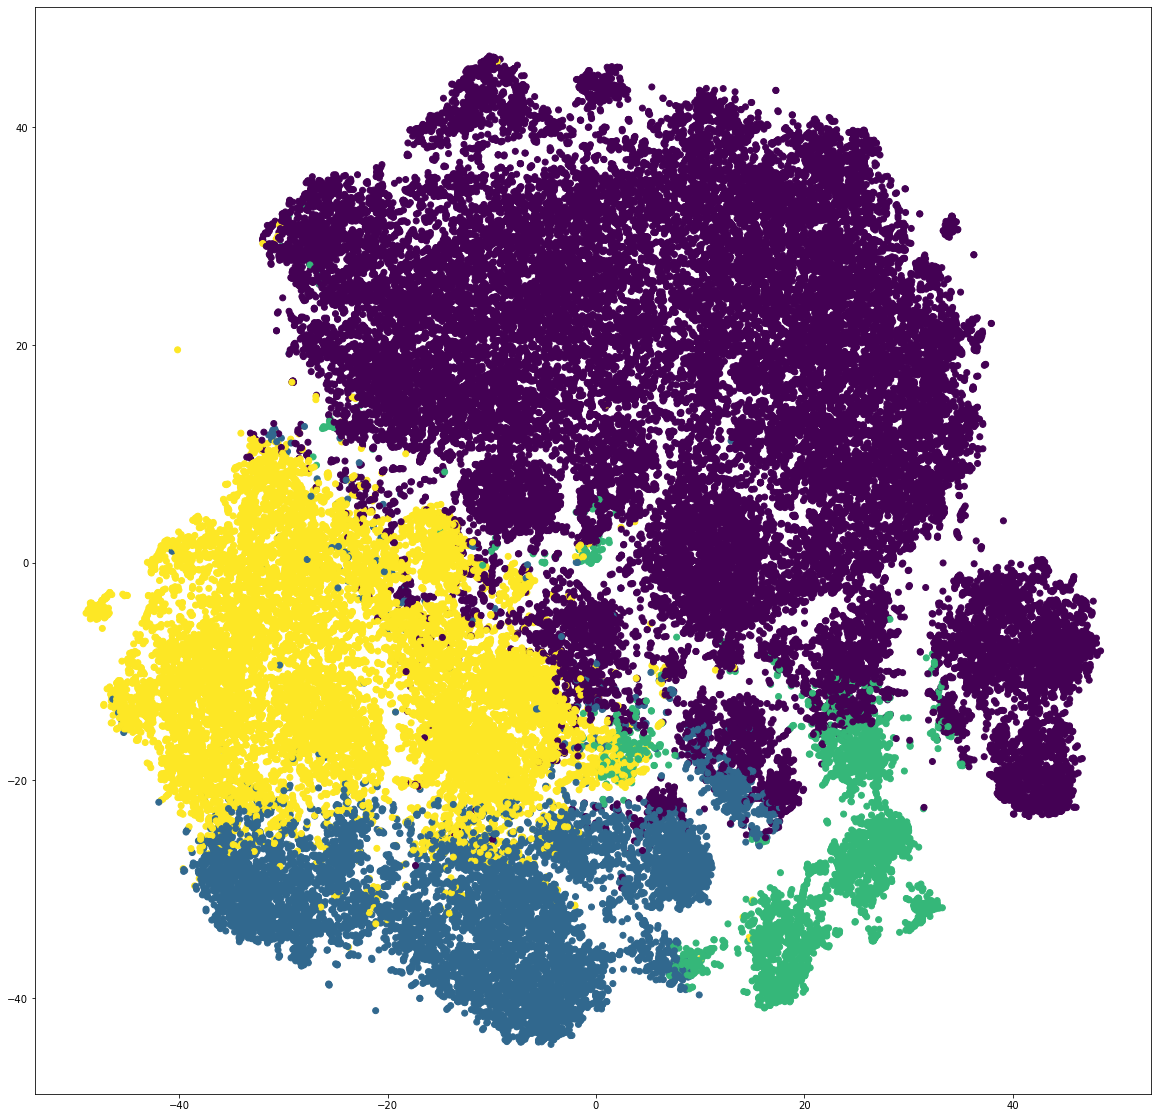

In [5]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
import plotly.express as px
import matplotlib.pyplot as plt

# # Kmeans
# model = KMeans(n_clusters=4)

# # Fitting Model
# model.fit(X_norm_d)

# # Prediction on the entire data
# all_predictions = model.predict(X_norm_d)

x = plt.subplots(nrows=1, ncols=1, figsize=(20,20))

# Cosine
# distance_matrix = pairwise_distances(X_norm_d, X_norm_d, metric='cosine', n_jobs=-1)
# model = TSNE(metric="precomputed")
# transformed = model.fit_transform(distance_matrix)

# t-SNE
model = TSNE()
transformed = model.fit_transform(X_norm_d)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

x = plt.scatter(x_axis, y_axis, c=all_predictions)

plt.show()

# pca = PCA(n_components=3)
# components = pca.fit_transform(X_norm_d)

# total_var = pca.explained_variance_ratio_.sum() * 100

# fig = px.scatter_3d(
#     components, x=0, y=1, z=2, color=all_predictions,
#     title=f'Total Explained Variance: {total_var:.2f}%',
#     labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
#     width=1000, height=1000
# )

# fig.show()

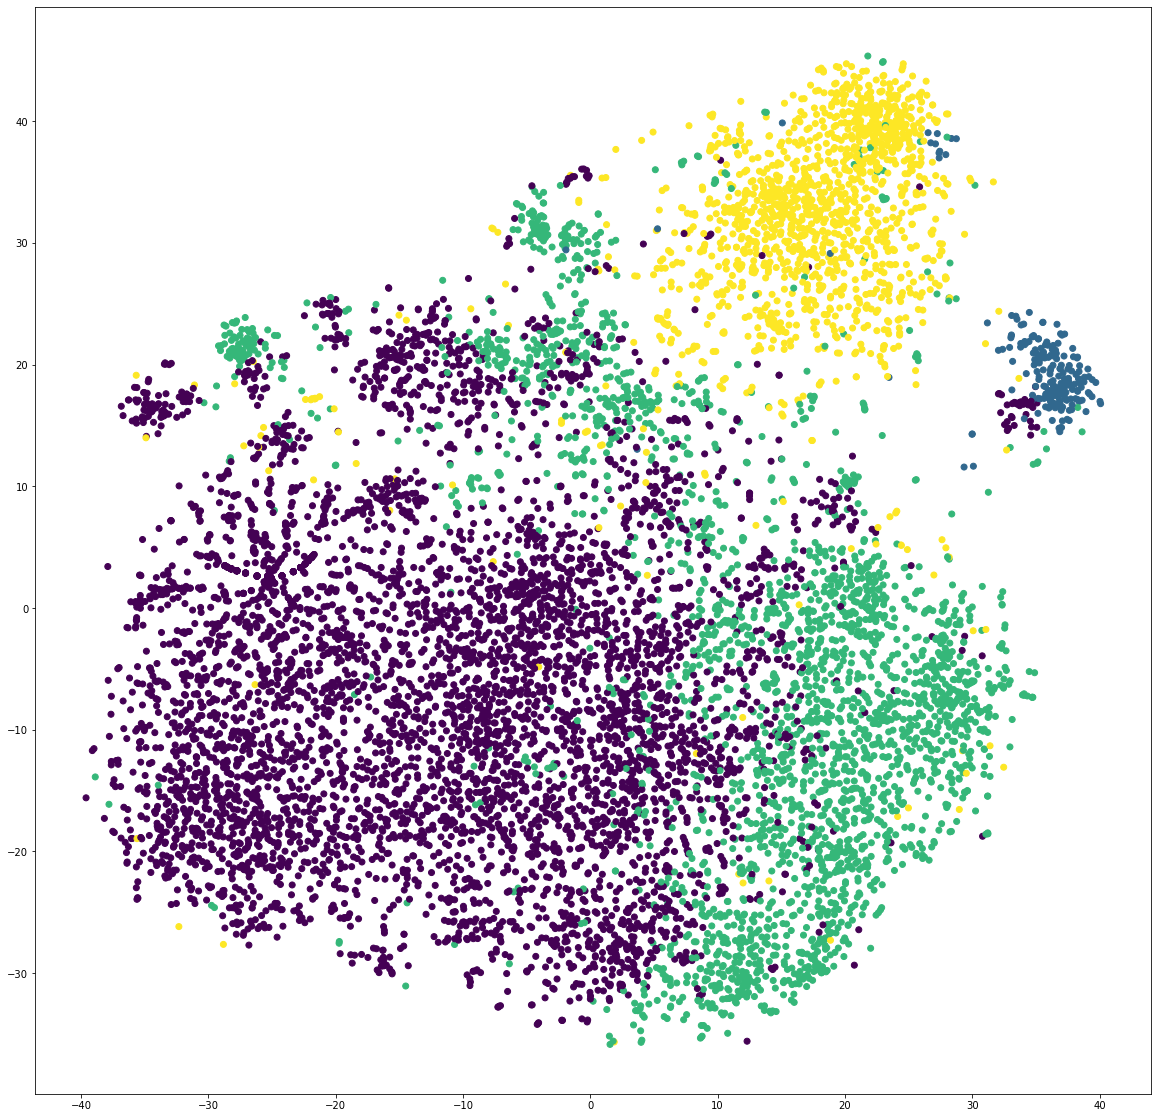

In [420]:
# import pandas as pd
# import numpy as np
# from sklearn.decomposition import PCA
# from matplotlib import pyplot as plt
# from sklearn.cluster import AgglomerativeClustering
# import scipy.cluster.hierarchy as sch

# dendrogram = sch.dendrogram(sch.linkage(X_norm_d, method='ward'))
# model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
# model.fit(X_norm_d)
# labels = model.labels_

x = plt.subplots(nrows=1, ncols=1, figsize=(20,20))

# distance_matrix = pairwise_distances(X_norm_d, X_norm_d, metric='cosine', n_jobs=-1)
# model = TSNE(metric="precomputed")
# transformed = model.fit_transform(distance_matrix)

# t-SNE
model = TSNE(learning_rate=100, perplexity=100, early_exaggeration=20)

# Fitting Model
transformed = model.fit_transform(X_norm_d)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

x = plt.scatter(x_axis, y_axis, c=new_labels)

In [101]:
df_adm_imputed_mean_d['cluster'] = all_predictions
# df_adm_imputed_mean_d['cluster_hierarchical'] = labels

df_mean = df_adm_imputed_mean_d.groupby("cluster").mean()
df_mean.to_csv('/Users/yzm9199/Documents/NU/MIMIC/Delirium/df_mean1.csv')

df_adm_imputed_mean_d.to_csv('/Users/yzm9199/Documents/NU/MIMIC/Delirium/df_adm_imputed_mean_d.csv')

<ipython-input-101-46aee0bd76d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adm_imputed_mean_d['cluster'] = all_predictions


In [379]:
count = df_adm_imputed_mean_d.groupby('cluster').size()
count.sort_values(ascending=False).head(50)

cluster
0    5477
2    2980
3    1348
1     261
dtype: int64

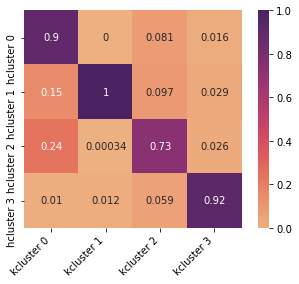

In [378]:
# data = pd.read_csv('/Users/yzm9199/Documents/NU/RWE/MIMIC/Delirium/corr.csv')
# corr = np.absolute(data.corr())

corr = [[0.902866533,0,0.081248859,0.015884608],
[0.145631068,0.995145631,0.097087379,0.029126214],
[0.240268456,0.00033557,0.733221477,0.026174497],
[0.010385757,0.011869436,0.058605341,0.919139466]]

ax = sns.heatmap(
    corr, 
    vmin=0, vmax=1, center=0.5,
    cmap=sns.color_palette("flare", as_cmap=True),
    square=True,
    annot=True,
    xticklabels = ['kcluster 0', 'kcluster 1', 'kcluster 2', 'kcluster 3'],
    yticklabels = ['hcluster 0', 'hcluster 1', 'hcluster 2', 'hcluster 3']
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [376]:
# cluster = df_adm_imputed_mean_d['cluster'].tolist()
# cluster_hierarchical = df_adm_imputed_mean_d['cluster_hierarchical'].tolist()

# new_labels = [-1 if l == 0 else l for l in cluster_hierarchical]
# new_labels = [0 if l == 2 else l for l in new_labels]
# new_labels = [2 if l == -1 else l for l in new_labels]
# new_labels = [-1 if l == 1 else l for l in new_labels]
# new_labels = [1 if l == 3 else l for l in new_labels]
# new_labels = [3 if l == -1 else l for l in new_labels]

# import scipy.stats as stats
# correlation, p_value = stats.pearsonr(cluster, new_labels)
# print(correlation)

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(cluster, new_labels)
kappa

0.7496380092436317

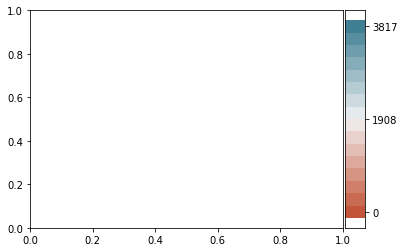

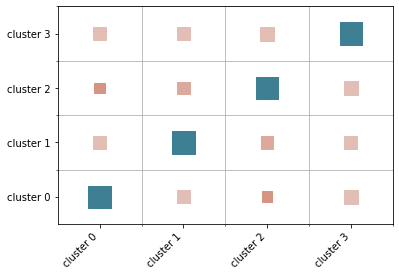

In [205]:
plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x15 grid
ax = plt.subplot(plot_grid[:,:-1]) # Use the leftmost 14 columns of the grid for the main plot

# Add color legend on the right side of the plot
ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

col_x = [0]*len(palette) # Fixed x coordinate for the bars
bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

bar_height = bar_y[1] - bar_y[0]
ax.barh(
    y=bar_y,
    width=[5]*len(palette), # Make bars 5 units wide
    left=col_x, # Make bars start at 0
    height=bar_height,
    color=palette,
    linewidth=0
)
ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
ax.grid(False) # Hide grid
ax.set_facecolor('white') # Make background white
ax.set_xticks([]) # Remove horizontal ticks
ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
ax.yaxis.tick_right() # Show vertical ticks on the right 
    
n_colors = 16 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
color_min, color_max = [0, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

def heatmap(x, y, size, cnt):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num),
        y=y.map(y_to_num),
        s=size * size_scale,
        c=cnt.apply(value_to_color),
        marker='s'
    )

    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    
data = pd.read_csv('/Users/yzm9199/Documents/NU/RWE/MIMIC/Delirium/corr.csv')

columns = ['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3'] 
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
# a = np.transpose(data.values.flatten())
# corr['cnt'] = a.tolist()

heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs(),
    cnt=corr['value'].abs()
)

In [ ]:
# df_inr.loc[df_inr['valuenum']>500]
# df_delirium_adm1.loc[df_delirium_adm1['df_pt1'].astype(float)>500][['subject_id','df_pt1']]

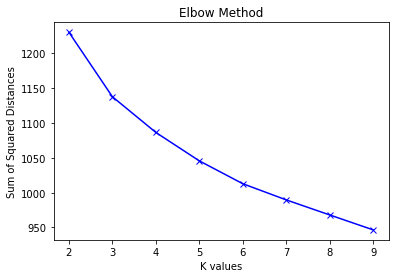

In [276]:
# Arbitrarily selecting a range of values for K
K = range(2,10)
sum_of_squared_distances = []

# Using Scikit Learn’s KMeans Algorithm to find sum of squared distances
for k in K:
    model = KMeans(n_clusters=k).fit(X_norm_d)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import plotly.express as px

# # fit scaler on training data
# norm = MinMaxScaler().fit(df_delirium_adm1_imputed)

# # transform training data
# X_norm = norm.transform(df_delirium_adm1_imputed)

# Declaring Model
dbscan = DBSCAN(eps=0.3, min_samples=10)

# Fitting
dbscan.fit(X_norm_d)

# 2D
# Transoring Using PCA
pca = PCA(n_components=2).fit(X_norm_d)
pca_2d = pca.transform(X_norm_d)

# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters')
plt.show()

# 3D
# pca = PCA(n_components=3)
# components = pca.fit_transform(X_norm_d)

# total_var = pca.explained_variance_ratio_.sum() * 100

# fig = px.scatter_3d(
#     components, x=0, y=1, z=2, color=dbscan.labels_,
#     title=f'Total Explained Variance: {total_var:.2f}%',
#     labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
# )
# fig.show()

In [294]:
np.unique(dbscan.labels_)

array([-1,  0])

### Check ADM

In [298]:
df_cohort_hadm_count = df_cohort_hadm.groupby('admission_type').size()
df_cohort_hadm_count.sort_values(ascending=False).head(50)

admission_type
EMER           5418
OBSERVATION    3888
SURGICAL        331
ELECTIVE        154
dtype: int64

In [428]:
df_adm1 = df_adm_imputed_mean_d.loc[df_adm_imputed_mean_d['cluster']==0]
df_adm1_count = df_adm1.groupby('admission_type').size()
df_adm1_count.sort_values(ascending=False).head(50)

admission_type
EMER           2688
OBSERVATION    2653
SURGICAL        100
ELECTIVE         36
dtype: int64

In [427]:
df_adm1 = df_adm_imputed_mean_d.loc[df_adm_imputed_mean_d['cluster']==1]
df_adm1_count = df_adm1.groupby('admission_type').size()
df_adm1_count.sort_values(ascending=False).head(50)

admission_type
EMER           184
OBSERVATION     58
ELECTIVE        10
SURGICAL         9
dtype: int64

In [425]:
df_adm1 = df_adm_imputed_mean_d.loc[df_adm_imputed_mean_d['cluster']==2]
df_adm1_count = df_adm1.groupby('admission_type').size()
df_adm1_count.sort_values(ascending=False).head(50)

admission_type
EMER           1811
OBSERVATION    1067
SURGICAL         59
ELECTIVE         43
dtype: int64

In [426]:
df_adm1 = df_adm_imputed_mean_d.loc[df_adm_imputed_mean_d['cluster']==3]
df_adm1_count = df_adm1.groupby('admission_type').size()
df_adm1_count.sort_values(ascending=False).head(50)

admission_type
EMER           884
OBSERVATION    210
SURGICAL       182
ELECTIVE        72
dtype: int64

### Check Rx

In [17]:
df_rx = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/prescriptions.txt", encoding = 'utf8', sep="\t")
df_rx = df_rx[['drug','subject_id','hadm_id','pharmacy_id','starttime','stoptime']].drop_duplicates()
# df_rx = df_rx[df_rx['hadm_id'].isin(cohort_adm)]

In [18]:
df_rx_type = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/rx_type.txt", encoding = 'utf8', sep="\t")

mydict = {}
for row in df_rx_type.itertuples():
    k = row.rx
    v = row.type
    mydict[k]=v
    
df_rx['type'] = df_rx['drug'].map(mydict)

df_rx_norm = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/rx_norm.txt", encoding = 'utf8', sep="\t")

mydict = {}
for row in df_rx_norm.itertuples():
    k = row.rx
    v = row.norm
    mydict[k]=v
    
df_rx['norm'] = df_rx['drug'].map(mydict)
df_rx=df_rx.dropna()
df_rx

drug  subject_id   hadm_id  pharmacy_id  \
0          BuPROPion (Sustained Release)    17868682  22726960     73313910   
1          BuPROPion (Sustained Release)    17868682  22726960     16239987   
2                                Aspirin    17868682  22726960     16634804   
3                                 1/2 NS    17868682  22726960      2697460   
4            Pneumococcal Vac Polyvalent    17868682  22726960      1383959   
...                                  ...         ...       ...          ...   
17021394                         Heparin    19873281  29871982     71573922   
17021395                Fentanyl Citrate    17608878  22135112     65762013   
17021396  OxycoDONE (Immediate Release)     11667755  29607134     31327446   
17021397   Acetaminophen-Caff-Butalbital    17961555  22879995     50647416   
17021398   OxyCODONE (Immediate Release)    10594290  27716310     13140278   

                    starttime             stoptime  \
0         2160-01-07 08:00:00  2160-01-07 21:00:00   
1         2160-01-07 08:00:00  2160-01-08 16:00:00   
2         2160-01-07 10:00:00  2160-01-07 16:00:00   
3         2160-01-07 14:00:00  2160-01-07 14:00:00   
4         2160-01-07 15:00:00  2160-01-08 16:00:00   
...                       ...                  ...   
17021394  2134-03-13 17:00:00  2134-03-16 12:00:00   
17021395  2147-04-12 17:00:00  2147-04-13 12:00:00   
17021396  2126-08-08 05:00:00  2126-08-08 14:00:00   
17021397  2171-01-24 05:00:00  2171-02-03 20:00:00   
17021398  2149-08-03 18:00:00  2149-08-04 15:00:00   

                                                  type  \
0         Other Antidepressants and Anti-Anxiety Agent   
1         Other Antidepressants and Anti-Anxiety Agent   
2                                         Antiplatelet   
3                                      Sodium Chloride   
4                                              Vaccine   
...                                                ...   
17021394                                 Anticoagulant   
17021395                              Opioid Analgesic   
17021396                              Opioid Analgesic   
17021397                                     Analgesic   
17021398                              Opioid Analgesic   

                              norm  
0                        Bupropion  
1                        Bupropion  
2                          Aspirin  
3                  Sodium Chloride  
4                          Vaccine  
...                            ...  
17021394                   Heparin  
17021395          Fentanyl Citrate  
17021396                 Oxycodone  
17021397  Acetaminophen/Butalbital  
17021398                 Oxycodone  

[15673231 rows x 8 columns]

In [19]:
df_emar = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/emar.txt", encoding = 'utf8', sep="\t",names=["subject_id","hadm_id","emar_id","emar_seq","poe_id","pharmacy_id","charttime","medication","event_txt","scheduletime","storetime"])
df_emar = df_emar.loc[~df_emar.pharmacy_id.str.contains("N")]
df_emar = df_emar.loc[~df_emar.hadm_id.str.contains("N")]
df_emar['hadm_id'] = df_emar['hadm_id'].astype(int)
df_emar['pharmacy_id'] = df_emar['pharmacy_id'].astype(int)
# df_emar = df_emar[df_emar['hadm_id'].isin(cohort_adm)]

df_emar_detail = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/emar_detail.txt", encoding = 'utf8', sep="\t",names=["subject_id","emar_id","emar_seq","parent_field_ordinal","administration_type","pharmacy_id","barcode_type","reason_for_no_barcode","complete_dose_not_given","dose_due","dose_due_unit","dose_given","dose_given_unit","will_remainder_of_dose_be_given","product_amount_given","product_unit","product_code","product_description","product_description_other","prior_infusion_rate","infusion_rate","infusion_rate_adjustment","infusion_rate_adjustment_amount","infusion_rate_unit","route","infusion_complete","completion_interval","new_iv_bag_hung","continued_infusion_in_other_location","restart_interval","side","site","non_formulary_visual_verification"])
df_emar_detail = df_emar_detail[['subject_id','emar_id','emar_seq','pharmacy_id','dose_given','dose_given_unit']].drop_duplicates()
df_emar_detail = df_emar_detail.loc[~df_emar_detail.pharmacy_id.str.contains("N")]
df_emar_detail = df_emar_detail.loc[~df_emar_detail.dose_given_unit.str.contains("N")]

mydict = {}
for row in df_emar_detail.itertuples():
    k = row.emar_id
    v = str(row.dose_given)
    mydict[k]=v
df_emar['dose_given'] = df_emar['emar_id'].map(mydict)

mydict = {}
for row in df_emar_detail.itertuples():
    k = row.emar_id
    v = str(row.dose_given_unit)
    mydict[k]=v
df_emar['dose_given_unit'] = df_emar['emar_id'].map(mydict)

In [20]:
mydict = {}
for row in df_rx.itertuples():
    k = row.pharmacy_id
    v = row.type
    mydict[k]=v

df_emar['type'] = df_emar['pharmacy_id'].map(mydict)

mydict = {}
for row in df_rx.itertuples():
    k = row.pharmacy_id
    v = row.norm
    mydict[k]=v

df_emar['norm'] = df_emar['pharmacy_id'].map(mydict)

In [21]:
adm_id = df_emar.hadm_id.drop_duplicates()
df_adm = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/admissions.txt", encoding = 'utf8', sep="\t")
df_adm = df_adm[['hadm_id','admittime','dischtime']].drop_duplicates()

mydict = {}
for row in df_adm.itertuples():
    k = row.hadm_id
    v = row.admittime
    mydict[k]=v
    
df_emar['admittime'] = df_emar['hadm_id'].map(mydict)

mydict = {}
for row in df_adm.itertuples():
    k = row.hadm_id
    v = row.dischtime
    mydict[k]=v
    
df_emar['dischtime'] = df_emar['hadm_id'].map(mydict)
df_emar

subject_id   hadm_id       emar_id  emar_seq        poe_id  \
0           12529062  27643116  12529062-748       748  12529062-186   
1           12529062  27643116  12529062-749       749  12529062-228   
2           12529062  27643116  12529062-750       750  12529062-354   
3           12529062  27643116  12529062-751       751  12529062-343   
4           12529062  27643116  12529062-752       752  12529062-228   
...              ...       ...           ...       ...           ...   
27590429    12529062  27643116  12529062-742       742  12529062-228   
27590430    12529062  27643116  12529062-743       743  12529062-257   
27590431    12529062  27643116  12529062-744       744  12529062-109   
27590433    12529062  27643116  12529062-746       746  12529062-274   
27590434    12529062  27643116  12529062-747       747  12529062-343   

          pharmacy_id            charttime                 medication  \
0            85719393  2136-05-08 23:37:00              Acetaminophen   
1            83883650  2136-05-08 23:37:00                  Meropenem   
2            71977026  2136-05-08 23:37:00                         \N   
3            66594502  2136-05-09 05:52:00  Ipratropium-Albuterol Neb   
4            83883650  2136-05-09 05:52:00                  Meropenem   
...               ...                  ...                        ...   
27590429     83883650  2136-05-08 18:41:00                  Meropenem   
27590430     45831540  2136-05-08 21:03:00                 Carvedilol   
27590431     21697420  2136-05-08 21:03:00                    Heparin   
27590433     13915714  2136-05-08 23:37:00                Mirtazapine   
27590434     66594502  2136-05-08 23:37:00  Ipratropium-Albuterol Neb   

             event_txt         scheduletime            storetime dose_given  \
0         Administered  2136-05-09 00:00:00  2136-05-08 23:37:00        325   
1         Administered  2136-05-09 00:00:00  2136-05-08 23:37:00        500   
2              Started  2136-05-08 23:37:00  2136-05-08 23:37:00        NaN   
3         Administered  2136-05-09 06:00:00  2136-05-09 05:52:00        NaN   
4         Administered  2136-05-09 06:00:00  2136-05-09 05:52:00        500   
...                ...                  ...                  ...        ...   
27590429  Administered  2136-05-08 18:00:00  2136-05-08 18:41:00        500   
27590430  Administered  2136-05-08 20:00:00  2136-05-08 21:03:00       12.5   
27590431  Administered  2136-05-08 20:00:00  2136-05-08 21:03:00        NaN   
27590433  Administered  2136-05-08 23:00:00  2136-05-08 23:37:00        7.5   
27590434  Administered  2136-05-09 00:00:00  2136-05-08 23:37:00        NaN   

         dose_given_unit                                           type  \
0                     mg                                      Analgesic   
1                     mg                                 Anti-infection   
2                    NaN                                       Glycemic   
3                    NaN  Short-Acting Beta Agonist and Anticholinergic   
4                     mg                                 Anti-infection   
...                  ...                                            ...   
27590429              mg                                 Anti-infection   
27590430              mg                Combined Alpha and Beta-Blocker   
27590431             NaN                                  Anticoagulant   
27590433              mg   Other Antidepressants and Anti-Anxiety Agent   
27590434             NaN  Short-Acting Beta Agonist and Anticholinergic   

                           norm            admittime            dischtime  
0                 Acetaminophen  2136-04-17 03:56:00  2136-05-28 12:25:00  
1                     Meropenem  2136-04-17 03:56:00  2136-05-28 12:25:00  
2                      Glycemic  2136-04-17 03:56:00  2136-05-28 12:25:00  
3         Albuterol/Ipratropium  2136-04-17 03:56:00  2136-05-28 12:25:00  
4                     Meropenem  2136-

In [22]:
df = df_emar.loc[~df_emar['type'].isna()]
df = df.loc[~df['dose_given'].isna()]
# print (df.shape)

df1 = df[df['norm'].str.contains("Buprenorphine/Naloxone")]
df1 = df1.drop(['dose_given'],axis=1)
df1_1 = df1.replace({'norm': {"Buprenorphine/Naloxone": "Buprenorphine"}})
df1_1['dose_given'] = 8
df1_2 = df1.replace({'norm': {"Buprenorphine/Naloxone": "Naloxone"}})
df1_2['dose_given'] = 2 
frames = [df, df1_1, df1_2]
df_opiod = pd.concat(frames).sort_values(by=['charttime'])

df1 = df[df['norm'].str.contains("Acetaminophen/Hydrocodone")]
df1 = df1.drop(['dose_given'],axis=1)
df1_1 = df1.replace({'norm': {"Acetaminophen/Hydrocodone": "Acetaminophen"}})
df1_1['dose_given'] = 325
df1_2 = df1.replace({'norm': {"Acetaminophen/Hydrocodone": "Hydrocodone"}})
df1_2['dose_given'] = 5
frames = [df_opiod, df1_1, df1_2]
df_opiod = pd.concat(frames).sort_values(by=['charttime'])

df1 = df[df['norm'].str.contains("Oxycodone/Acetaminophen")]
df1 = df1.drop(['dose_given'],axis=1)
df1_1 = df1.replace({'norm': {"Oxycodone/Acetaminophen": "Acetaminophen"}})
df1_1['dose_given'] = 325
df1_2 = df1.replace({'norm': {"Oxycodone/Acetaminophen": "Oxycodone"}})
df1_2['dose_given'] = 5
frames = [df_opiod, df1_1, df1_2]
df_opiod = pd.concat(frames).sort_values(by=['charttime'])

df1 = df[df['norm'].str.contains("Acetaminophen/Butalbital")]
df1 = df1.drop(['dose_given'],axis=1)
df1_1 = df1.replace({'norm': {"Acetaminophen/Butalbital": "Acetaminophen"}})
df1_1['dose_given'] = 325
df1_2 = df1.replace({'norm': {"Acetaminophen/Butalbital": "Butalbital"}})
df1_2['dose_given'] = 5
frames = [df_opiod, df1_1, df1_2]
df_opiod = pd.concat(frames).sort_values(by=['charttime'])

df1 = df[df['norm'].str.contains("Piperacillin/Tazobactam")]
df1 = df1.drop(['dose_given'],axis=1)
df1_1 = df1.replace({'norm': {"Piperacillin/Tazobactam": "Piperacillin"}})
df1_1['dose_given'] = 4000
df1_2 = df1.replace({'norm': {"Piperacillin/Tazobactam": "Tazobactam"}})
df1_2['dose_given'] = 500
frames = [df, df1_1, df1_2]
df_opiod = pd.concat(frames).sort_values(by=['charttime'])

df1 = df[df['norm'].str.contains("Amoxicillin/Clavulanate")]
df1 = df1.drop(['dose_given'],axis=1)
df1_1 = df1.replace({'norm': {"Amoxicillin/Clavulanate": "Amoxicillin"}})
df1_1['dose_given'] = 875
df1_2 = df1.replace({'norm': {"Amoxicillin/Clavulanate": "Clavulanate"}})
df1_2['dose_given'] = 125
frames = [df, df1_1, df1_2]
df = pd.concat(frames).sort_values(by=['charttime'])

In [405]:
df_rx0 = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/Delirium/df_emar.csv", encoding = 'utf8', sep=",")
# df_rx0 = df_rx[df_rx['hadm_id'].isin(cohort_adm)]
# df_rx0_12h = df_rx0.loc[~df_rx0['timediff'].isna]

# df_rx0 = df_rx
# df_rx0 = df_rx0.loc[~df_rx0['type'].isna()]
# df_rx0 = df_rx0.loc[~df_rx0['dose_given'].isna()]
# df_rx0['dose_given'] = df_rx0['dose_given'].astype(str)
# df_rx0 = df_rx0.loc[~df_rx0.dose_given.str.contains("N")]
# df_rx0 = df_rx0.loc[~df_rx0.norm.str.contains("/")]
# df_rx0 = df_rx0.loc[~df_rx0.event_txt.str.contains("Not Given")]
# df_rx0 = df_rx0.loc[~df_rx0.event_txt.str.contains("Stopped")]
# df_rx0 = df_rx0.loc[~df_rx0.event_txt.str.contains("Hold")]
# df_rx0 = df_rx0.loc[~df_rx0.dose_given_unit.str.contains("nit")]
# df_rx1 = df_rx0.loc[df_rx0["dose_given_unit"]=="g"]
# df_rx1['dose_given'] = df_rx1['dose_given'].astype(float)*1000
# df_rx1['dose_given_unit'] = 'mg'
# df_rx2 = df_rx0.loc[df_rx0.dose_given_unit.str.contains("mg")]
# df_rx2['dose_given_unit'] = 'mg'
# df_rx3 = df_rx0.loc[df_rx0.dose_given_unit.str.contains("mcg")]
# df_rx3_1 = df_rx3.loc[df_rx3.dose_given_unit.str.contains("~")]
# df_rx3_1['dose_given_unit'] = 'mcg'
# df_rx3_1['dose_given'] = 2500
# df_rx3_2 = df_rx3.loc[~df_rx3.dose_given_unit.str.contains("~")]
# frames = [df_rx3_1, df_rx3_2]
# df_rx3 = pd.concat(frames).sort_values(by=['charttime'])
# df_rx3['dose_given'] = df_rx3['dose_given'].astype(float)/1000
# df_rx3['dose_given_unit'] = 'mg'
# df_rx4 = df_rx0.loc[df_rx0.dose_given_unit.str.contains("ml")]
# df_rx4['dose_given_unit'] = 'ml'
# df_rx5 = df_rx0.loc[df_rx0.dose_given_unit.str.contains("mL")]
# df_rx5['dose_given_unit'] = 'ml'
# df_rx6 = df_rx0.loc[df_rx0.dose_given_unit.str.contains("gm")]
# df_rx6['dose_given_unit'] = 'mg'
# frames = [df_rx1, df_rx2, df_rx3, df_rx4, df_rx5, df_rx6]
# df_rx0 = pd.concat(frames).sort_values(by=['charttime'])
# df_rx0 = df_rx0.loc[~df_rx0.dose_given.str.contains("IV")]

df_rx1 = df_rx0.loc[df_rx0.norm.str.contains("Acetaminophen")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx2 = df_rx0.loc[df_rx0.norm.str.contains("Metoprolol")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx3 = df_rx0.loc[df_rx0.norm.str.contains("Oxycodone")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx4 = df_rx0.loc[df_rx0.norm.str.contains("Hydromorphone")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx5 = df_rx0.loc[df_rx0.norm.str.contains("Furosemide")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx6 = df_rx0.loc[df_rx0.norm.str.contains("Vancomycin")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx7 = df_rx0.loc[df_rx0.norm.str.contains("Fentanyl")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx8 = df_rx0.loc[df_rx0.norm.str.contains("Gabapentin")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx9 = df_rx0.loc[df_rx0.norm.str.contains("Famotidine")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx10 = df_rx0.loc[df_rx0.norm.str.contains("Metronidazole")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx11 = df_rx0.loc[df_rx0.norm.str.contains("Chlorhexidine")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx12 = df_rx0.loc[df_rx0.norm.str.contains("Lorazepam")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx13 = df_rx0.loc[df_rx0.norm.str.contains("Cefepime")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx14 = df_rx0.loc[df_rx0.norm.str.contains("Levetiracetam")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx15 = df_rx0.loc[df_rx0.norm.str.contains("Amiodarone")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx16 = df_rx0.loc[df_rx0.norm.str.contains("Acyclovir")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx17 = df_rx0.loc[df_rx0.norm.str.contains("Haloperidol")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx18 = df_rx0.loc[df_rx0.norm.str.contains("Tramadol")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx19 = df_rx0.loc[df_rx0.norm.str.contains("Meropenem")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx20 = df_rx0.loc[df_rx0.norm.str.contains("Ondansetron")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx21 = df_rx0.loc[df_rx0.norm.str.contains("Ramelteon")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx22 = df_rx0.loc[df_rx0.norm.str.contains("Nystatin")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx23 = df_rx0.loc[df_rx0.norm.str.contains("Morphine")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx24 = df_rx0.loc[df_rx0.norm.str.contains("Ranitidine")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx25 = df_rx0.loc[df_rx0.norm.str.contains("Ceftriaxone")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx26 = df_rx0.loc[df_rx0.norm.str.contains("Valproic")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx27 = df_rx0.loc[df_rx0.norm.str.contains("Palmyra")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx28 = df_rx0.loc[df_rx0.norm.str.contains("Cefazolin")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx29 = df_rx0.loc[df_rx0.norm.str.contains("Prednisone")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx30 = df_rx0.loc[df_rx0.norm.str.contains("Clonidine")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx31 = df_rx0.loc[df_rx0.norm.str.contains("Sertraline")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx32 = df_rx0.loc[df_rx0.norm.str.contains("Metoclopramide")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx33 = df_rx0.loc[df_rx0.norm.str.contains("Mirtazapine")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx34 = df_rx0.loc[df_rx0.norm.str.contains("Ciprofloxacin")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx35 = df_rx0.loc[df_rx0.norm.str.contains("Ceftazidime")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx36 = df_rx0.loc[df_rx0.norm.str.contains("Torsemide")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx37 = df_rx0.loc[df_rx0.norm.str.contains("Sultamicillin")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx38 = df_rx0.loc[df_rx0.norm.str.contains("Citalopram")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx39 = df_rx0.loc[df_rx0.norm.str.contains("Fluconazole")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx40 = df_rx0.loc[df_rx0.norm.str.contains("Clonazepam")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx41 = df_rx0.loc[df_rx0.norm.str.contains("Loperamide")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx42 = df_rx0.loc[df_rx0.norm.str.contains("Lamotrigine")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx43 = df_rx0.loc[df_rx0.norm.str.contains("Diazepam")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx44 = df_rx0.loc[df_rx0.norm.str.contains("Fluoxetine")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx45 = df_rx0.loc[df_rx0.norm.str.contains("Duloxetine")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx46 = df_rx0.loc[df_rx0.norm.str.contains("Venlafaxine")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx47 = df_rx0.loc[df_rx0.norm.str.contains("Memantine")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx48 = df_rx0.loc[df_rx0.norm.str.contains("Digoxin")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx49 = df_rx0.loc[df_rx0.norm.str.contains("Ampicillin")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx50 = df_rx0.loc[df_rx0.norm.str.contains("Buspirone")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx51 = df_rx0.loc[df_rx0.norm.str.contains("Metformin")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx52 = df_rx0.loc[df_rx0.norm.str.contains("Nafcillin")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx53 = df_rx0.loc[df_rx0.norm.str.contains("Azithromycin")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx54 = df_rx0.loc[df_rx0.norm.str.contains("Pregabalin")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx55 = df_rx0.loc[df_rx0.norm.str.contains("Baclofen")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx56 = df_rx0.loc[df_rx0.norm.str.contains("Midazolam")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx57 = df_rx0.loc[df_rx0.norm.str.contains("Ketorolac")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx58 = df_rx0.loc[df_rx0.norm.str.contains("Donepezil")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx59 = df_rx0.loc[df_rx0.norm.str.contains("Spironolactone")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx60 = df_rx0.loc[df_rx0.norm.str.contains("Lacosamide")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx61 = df_rx0.loc[df_rx0.norm.str.contains("Hydrochlorothiazide")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx62 = df_rx0.loc[df_rx0.norm.str.contains("Atenolol")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx63 = df_rx0.loc[df_rx0.norm.str.contains("Phenytoin")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx64 = df_rx0.loc[df_rx0.norm.str.contains("Atovaquone")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx65 = df_rx0.loc[df_rx0.norm.str.contains("Diphenhydramine")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx66 = df_rx0.loc[df_rx0.norm.str.contains("Escitalopram")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()
df_rx67 = df_rx0.loc[df_rx0.norm.str.contains("Levofloxacin")][[ 'hadm_id','charttime','dose_given','dose_given_unit']].drop_duplicates()

# df_rx = df_emar.loc[df_emar['type']=='Nausea']
# df_rx = df_rx.loc[df_rx.type.str.contains("Psycho")]
# df_rx0.loc[df_rx0.isnull().any(axis=1)]

# print (df_rx0.shape)
# df_rx_count = df_rx0.groupby('norm').size()
# df_rx00 = df_rx_count.sort_values(ascending=False)
# # df_rx00 = df_rx0.loc[df_rx0.dose_given_unit.str.contains("mEq")]
# # df_rx00

# df_rx0.to_csv('/Users/yzm9199/Documents/NU/RWE/MIMIC/Delirium/df_emar.csv')

In [41]:
mydict = {}
for row in df_adm.itertuples():
    k = row.hadm_id
    v = row.admittime
    mydict[k]=v
df_rx17['admittime'] = df_rx17['hadm_id'].map(mydict)

mydict = {}
for row in df_adm.itertuples():
    k = row.hadm_id
    v = row.dischtime
    mydict[k]=v
df_rx17['dischtime'] = df_rx17['hadm_id'].map(mydict)

df_rx17.to_csv('/Users/yzm9199/Documents/NU/RWE/MIMIC/Delirium/df_haloperidol.csv')

In [222]:
lst = df_rx0.index.tolist()
i=0  
for row in df_rx0.itertuples():
    timediff = datetime.datetime.strptime(str(row.storetime), '%Y-%m-%d %H:%M:%S') - datetime.datetime.strptime(str(row.admittime), '%Y-%m-%d %H:%M:%S')
    if divmod(timediff.total_seconds(),3600)[0] <= 12:
        df_rx0.at[lst[i], 'timediff']= divmod(timediff.total_seconds(),3600)[0]
    i+=1

df_rx0

subject_id   hadm_id       emar_id  emar_seq         poe_id  \
21609027    15350437  20383396   15350437-13        13    15350437-15   
21609029    15350437  20383396   15350437-15        15    15350437-32   
21960499    16284044  23864737    16284044-7         7    16284044-50   
21960500    16284044  23864737    16284044-8         8    16284044-56   
21960497    16284044  23864737    16284044-5         5    16284044-62   
...              ...       ...           ...       ...            ...   
20445448    11973788  29492711  11973788-955       955  11973788-1077   
20445447    11973788  29492711  11973788-954       954  11973788-1076   
20445458    11973788  29492711  11973788-965       965  11973788-1086   
20445452    11973788  29492711  11973788-959       959  11973788-1082   
20445464    11973788  29492711  11973788-971       971  11973788-1160   

          pharmacy_id            charttime                   medication  \
21609027     87780739  2110-01-11 11:26:00  Sodium Chloride 0.9%  Flush   
21609029     23711108  2110-01-11 20:50:00                    Ramelteon   
21960499     70186928  2110-01-11 22:40:00  Sodium Chloride 0.9%  Flush   
21960500     14262579  2110-01-11 22:40:00                Acetaminophen   
21960497     56916483  2110-01-11 22:40:00          Metoprolol Tartrate   
...               ...                  ...                          ...   
20445448     58784499  2212-04-12 08:34:00                   Amiodarone   
20445447     12043973  2212-04-12 08:34:00                  Allopurinol   
20445458     32908441  2212-04-12 08:34:00     Multivitamins W/minerals   
20445452     45125980  2212-04-12 08:34:00   Diltiazem Extended-Release   
20445464     99914769  2212-04-12 12:45:00                      Insulin   

             event_txt         scheduletime            storetime dose_given  \
21609027       Flushed  2110-01-11 11:26:00  2110-01-11 11:27:00          5   
21609029  Administered  2110-01-11 20:49:00  2110-01-11 20:50:00          8   
21960499       Flushed  2110-01-11 22:40:00  2110-01-11 22:45:00          3   
21960500  Administered  2110-01-11 22:40:00  2110-01-11 22:45:00        325   
21960497  Administered  2110-01-11 20:00:00  2110-01-11 22:45:00       12.5   
...                ...                  ...                  ...        ...   
20445448  Administered  2212-04-12 08:00:00  2212-04-12 08:40:00        200   
20445447  Administered  2212-04-12 08:00:00  2212-04-12 08:40:00        100   
20445458  Administered  2212-04-12 08:00:00  2212-04-12 08:40:00          1   
20445452  Administered  2212-04-12 08:00:00  2212-04-12 08:40:00        120   
20445464  Administered  2212-04-12 12:00:00  2212-04-12 12:49:00          4   

         dose_given_unit                     type                 norm  \
21609027              mL          Sodium Chloride      Sodium Chloride   
21609029              mg            Psycholeptics            Ramelteon   
21960499              mL          Sodium Chloride      Sodium Chloride   
21960500              mg                Analgesic        Acetaminophen   
21960497              mg             Beta Blocker  Metoprolol Tartrate   
...                  ...                      ...                  ...   
20445448              mg           Antiarrhythmic           Amiodarone   
20445447              mg                     Gout          Allopurinol   
20445458             TAB                  Vitamin              Vitamin   
20445452              mg  Calcium Channel Blocker            Diltiazem   
20445464           Units                  Insulin              Insulin   

                    admittime            dischtime  timediff  
21609027  2110-01-11 08:02:00  2110-01-12 18:45:00       3.0  
21609029  2110-01-11 08:02:00  2110-01-12 18:45:00      12.0  
21960499  2110-01-11 19:58:00  2110-01-17 16:00:00       2.0  
21960500  2110-01-11 19:58:00  2110-01-17 16:00:00       2.0  
21960497  2110-01-11 19:58:00  2110-01-17 16:00:00       2.0  
...             

In [406]:
# df_adm_imputed_mean = df_adm_imputed_mean_imputed_mean

mydict = {}
for row in df_rx1.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx1'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx2.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx2'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx3.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx3'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx4.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx4'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx5.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx5'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx6.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx6'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx7.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx7'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx8.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx8'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx9.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx9'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx10.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx10'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx11.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx11'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx12.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx12'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx13.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx13'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx14.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx14'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx15.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx15'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx16.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx16'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx17.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx17'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx18.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx18'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx19.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx19'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx20.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx20'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx21.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx21'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx22.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx22'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx23.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx23'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx24.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx24'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx25.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx25'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx26.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx26'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx27.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx27'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx28.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx28'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx29.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx29'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx30.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx30'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx31.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx31'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx32.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx32'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx33.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx33'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx34.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx34'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx35.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx35'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx36.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx36'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx37.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx37'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx38.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx38'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx39.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx39'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx40.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx40'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx41.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx41'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx42.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx42'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx43.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx43'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx44.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx44'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx45.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx45'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx46.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx46'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx47.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx47'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx48.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx48'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx49.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx49'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx50.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx50'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx51.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx51'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx52.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx52'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx53.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx53'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx54.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx54'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx55.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx55'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx56.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx56'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx57.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx57'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx58.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx58'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx59.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx59'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx60.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx60'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx61.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx61'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx62.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx62'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx63.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx63'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx64.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx64'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx65.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx65'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx66.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx66'] = df_adm_imputed_mean['hadm_id'].map(mydict)
mydict = {}
for row in df_rx67.itertuples():
    k = row.hadm_id
    v = row.dose_given
    mydict[k]=v
df_adm_imputed_mean['df_rx67'] = df_adm_imputed_mean['hadm_id'].map(mydict)

In [407]:
df_adm_imputed_mean['df_rx1'] = df_adm_imputed_mean['df_rx1'].astype(float)
df_adm_imputed_mean['df_rx2'] = df_adm_imputed_mean['df_rx2'].astype(float)
df_adm_imputed_mean['df_rx3'] = df_adm_imputed_mean['df_rx3'].astype(float)
df_adm_imputed_mean['df_rx4'] = df_adm_imputed_mean['df_rx4'].astype(float)
df_adm_imputed_mean['df_rx5'] = df_adm_imputed_mean['df_rx5'].astype(float)
df_adm_imputed_mean['df_rx6'] = df_adm_imputed_mean['df_rx6'].astype(float)
df_adm_imputed_mean['df_rx7'] = df_adm_imputed_mean['df_rx7'].astype(float)
df_adm_imputed_mean['df_rx8'] = df_adm_imputed_mean['df_rx8'].astype(float)
df_adm_imputed_mean['df_rx9'] = df_adm_imputed_mean['df_rx9'].astype(float)
df_adm_imputed_mean['df_rx10'] = df_adm_imputed_mean['df_rx10'].astype(float)
df_adm_imputed_mean['df_rx11'] = df_adm_imputed_mean['df_rx11'].astype(float)
df_adm_imputed_mean['df_rx12'] = df_adm_imputed_mean['df_rx12'].astype(float)
df_adm_imputed_mean['df_rx13'] = df_adm_imputed_mean['df_rx13'].astype(float)
df_adm_imputed_mean['df_rx14'] = df_adm_imputed_mean['df_rx14'].astype(float)
df_adm_imputed_mean['df_rx15'] = df_adm_imputed_mean['df_rx15'].astype(float)
df_adm_imputed_mean['df_rx16'] = df_adm_imputed_mean['df_rx16'].astype(float)
df_adm_imputed_mean['df_rx17'] = df_adm_imputed_mean['df_rx17'].astype(float)
df_adm_imputed_mean['df_rx18'] = df_adm_imputed_mean['df_rx18'].astype(float)
df_adm_imputed_mean['df_rx19'] = df_adm_imputed_mean['df_rx19'].astype(float)
df_adm_imputed_mean['df_rx20'] = df_adm_imputed_mean['df_rx20'].astype(float)
df_adm_imputed_mean['df_rx21'] = df_adm_imputed_mean['df_rx21'].astype(float)
df_adm_imputed_mean['df_rx22'] = df_adm_imputed_mean['df_rx22'].astype(float)
df_adm_imputed_mean['df_rx23'] = df_adm_imputed_mean['df_rx23'].astype(float)
df_adm_imputed_mean['df_rx24'] = df_adm_imputed_mean['df_rx24'].astype(float)
df_adm_imputed_mean['df_rx25'] = df_adm_imputed_mean['df_rx25'].astype(float)
df_adm_imputed_mean['df_rx26'] = df_adm_imputed_mean['df_rx26'].astype(float)
df_adm_imputed_mean['df_rx27'] = df_adm_imputed_mean['df_rx27'].astype(float)
df_adm_imputed_mean['df_rx28'] = df_adm_imputed_mean['df_rx28'].astype(float)
df_adm_imputed_mean['df_rx29'] = df_adm_imputed_mean['df_rx29'].astype(float)
df_adm_imputed_mean['df_rx30'] = df_adm_imputed_mean['df_rx30'].astype(float)
df_adm_imputed_mean['df_rx31'] = df_adm_imputed_mean['df_rx31'].astype(float)
df_adm_imputed_mean['df_rx32'] = df_adm_imputed_mean['df_rx32'].astype(float)
df_adm_imputed_mean['df_rx33'] = df_adm_imputed_mean['df_rx33'].astype(float)
df_adm_imputed_mean['df_rx34'] = df_adm_imputed_mean['df_rx34'].astype(float)
df_adm_imputed_mean['df_rx35'] = df_adm_imputed_mean['df_rx35'].astype(float)
df_adm_imputed_mean['df_rx36'] = df_adm_imputed_mean['df_rx36'].astype(float)
df_adm_imputed_mean['df_rx37'] = df_adm_imputed_mean['df_rx37'].astype(float)
df_adm_imputed_mean['df_rx38'] = df_adm_imputed_mean['df_rx38'].astype(float)
df_adm_imputed_mean['df_rx39'] = df_adm_imputed_mean['df_rx39'].astype(float)
df_adm_imputed_mean['df_rx40'] = df_adm_imputed_mean['df_rx40'].astype(float)
df_adm_imputed_mean['df_rx41'] = df_adm_imputed_mean['df_rx41'].astype(float)
df_adm_imputed_mean['df_rx42'] = df_adm_imputed_mean['df_rx42'].astype(float)
df_adm_imputed_mean['df_rx43'] = df_adm_imputed_mean['df_rx43'].astype(float)
df_adm_imputed_mean['df_rx44'] = df_adm_imputed_mean['df_rx44'].astype(float)
df_adm_imputed_mean['df_rx45'] = df_adm_imputed_mean['df_rx45'].astype(float)
df_adm_imputed_mean['df_rx46'] = df_adm_imputed_mean['df_rx46'].astype(float)
df_adm_imputed_mean['df_rx47'] = df_adm_imputed_mean['df_rx47'].astype(float)
df_adm_imputed_mean['df_rx48'] = df_adm_imputed_mean['df_rx48'].astype(float)
df_adm_imputed_mean['df_rx49'] = df_adm_imputed_mean['df_rx49'].astype(float)
df_adm_imputed_mean['df_rx50'] = df_adm_imputed_mean['df_rx50'].astype(float)
df_adm_imputed_mean['df_rx51'] = df_adm_imputed_mean['df_rx51'].astype(float)
df_adm_imputed_mean['df_rx52'] = df_adm_imputed_mean['df_rx52'].astype(float)
df_adm_imputed_mean['df_rx53'] = df_adm_imputed_mean['df_rx53'].astype(float)
df_adm_imputed_mean['df_rx54'] = df_adm_imputed_mean['df_rx54'].astype(float)
df_adm_imputed_mean['df_rx55'] = df_adm_imputed_mean['df_rx55'].astype(float)
df_adm_imputed_mean['df_rx56'] = df_adm_imputed_mean['df_rx56'].astype(float)
df_adm_imputed_mean['df_rx57'] = df_adm_imputed_mean['df_rx57'].astype(float)
df_adm_imputed_mean['df_rx58'] = df_adm_imputed_mean['df_rx58'].astype(float)
df_adm_imputed_mean['df_rx59'] = df_adm_imputed_mean['df_rx59'].astype(float)
df_adm_imputed_mean['df_rx60'] = df_adm_imputed_mean['df_rx60'].astype(float)
df_adm_imputed_mean['df_rx61'] = df_adm_imputed_mean['df_rx61'].astype(float)
df_adm_imputed_mean['df_rx62'] = df_adm_imputed_mean['df_rx62'].astype(float)
df_adm_imputed_mean['df_rx63'] = df_adm_imputed_mean['df_rx63'].astype(float)
df_adm_imputed_mean['df_rx64'] = df_adm_imputed_mean['df_rx64'].astype(float)
df_adm_imputed_mean['df_rx65'] = df_adm_imputed_mean['df_rx65'].astype(float)
df_adm_imputed_mean['df_rx66'] = df_adm_imputed_mean['df_rx66'].astype(float)
df_adm_imputed_mean['df_rx67'] = df_adm_imputed_mean['df_rx67'].astype(float)

df_adm_imputed_mean = df_adm_imputed_mean.fillna(0)

In [118]:
df_delirium_adm_med = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/Delirium/df_delirium_adm_med.csv", encoding = 'utf8', sep=",")

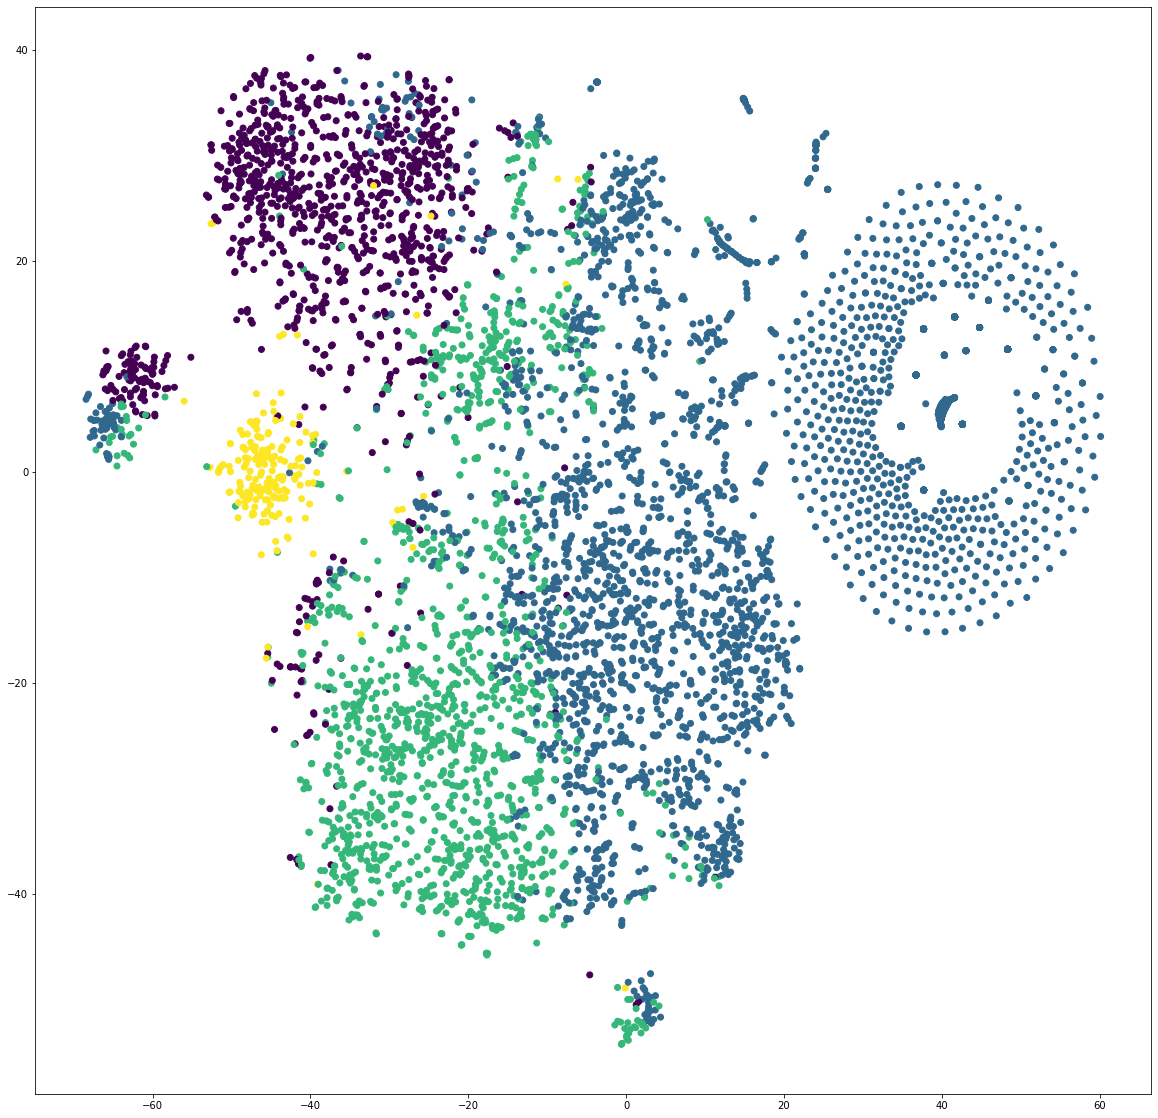

In [123]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import plotly.express as px
import matplotlib.pyplot as plt

# fit scaler on training data
norm = MinMaxScaler().fit(df_delirium_adm_med[['df_albumin','df_alp','df_alt','df_anion_gap','df_ast','df_baseexcess','df_basophils','df_bicarbonate','df_bun','df_calcium','df_chloride','df_ck_cpk','df_creatinine','df_eosinophil','df_fio2','df_glucose','df_hematocrit','df_hemoglobin','df_inr','df_lactate','df_ldh','df_lymphocytes','df_mch','df_mchc','df_mcv','df_monocytes','df_neutrophils','df_pao2','df_pco2','df_peep','df_ph','df_platelets','df_potassium','df_pt','df_ptt','df_rbc','df_rdw','df_so2','df_sodium','df_total_bili','df_totalco2','df_troponin','df_urea_nitrogen','df_wbc','df_heart_rate','df_weight','df_bp_systolic','df_bp_diastolic','df_bp_mean','df_temperature']])
# norm = MinMaxScaler().fit(df_delirium_adm_med.drop(['subject_id', 'hadm_id', 'subject_type', 'adm_type', 'df_vent'],axis=1))

# transform training data
X_norm = norm.transform(df_delirium_adm_med[['df_albumin','df_alp','df_alt','df_anion_gap','df_ast','df_baseexcess','df_basophils','df_bicarbonate','df_bun','df_calcium','df_chloride','df_ck_cpk','df_creatinine','df_eosinophil','df_fio2','df_glucose','df_hematocrit','df_hemoglobin','df_inr','df_lactate','df_ldh','df_lymphocytes','df_mch','df_mchc','df_mcv','df_monocytes','df_neutrophils','df_pao2','df_pco2','df_peep','df_ph','df_platelets','df_potassium','df_pt','df_ptt','df_rbc','df_rdw','df_so2','df_sodium','df_total_bili','df_totalco2','df_troponin','df_urea_nitrogen','df_wbc','df_heart_rate','df_weight','df_bp_systolic','df_bp_diastolic','df_bp_mean','df_temperature']])
# X_norm = norm.transform(df_delirium_adm_med.drop(['subject_id', 'hadm_id', 'subject_type', 'adm_type', 'df_vent'],axis=1))

# x = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
x = plt.subplots(nrows=1, ncols=1, figsize=(20,20))

# Kmeans
model = KMeans(n_clusters=4)

# Fitting Model
model.fit(X_norm)

# Prediction on the entire data
all_predictions = model.predict(X_norm)

# t-SNE
model = TSNE(learning_rate=100)

# Fitting Model
transformed = model.fit_transform(X_norm)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

x = plt.scatter(x_axis, y_axis, c=all_predictions)

plt.show()

pca = PCA(n_components=3)
components = pca.fit_transform(X_norm)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=all_predictions,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=1000, height=1000
)

fig.show()

In [124]:
df_delirium_adm_med['cluster'] = all_predictions

df_adm = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/admissions.txt", encoding = 'utf8', sep="\t")
df_adm = df_adm[['hadm_id','admittime']].drop_duplicates()

mydict = {}
for row in df_adm.itertuples():
    k = row.hadm_id
    v = row.admittime.split('-')[0]
    mydict[k]=v
    
df_delirium_adm_med['admittime'] = df_delirium_adm_med['hadm_id'].map(mydict)

df_pat = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/patients.txt", encoding = 'utf8', sep="\t")

mydict = {}
for row in df_pat.itertuples():
    k = row.subject_id
    v = row.anchor_year
    mydict[k]=v
df_delirium_adm_med['anchor_year'] = df_delirium_adm_med['subject_id'].map(mydict)

mydict = {}
for row in df_pat.itertuples():
    k = row.subject_id
    v = row.anchor_age
    mydict[k]=v
df_delirium_adm_med['anchor_age'] = df_delirium_adm_med['subject_id'].map(mydict)

mydict = {}
for row in df_pat.itertuples():
    k = row.subject_id
    v = row.gender
    mydict[k]=v
df_delirium_adm_med['gender'] = df_delirium_adm_med['subject_id'].map(mydict)

df_delirium_adm_med['age'] = df_delirium_adm_med['anchor_age']+df_delirium_adm_med['admittime'].astype(int)-df_delirium_adm_med['anchor_year']
df_delirium_adm_med = df_delirium_adm_med.drop(['anchor_age', 'anchor_year', 'admittime'],axis=1)

In [125]:
df_mean = df_delirium_adm_med.groupby(['cluster']).mean()
df_mean.to_csv('/Users/yzm9199/Documents/NU/RWE/MIMIC/Delirium/df_delirium_med_mean.csv')
df_mean

subject_id       hadm_id  subject_type  adm_type   df_vent  \
cluster                                                                 
0        1.500195e+07  2.490315e+07      3.606089  1.365314  0.912362   
1        1.499242e+07  2.499079e+07      4.853065  2.245470  0.042442   
2        1.510724e+07  2.496702e+07      6.167105  3.296053  0.163158   
3        1.514783e+07  2.504258e+07      3.872549  1.514706  0.549020   

         df_albumin      df_alp     df_alt  df_anion_gap      df_ast  ...  \
cluster                                                               ...   
0          3.437576   82.610402  92.617957     14.565272  143.592262  ...   
1          3.949017   82.020157  29.420990     15.193168   39.106085  ...   
2          3.561524  103.812493  63.640293     16.101596  105.098203  ...   
3          3.297652   99.981186  89.290526     17.249399  125.391314  ...   

             df58      df59      df60      df61      df62      df63  \
cluster                                                               
0        0.129151  1.130074  1.107011  0.818727  0.945572  2.098708   
1        0.318317  0.615848  1.147928  0.673244  1.013465  0.716059   
2        0.199013  1.595395  0.608553  0.476974  1.529605  0.542763   
3        0.171569  2.328431  0.490196  0.306373  0.857843  0.490196   

              df64      df65      df66       df67  
cluster                                            
0        10.378229  1.712408  0.189114  43.127306  
1         5.584512  0.990941  0.176222  22.648300  
2        17.763158  1.344572  0.194079  33.552632  
3         7.352941  1.286765  0.343137  20.833333  

[4 rows x 123 columns]

In [75]:
df = df_emar.loc[df_emar['hadm_id']==25627491]
# df
df.loc[df['pharmacy_id']==23770220]

subject_id   hadm_id      emar_id  emar_seq       poe_id  \
1415797    16614315  25627491  16614315-21        21  16614315-28   
1415804    16614315  25627491  16614315-28        28  16614315-36   
1415812    16614315  25627491  16614315-36        36  16614315-36   
1415820    16614315  25627491  16614315-44        44  16614315-36   
1415825    16614315  25627491  16614315-49        49  16614315-36   
1415831    16614315  25627491  16614315-55        55  16614315-36   
1415838    16614315  25627491  16614315-62        62  16614315-36   
1415843    16614315  25627491  16614315-67        67  16614315-36   

         pharmacy_id            charttime medication     event_txt  \
1415797     23770220  2146-05-03 23:08:00  Acyclovir  Administered   
1415804     23770220  2146-05-04 09:17:00    Heparin  Administered   
1415812     23770220  2146-05-04 20:18:00    Heparin  Administered   
1415820     23770220  2146-05-05 08:08:00    Heparin  Administered   
1415825     23770220  2146-05-05 20:52:00    Heparin  Administered   
1415831     23770220  2146-05-06 07:59:00    Heparin  Administered   
1415838     23770220  2146-05-06 20:30:00    Heparin  Administered   
1415843     23770220  2146-05-07 08:15:00    Heparin  Administered   

                scheduletime            storetime dose_given dose_given_unit  \
1415797  2146-05-03 23:08:00  2146-05-03 23:11:00        650              mg   
1415804  2146-05-04 08:00:00  2146-05-04 09:17:00        NaN             NaN   
1415812  2146-05-04 20:00:00  2146-05-04 20:18:00        NaN             NaN   
1415820  2146-05-05 08:00:00  2146-05-05 08:08:00        NaN             NaN   
1415825  2146-05-05 20:00:00  2146-05-05 20:52:00        NaN             NaN   
1415831  2146-05-06 08:00:00  2146-05-06 08:01:00        NaN             NaN   
1415838  2146-05-06 20:00:00  2146-05-06 20:32:00        NaN             NaN   
1415843  2146-05-07 08:00:00  2146-05-07 08:15:00        NaN             NaN   

                  type     norm            admittime            dischtime  
1415797  Anticoagulant  Heparin  2146-05-03 20:55:00  2146-05-07 11:55:00  
1415804  Anticoagulant  Heparin  2146-05-03 20:55:00  2146-05-07 11:55:00  
1415812  Anticoagulant  Heparin  2146-05-03 20:55:00  2146-05-07 11:55:00  
1415820  Anticoagulant  Heparin  2146-05-03 20:55:00  2146-05-07 11:55:00  
1415825  Anticoagulant  Heparin  2146-05-03 20:55:00  2146-05-07 11:55:00  
1415831  Anticoagulant  Heparin  2146-05-03 20:55:00  2146-05-07 11:55:00  
1415838  Anticoagulant  Heparin  2146-05-03 20:55:00  2146-05-07 11:55:00  
1415843  Anticoagulant  Heparin  2146-05-03 20:55:00  2146-05-07 11:55:00

In [477]:
df_opiod1 = df_emar.loc[df_emar['type']=='Opioid Analgesic']
df_opiod2 = df_emar.loc[df_emar['type']=='NSAIDs']
# df_opiod3 = df_emar.loc[df_emar['type']=='Analgesic']
# df_opiod4 = df_emar.loc[df_emar['type']=='Adjunct Medications for Pain']

frames = [df_opiod1, df_opiod2]
df_opiod = pd.concat(frames).sort_values(by=['scheduletime'])

mydict = {}
for row in df_opiod.itertuples():
    k = row.hadm_id
    if k in mydict.keys():
        v = mydict[k]+","+row.norm
        mydict[k]=v
    else:
        v = row.norm
        mydict[k]=v
    
df_delirium_adm['Pain'] = df_delirium_adm['hadm_id'].map(mydict)
df_delirium_adm[['hadm_id','Pain']].dropna()

hadm_id                                               Pain
631   20787151  Hydromorphone,Hydromorphone,Hydromorphone,Hydr...
636   22159734  Hydromorphone,Hydromorphone,Hydromorphone,Keto...
653   29665096                                          Oxycodone
658   22940112                                           Naproxen
661   24258232  Hydromorphone,Hydromorphone,Hydromorphone,Hydr...
...        ...                                                ...
6828  26423561  Fentanyl Citrate,Fentanyl Citrate,Fentanyl Cit...
6830  26978166  Morphine,Morphine,Morphine,Morphine,Morphine,M...
6832  26556728  Morphine,Morphine,Morphine,Morphine,Morphine,M...
6833  23376159  Hydromorphone,Hydromorphone,Ketorolac,Hydromor...
6834  25668970  Oxycodone,Oxycodone,Oxycodone,Oxycodone,Oxycod...

[3133 rows x 2 columns]

In [54]:
df_rx_count = df_rx.groupby('type').size()
df_rx_count.sort_values(ascending=False).head(50)

type
Sodium Chloride                                                             1687910
Glycemic                                                                    1099931
Anti-infection                                                               920476
Opioid Analgesic                                                             871775
Laxative                                                                     844014
Anticoagulant                                                                765627
Analgesic                                                                    546299
Insulin                                                                      534461
Potassium                                                                    454567
Diuretic                                                                     436302
Beta Blocker                                                                 340534
Nausea                                                                 

In [55]:
df_rx_count = df_rx.groupby('norm').size()
df_rx_count.sort_values(ascending=False).head(50)

norm
Sodium Chloride         1687918
Glycemic                1099931
Heparin                  561343
Insulin                  534461
Acetaminophen            516300
Potassium Chloride       426949
Furosemide               320651
Magnesium                305441
Vitamin                  290613
Docusate Sodium          289046
Hydromorphone            270925
Vaccine                  269007
Oxycodone                242074
Ondansetron              230353
Metoprolol Tartrate      229599
Sennosides, Usp          227875
Lorazepam                191579
Vancomycin               190460
Aspirin                  179579
Lidocaine                152804
Bisacodyl                135236
Morphine Sulfate         133973
Warfarin                 133412
Pantoprazole             116945
Albuterol                116885
Phosphorus                99842
Omeprazole                92281
Lisinopril                91059
Calcium                   87076
Polyethylene Glycols      86905
Atorvastatin              86273
Vit

### Check PT

In [251]:
df_pt = pd.read_csv("/Users/yzm9199/Documents/NU/RWE/MIMIC/patients.txt", encoding = 'utf8', sep="\t")

In [252]:
df_pt1 = df_pt[df_pt['anchor_age']>=18]
df_pt1

subject_id gender  anchor_age  anchor_year anchor_year_group  dod
7661      10000048      F          23         2126       2008 - 2010  NaN
7662      10000115      M          24         2154       2017 - 2019  NaN
7663      10000473      M          81         2138       2017 - 2019  NaN
7664      10000650      M          30         2142       2008 - 2010  NaN
7665      10000683      F          29         2175       2008 - 2010  NaN
...            ...    ...         ...          ...               ...  ...
383215    19998203      M          29         2132       2011 - 2013  NaN
383216    19998350      M          52         2127       2011 - 2013  NaN
383217    19999068      M          63         2161       2011 - 2013  NaN
383218    19999270      M          33         2184       2014 - 2016  NaN
383219    19999298      M          20         2177       2011 - 2013  NaN

[322341 rows x 6 columns]

In [ ]:
df_pt1[df_pt1['dod'].notnull()]

### XGBoost

In [60]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

df_adm_imputed_mean_d = pd.read_csv("/Users/yzm9199/Documents/NU/MIMIC/Delirium/df_adm_imputed_mean_d.csv", encoding = 'utf8', sep=",")

df_3 = df_adm_imputed_mean_d.loc[df_adm_imputed_mean_d['cluster']==3]
df_2 = df_adm_imputed_mean_d.loc[df_adm_imputed_mean_d['cluster']==2]
df_1 = df_adm_imputed_mean_d.loc[df_adm_imputed_mean_d['cluster']==1]
df_0 = df_adm_imputed_mean_d.loc[df_adm_imputed_mean_d['cluster']==0]

## Preprocessing
X3 = df_3[['df_weight','df_heart_rate','df_bp_systolic','df_bp_diastolic','df_bp_mean','df_temperature','df_albumin','df_alp','df_alt','df_ast','df_anion_gap','df_baseexcess','df_bicarbonate','df_bun','df_calcium','df_chloride','df_ck_cpk','df_creatinine','df_fio2','df_glucose','df_hematocrit','df_hemoglobin','df_inr','df_lactate','df_ldh','df_magnesium','df_mch','df_mchc','df_mcv','df_basophils','df_eosinophils','df_lymphocytes','df_monocytes','df_neutrophils','df_pao2','df_pco2','df_peep','df_ph','df_platelets','df_potassium','df_pt','df_ptt','df_rbc','df_rdw','df_so2','df_sodium','df_total_bili','df_totalco2','df_troponin','df_urea_nitrogen','df_wbc','ast_alt','bun_creatinine','fio2_pao2','so2_fio2','neutrophil_lymphocyte','platelet_rbc']]
y3 = df_3['cluster'].values
X2 = df_2[['df_weight','df_heart_rate','df_bp_systolic','df_bp_diastolic','df_bp_mean','df_temperature','df_albumin','df_alp','df_alt','df_ast','df_anion_gap','df_baseexcess','df_bicarbonate','df_bun','df_calcium','df_chloride','df_ck_cpk','df_creatinine','df_fio2','df_glucose','df_hematocrit','df_hemoglobin','df_inr','df_lactate','df_ldh','df_magnesium','df_mch','df_mchc','df_mcv','df_basophils','df_eosinophils','df_lymphocytes','df_monocytes','df_neutrophils','df_pao2','df_pco2','df_peep','df_ph','df_platelets','df_potassium','df_pt','df_ptt','df_rbc','df_rdw','df_so2','df_sodium','df_total_bili','df_totalco2','df_troponin','df_urea_nitrogen','df_wbc','ast_alt','bun_creatinine','fio2_pao2','so2_fio2','neutrophil_lymphocyte','platelet_rbc']]
y2 = df_2['cluster'].values
X1 = df_1[['df_weight','df_heart_rate','df_bp_systolic','df_bp_diastolic','df_bp_mean','df_temperature','df_albumin','df_alp','df_alt','df_ast','df_anion_gap','df_baseexcess','df_bicarbonate','df_bun','df_calcium','df_chloride','df_ck_cpk','df_creatinine','df_fio2','df_glucose','df_hematocrit','df_hemoglobin','df_inr','df_lactate','df_ldh','df_magnesium','df_mch','df_mchc','df_mcv','df_basophils','df_eosinophils','df_lymphocytes','df_monocytes','df_neutrophils','df_pao2','df_pco2','df_peep','df_ph','df_platelets','df_potassium','df_pt','df_ptt','df_rbc','df_rdw','df_so2','df_sodium','df_total_bili','df_totalco2','df_troponin','df_urea_nitrogen','df_wbc','ast_alt','bun_creatinine','fio2_pao2','so2_fio2','neutrophil_lymphocyte','platelet_rbc']]
y1 = df_1['cluster'].values
X0 = df_0[['df_weight','df_heart_rate','df_bp_systolic','df_bp_diastolic','df_bp_mean','df_temperature','df_albumin','df_alp','df_alt','df_ast','df_anion_gap','df_baseexcess','df_bicarbonate','df_bun','df_calcium','df_chloride','df_ck_cpk','df_creatinine','df_fio2','df_glucose','df_hematocrit','df_hemoglobin','df_inr','df_lactate','df_ldh','df_magnesium','df_mch','df_mchc','df_mcv','df_basophils','df_eosinophils','df_lymphocytes','df_monocytes','df_neutrophils','df_pao2','df_pco2','df_peep','df_ph','df_platelets','df_potassium','df_pt','df_ptt','df_rbc','df_rdw','df_so2','df_sodium','df_total_bili','df_totalco2','df_troponin','df_urea_nitrogen','df_wbc','ast_alt','bun_creatinine','fio2_pao2','so2_fio2','neutrophil_lymphocyte','platelet_rbc']]
y0 = df_0['cluster'].values
frames = [X0,X1,X2,X3]
X = pd.concat(frames)
y = np.concatenate((y0,y1,y2,y3), axis=0)

X = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8052, 57) (8052,)
Test set: (2014, 57) (2014,)


In [590]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train, eval_metric=['auc','error','logloss'])

/Users/yzm9199/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [623]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [624]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)
f1_wt = f1_score(y_test, y_pred, average='weighted')
print('F1 score: %f' % f1_wt)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='weighted')
print(precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='weighted')
print(recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average=None)
print(f1)

Accuracy: 0.976663
Cohens kappa: 0.960862
F1 score: 0.976823
0.977263818439035
0.9766633565044687
[0.98676403 0.90196078 0.97024793 0.96380952]


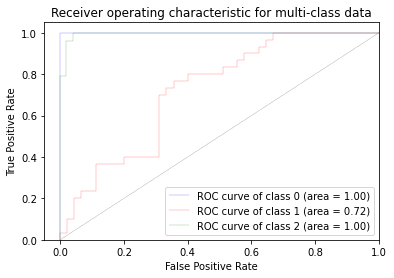

In [548]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import *
from sklearn.multiclass import *
from sklearn import svm
import itertools

iris = load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = itertools.cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=0.2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=0.2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [83]:
from sklearn.datasets import load_iris
from sklearn.metrics import roc_auc_score
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(solver="liblinear").fit(X, y)
roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')

0.9913333333333334

### Prediction

In [37]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [48]:
df_adm_imputed_mean = pd.read_csv("/Users/yzm9199/Documents/NU/MIMIC/Delirium/df_adm_imputed_mean.csv", encoding = 'utf8', sep=",")

df = df_adm_imputed_mean.loc[df_adm_imputed_mean['filter']!=-1]
df = df.loc[df['filter']!=0]
df = df.loc[df['cohort']!=-1]

df_n = df.loc[df['cohort']==0].sort_values('admittime').drop_duplicates(subset ='subject_id')

In [49]:
# Preprocessing
X_n = df_n[['df_weight','df_heart_rate','df_bp_systolic','df_bp_diastolic','df_bp_mean','df_temperature','df_albumin','df_alp','df_alt','df_ast','df_anion_gap','df_baseexcess','df_bicarbonate','df_bun','df_calcium','df_chloride','df_ck_cpk','df_creatinine','df_fio2','df_glucose','df_hematocrit','df_hemoglobin','df_inr','df_lactate','df_ldh','df_magnesium','df_mch','df_mchc','df_mcv','df_basophils','df_eosinophils','df_lymphocytes','df_monocytes','df_neutrophils','df_pao2','df_pco2','df_peep','df_ph','df_platelets','df_potassium','df_pt','df_ptt','df_rbc','df_rdw','df_so2','df_sodium','df_total_bili','df_totalco2','df_troponin','df_urea_nitrogen','df_wbc','ast_alt','bun_creatinine','fio2_pao2','so2_fio2','neutrophil_lymphocyte','platelet_rbc']]
X_n = preprocessing.StandardScaler().fit(X_n).transform(X_n)
y_n = model.predict(X_n)

df_n['cluster'] = y_n

In [97]:
# df_adm_imputed_mean_d = pd.read_csv("/Users/yzm9199/Documents/NU/MIMIC/Delirium/df_adm_imputed_mean_d.csv", encoding = 'utf8', sep=",")

df_3 = df_adm_imputed_mean_d.loc[df_adm_imputed_mean_d['cluster']==2]
df_2 = df_adm_imputed_mean_d.loc[df_adm_imputed_mean_d['cluster']==3]
df_1 = df_adm_imputed_mean_d.loc[df_adm_imputed_mean_d['cluster']==0]
df_0 = df_adm_imputed_mean_d.loc[df_adm_imputed_mean_d['cluster']==1]

In [98]:
df_n3 = df_n.loc[df_n['cluster']==2]
df_n2 = df_n.loc[df_n['cluster']==3]
df_n1 = df_n.loc[df_n['cluster']==0]
df_n0 = df_n.loc[df_n['cluster']==1]

frames = [df_n,df_adm_imputed_mean_d]
df_all = pd.concat(frames)
frames = [df_n3,df_3]
df3 = pd.concat(frames)
frames = [df_n2,df_2]
df2 = pd.concat(frames)
frames = [df_n1,df_1]
df1 = pd.concat(frames)
frames = [df_n0,df_0]
df0 = pd.concat(frames)

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

## Preprocessing
X_all = df_all[['anchor_age','subject_type','adm_type','df_vent','df_weight','df_heart_rate','df_bp_systolic','df_bp_diastolic','df_bp_mean','df_temperature','df_albumin','df_alp','df_alt','df_ast','df_anion_gap','df_baseexcess','df_bicarbonate','df_bun','df_calcium','df_chloride','df_ck_cpk','df_creatinine','df_fio2','df_glucose','df_hematocrit','df_hemoglobin','df_inr','df_lactate','df_ldh','df_magnesium','df_mch','df_mchc','df_mcv','df_basophils','df_eosinophils','df_lymphocytes','df_monocytes','df_neutrophils','df_pao2','df_pco2','df_peep','df_ph','df_platelets','df_potassium','df_pt','df_ptt','df_rbc','df_rdw','df_so2','df_sodium','df_total_bili','df_totalco2','df_troponin','df_urea_nitrogen','df_wbc','ast_alt','bun_creatinine','fio2_pao2','so2_fio2','neutrophil_lymphocyte','platelet_rbc']]
X_all = preprocessing.StandardScaler().fit(X_all).transform(X_all)
y_all = df_all['cohort'].values
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=4)
print ('Train set all:', X_train_all.shape,  y_train_all.shape)
print ('Test set all:', X_test_all.shape,  y_test_all.shape)
# xgboost
XGB_all = XGBClassifier()
XGB_all.fit(X_train_all, y_train_all, eval_metric=['auc','error','logloss'])
#logstic
LR_all = LogisticRegression(C=0.01).fit(X_train_all,y_train_all)
#decision tree
DT_all = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_all.fit(X_train_all,y_train_all)

## Preprocessing
X3 = df3[['anchor_age','subject_type','adm_type','df_vent','df_weight','df_heart_rate','df_bp_systolic','df_bp_diastolic','df_bp_mean','df_temperature','df_albumin','df_alp','df_alt','df_ast','df_anion_gap','df_baseexcess','df_bicarbonate','df_bun','df_calcium','df_chloride','df_ck_cpk','df_creatinine','df_fio2','df_glucose','df_hematocrit','df_hemoglobin','df_inr','df_lactate','df_ldh','df_magnesium','df_mch','df_mchc','df_mcv','df_basophils','df_eosinophils','df_lymphocytes','df_monocytes','df_neutrophils','df_pao2','df_pco2','df_peep','df_ph','df_platelets','df_potassium','df_pt','df_ptt','df_rbc','df_rdw','df_so2','df_sodium','df_total_bili','df_totalco2','df_troponin','df_urea_nitrogen','df_wbc','ast_alt','bun_creatinine','fio2_pao2','so2_fio2','neutrophil_lymphocyte','platelet_rbc']]
X3 = preprocessing.StandardScaler().fit(X3).transform(X3)
y3 = df3['cohort'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=4)
print ('Train set 3:', X_train3.shape,  y_train3.shape)
print ('Test set 3:', X_test3.shape,  y_test3.shape)
# xgboost
XGB3 = XGBClassifier()
XGB3.fit(X_train3, y_train3, eval_metric=['auc','error','logloss'])
#logstic
LR3 = LogisticRegression(C=0.01).fit(X_train3,y_train3)
#decision tree
DT3 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT3.fit(X_train3,y_train3)

## Preprocessing
X2 = df2[['anchor_age','subject_type','adm_type','df_vent','df_weight','df_heart_rate','df_bp_systolic','df_bp_diastolic','df_bp_mean','df_temperature','df_albumin','df_alp','df_alt','df_ast','df_anion_gap','df_baseexcess','df_bicarbonate','df_bun','df_calcium','df_chloride','df_ck_cpk','df_creatinine','df_fio2','df_glucose','df_hematocrit','df_hemoglobin','df_inr','df_lactate','df_ldh','df_magnesium','df_mch','df_mchc','df_mcv','df_basophils','df_eosinophils','df_lymphocytes','df_monocytes','df_neutrophils','df_pao2','df_pco2','df_peep','df_ph','df_platelets','df_potassium','df_pt','df_ptt','df_rbc','df_rdw','df_so2','df_sodium','df_total_bili','df_totalco2','df_troponin','df_urea_nitrogen','df_wbc','ast_alt','bun_creatinine','fio2_pao2','so2_fio2','neutrophil_lymphocyte','platelet_rbc']]
X2 = preprocessing.StandardScaler().fit(X2).transform(X2)
y2 = df2['cohort'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=4)
print ('Train set 2:', X_train2.shape,  y_train2.shape)
print ('Test set 2:', X_test2.shape,  y_test2.shape)
# xgboost
XGB2 = XGBClassifier()
XGB2.fit(X_train2, y_train2, eval_metric=['auc','error','logloss'])
#logstic
LR2 = LogisticRegression(C=0.01).fit(X_train2,y_train2)
#decision tree
DT2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT2.fit(X_train2,y_train2)

## Preprocessing
X1 = df1[['anchor_age','subject_type','adm_type','df_vent','df_weight','df_heart_rate','df_bp_systolic','df_bp_diastolic','df_bp_mean','df_temperature','df_albumin','df_alp','df_alt','df_ast','df_anion_gap','df_baseexcess','df_bicarbonate','df_bun','df_calcium','df_chloride','df_ck_cpk','df_creatinine','df_fio2','df_glucose','df_hematocrit','df_hemoglobin','df_inr','df_lactate','df_ldh','df_magnesium','df_mch','df_mchc','df_mcv','df_basophils','df_eosinophils','df_lymphocytes','df_monocytes','df_neutrophils','df_pao2','df_pco2','df_peep','df_ph','df_platelets','df_potassium','df_pt','df_ptt','df_rbc','df_rdw','df_so2','df_sodium','df_total_bili','df_totalco2','df_troponin','df_urea_nitrogen','df_wbc','ast_alt','bun_creatinine','fio2_pao2','so2_fio2','neutrophil_lymphocyte','platelet_rbc']]
X1 = preprocessing.StandardScaler().fit(X1).transform(X1)
y1 = df1['cohort'].values
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=4)
print ('Train set 1:', X_train1.shape,  y_train1.shape)
print ('Test set 1:', X_test1.shape,  y_test1.shape)
# xgboost
XGB1 = XGBClassifier()
XGB1.fit(X_train1, y_train1, eval_metric=['auc','error','logloss'])
#logstic
LR1 = LogisticRegression(C=0.01).fit(X_train1,y_train1)
#decision tree
DT1 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT1.fit(X_train1,y_train1)

## Preprocessing
X0 = df0[['anchor_age','subject_type','adm_type','df_vent','df_weight','df_heart_rate','df_bp_systolic','df_bp_diastolic','df_bp_mean','df_temperature','df_albumin','df_alp','df_alt','df_ast','df_anion_gap','df_baseexcess','df_bicarbonate','df_bun','df_calcium','df_chloride','df_ck_cpk','df_creatinine','df_fio2','df_glucose','df_hematocrit','df_hemoglobin','df_inr','df_lactate','df_ldh','df_magnesium','df_mch','df_mchc','df_mcv','df_basophils','df_eosinophils','df_lymphocytes','df_monocytes','df_neutrophils','df_pao2','df_pco2','df_peep','df_ph','df_platelets','df_potassium','df_pt','df_ptt','df_rbc','df_rdw','df_so2','df_sodium','df_total_bili','df_totalco2','df_troponin','df_urea_nitrogen','df_wbc','ast_alt','bun_creatinine','fio2_pao2','so2_fio2','neutrophil_lymphocyte','platelet_rbc']]
X0 = preprocessing.StandardScaler().fit(X0).transform(X0)
y0 = df0['cohort'].values
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, y0, test_size=0.2, random_state=4)
print ('Train set 0:', X_train0.shape,  y_train0.shape)
print ('Test set 0:', X_test0.shape,  y_test0.shape)
# xgboost
XGB0 = XGBClassifier()
XGB0.fit(X_train0, y_train0, eval_metric=['auc','error','logloss'])
#logstic
LR0 = LogisticRegression(C=0.01).fit(X_train0,y_train0)
#decision tree
DT0 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT0.fit(X_train0,y_train0)

Train set all: (99512, 61) (99512,)
Test set all: (24878, 61) (24878,)


/Users/yzm9199/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Train set 3: (12436, 61) (12436,)
Test set 3: (3110, 61) (3110,)


/Users/yzm9199/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Train set 2: (46858, 61) (46858,)
Test set 2: (11715, 61) (11715,)


/Users/yzm9199/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Train set 1: (5330, 61) (5330,)
Test set 1: (1333, 61) (1333,)


/Users/yzm9199/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Train set 0: (34886, 61) (34886,)
Test set 0: (8722, 61) (8722,)


/Users/yzm9199/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [107]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

lst0_acc = []
lst0_f1w = []
lst0_auc = []
y_pred_XGB0 = XGB0.predict(X_test0)
y_pred_LR0 = LR0.predict(X_test0)
y_pred_DT0 = DT0.predict(X_test0)
y_pred_prob_XGB0 = XGB0.predict_proba(X_test0)[:, 1]
y_pred_prob_LR0 = LR0.predict_proba(X_test0)[:, 1]
y_pred_prob_DT0 = DT0.predict_proba(X_test0)[:, 1]
accuracy = accuracy_score(y_test0, y_pred_XGB0)
lst0_acc.append(accuracy)
f1_wt = f1_score(y_test0, y_pred_XGB0, average='weighted')
lst0_f1w.append(f1_wt)
print('F1 score XGB0: %f' % f1_wt)
auc = roc_auc_score(y_test0,y_pred_prob_XGB0)
print('AUC XGB0: %f' % auc)
lst0_auc.append(auc)
accuracy = accuracy_score(y_test0, y_pred_LR0)
lst0_acc.append(accuracy)
f1_wt = f1_score(y_test0, y_pred_LR0, average='weighted')
lst0_f1w.append(f1_wt)
print('F1 score LR0: %f' % f1_wt)
auc = roc_auc_score(y_test0,y_pred_prob_LR0)
print('AUC LR0: %f' % auc)
lst0_auc.append(auc)
accuracy = accuracy_score(y_test0, y_pred_DT0)
lst0_acc.append(accuracy)
f1_wt = f1_score(y_test0, y_pred_DT0, average='weighted')
lst0_f1w.append(f1_wt)
print('F1 score DT0: %f' % f1_wt)
auc = roc_auc_score(y_test0,y_pred_prob_DT0)
print('AUC DT0: %f' % auc)
lst0_auc.append(auc)

lst1_acc = []
lst1_f1w = []
lst1_auc = []
y_pred_XGB1 = XGB1.predict(X_test1)
y_pred_LR1 = LR1.predict(X_test1)
y_pred_DT1 = DT1.predict(X_test1)
y_pred_prob_XGB1 = XGB1.predict_proba(X_test1)[:, 1]
y_pred_prob_LR1 = LR1.predict_proba(X_test1)[:, 1]
y_pred_prob_DT1 = DT1.predict_proba(X_test1)[:, 1]
accuracy = accuracy_score(y_test1, y_pred_XGB1)
lst1_acc.append(accuracy)
f1_wt = f1_score(y_test1, y_pred_XGB1, average='weighted')
lst1_f1w.append(f1_wt)
print('F1 score XGB1: %f' % f1_wt)
auc = roc_auc_score(y_test1,y_pred_prob_XGB1)
print('AUC XGB1: %f' % auc)
lst1_auc.append(auc)
accuracy = accuracy_score(y_test1, y_pred_LR1)
lst1_acc.append(accuracy)
f1_wt = f1_score(y_test1, y_pred_LR1, average='weighted')
lst1_f1w.append(f1_wt)
print('F1 score LR1: %f' % f1_wt)
auc = roc_auc_score(y_test1,y_pred_prob_LR1)
print('AUC LR1: %f' % auc)
lst1_auc.append(auc)
accuracy = accuracy_score(y_test1, y_pred_DT1)
lst1_acc.append(accuracy)
f1_wt = f1_score(y_test1, y_pred_DT1, average='weighted')
lst1_f1w.append(f1_wt)
print('F1 score DT1: %f' % f1_wt)
auc = roc_auc_score(y_test1,y_pred_prob_DT1)
print('AUC DT1: %f' % auc)
lst1_auc.append(auc)

lst2_acc = []
lst2_f1w = []
lst2_auc = []
y_pred_XGB2 = XGB2.predict(X_test2)
y_pred_LR2 = LR2.predict(X_test2)
y_pred_DT2 = DT2.predict(X_test2)
y_pred_prob_XGB2 = XGB2.predict_proba(X_test2)[:, 1]
y_pred_prob_LR2 = LR2.predict_proba(X_test2)[:, 1]
y_pred_prob_DT2 = DT2.predict_proba(X_test2)[:, 1]
accuracy = accuracy_score(y_test2, y_pred_XGB2)
lst2_acc.append(accuracy)
f1_wt = f1_score(y_test2, y_pred_XGB2, average='weighted')
lst2_f1w.append(f1_wt)
print('F1 score XGB2: %f' % f1_wt)
auc = roc_auc_score(y_test2,y_pred_prob_XGB2)
print('AUC XGB2: %f' % auc)
lst2_auc.append(auc)
accuracy = accuracy_score(y_test2, y_pred_LR2)
lst2_acc.append(accuracy)
f1_wt = f1_score(y_test2, y_pred_LR2, average='weighted')
lst2_f1w.append(f1_wt)
print('F1 score LR2: %f' % f1_wt)
auc = roc_auc_score(y_test2,y_pred_prob_LR2)
print('AUC LR2: %f' % auc)
lst2_auc.append(auc)
accuracy = accuracy_score(y_test2, y_pred_DT2)
lst2_acc.append(accuracy)
f1_wt = f1_score(y_test2, y_pred_DT2, average='weighted')
lst2_f1w.append(f1_wt)
print('F1 score DT2: %f' % f1_wt)
auc = roc_auc_score(y_test2,y_pred_prob_DT2)
print('AUC DT2: %f' % auc)
lst2_auc.append(auc)

lst3_acc = []
lst3_f1w = []
lst3_auc = []
y_pred_XGB3 = XGB3.predict(X_test3)
y_pred_LR3 = LR3.predict(X_test3)
y_pred_DT3 = DT3.predict(X_test3)
y_pred_prob_XGB3 = XGB3.predict_proba(X_test3)[:, 1]
y_pred_prob_LR3 = LR3.predict_proba(X_test3)[:, 1]
y_pred_prob_DT3 = DT3.predict_proba(X_test3)[:, 1]
accuracy = accuracy_score(y_test3, y_pred_XGB3)
lst3_acc.append(accuracy)
f1_wt = f1_score(y_test3, y_pred_XGB3, average='weighted')
lst3_f1w.append(f1_wt)
print('F1 score XGB3: %f' % f1_wt)
auc = roc_auc_score(y_test3,y_pred_prob_XGB3)
print('AUC XGB3: %f' % auc)
lst3_auc.append(auc)
accuracy = accuracy_score(y_test3, y_pred_LR3)
lst3_acc.append(accuracy)
f1_wt = f1_score(y_test3, y_pred_LR3, average='weighted')
lst3_f1w.append(f1_wt)
print('F1 score LR3: %f' % f1_wt)
auc = roc_auc_score(y_test3,y_pred_prob_LR3)
print('AUC LR3: %f' % auc)
lst3_auc.append(auc)
accuracy = accuracy_score(y_test3, y_pred_DT3)
lst3_acc.append(accuracy)
f1_wt = f1_score(y_test3, y_pred_DT3, average='weighted')
lst3_f1w.append(f1_wt)
print('F1 score DT3: %f' % f1_wt)
auc = roc_auc_score(y_test3,y_pred_prob_DT3)
print('AUC DT3: %f' % auc)
lst3_auc.append(auc)

lst_all_acc = []
lst_all_f1w = []
lst_all_auc = []
y_pred_XGB_all = XGB_all.predict(X_test_all)
y_pred_LR_all = LR_all.predict(X_test_all)
y_pred_DT_all = DT_all.predict(X_test_all)
y_pred_prob_XGB_all = XGB_all.predict_proba(X_test_all)[:, 1]
y_pred_prob_LR_all = LR_all.predict_proba(X_test_all)[:, 1]
y_pred_prob_DT_all = DT_all.predict_proba(X_test_all)[:, 1]
accuracy = accuracy_score(y_test_all, y_pred_XGB_all)
lst_all_acc.append(accuracy)
f1_wt = f1_score(y_test_all, y_pred_XGB_all, average='weighted')
lst_all_f1w.append(f1_wt)
print('F1 score XGB_all: %f' % f1_wt)
auc = roc_auc_score(y_test_all,y_pred_prob_XGB_all)
print('AUC XGB_all: %f' % auc)
lst_all_auc.append(auc)
accuracy = accuracy_score(y_test_all, y_pred_LR_all)
lst_all_acc.append(accuracy)
f1_wt = f1_score(y_test_all, y_pred_LR_all, average='weighted')
lst_all_f1w.append(f1_wt)
print('F1 score LR_all: %f' % f1_wt)
auc = roc_auc_score(y_test_all,y_pred_prob_LR_all)
print('AUC LR_all: %f' % auc)
lst_all_auc.append(auc)
accuracy = accuracy_score(y_test_all, y_pred_DT_all)
lst_all_acc.append(accuracy)
f1_wt = f1_score(y_test_all, y_pred_DT_all, average='weighted')
lst_all_f1w.append(f1_wt)
print('F1 score DT_all: %f' % f1_wt)
auc = roc_auc_score(y_test_all,y_pred_prob_DT_all)
print('AUC DT_all: %f' % auc)
lst_all_auc.append(auc)

# np.row_stack((lst0_f1w,lst1_f1w,lst2_f1w,lst3_f1w,lst_all_f1w))
np.row_stack((lst0_auc,lst1_auc,lst2_auc,lst3_auc,lst_all_auc))

F1 score XGB0: 0.924282
AUC XGB0: 0.815867
F1 score LR0: 0.912086
AUC LR0: 0.808495
F1 score DT0: 0.899893
AUC DT0: 0.786470
F1 score XGB1: 0.940888
AUC XGB1: 0.843562
F1 score LR1: 0.940377
AUC LR1: 0.855840
F1 score DT1: 0.935535
AUC DT1: 0.834550
F1 score XGB2: 0.935380
AUC XGB2: 0.861358
F1 score LR2: 0.930818
AUC LR2: 0.841773
F1 score DT2: 0.931920
AUC DT2: 0.825960
F1 score XGB3: 0.877232
AUC XGB3: 0.719193
F1 score LR3: 0.876005
AUC LR3: 0.745200
F1 score DT3: 0.870022
AUC DT3: 0.724729
F1 score XGB_all: 0.886266
AUC XGB_all: 0.675618
F1 score LR_all: 0.887662
AUC LR_all: 0.690510
F1 score DT_all: 0.887328
AUC DT_all: 0.673518


array([[0.81586736, 0.80849497, 0.7864698 ],
       [0.84356238, 0.85584009, 0.83454972],
       [0.86135847, 0.84177294, 0.82595982],
       [0.71919339, 0.74519981, 0.72472857],
       [0.67561782, 0.69051034, 0.67351832]])

In [661]:
import scipy.stats as ss
importance_XGB0 = ss.rankdata(XGB0.feature_importances_)
importance_LR0 = ss.rankdata(abs(LR0.coef_[0]))
importance_DT0 = ss.rankdata(DT0.feature_importances_)
importance0 = np.column_stack((importance_XGB0,importance_LR0,importance_DT0))
importance0

importance_XGB1 = ss.rankdata(XGB1.feature_importances_)
importance_LR1 = ss.rankdata(abs(LR1.coef_[0]))
importance_DT1 = ss.rankdata(DT1.feature_importances_)
importance1 = np.column_stack((importance_XGB1,importance_LR1,importance_DT1))
importance1

importance_XGB2 = ss.rankdata(XGB2.feature_importances_)
importance_LR2 = ss.rankdata(abs(LR2.coef_[0]))
importance_DT2 = ss.rankdata(DT2.feature_importances_)
importance2 = np.column_stack((importance_XGB2,importance_LR2,importance_DT2))
importance2

importance_XGB3 = ss.rankdata(XGB3.feature_importances_)
importance_LR3 = ss.rankdata(abs(LR3.coef_[0]))
importance_DT3 = ss.rankdata(DT3.feature_importances_)
importance3 = np.column_stack((importance_XGB3,importance_LR3,importance_DT3))
importance3

importance_XGB_all = ss.rankdata(XGB_all.feature_importances_)
importance_LR_all = ss.rankdata(abs(LR_all.coef_[0]))
importance_DT_all = ss.rankdata(DT_all.feature_importances_)
importance_all = np.column_stack((importance_XGB_all,importance_LR_all,importance_DT_all))
importance_all

# importance_XGB0 = XGB0.feature_importances_
# importance_LR0 = LR0.coef_[0]
# importance_DT0 = DT0.feature_importances_
# importance0 = np.column_stack((importance_XGB0,importance_LR0,importance_DT0))
# importance0

# importance_XGB1 = XGB1.feature_importances_
# importance_LR1 = LR1.coef_[0]
# importance_DT1 = DT1.feature_importances_
# importance1 = np.column_stack((importance_XGB1,importance_LR1,importance_DT1))
# importance1

# importance_XGB2 = XGB2.feature_importances_
# importance_LR2 = LR2.coef_[0]
# importance_DT2 = DT2.feature_importances_
# importance2 = np.column_stack((importance_XGB2,importance_LR2,importance_DT2))
# importance2

# importance_XGB3 = XGB3.feature_importances_
# importance_LR3 = LR3.coef_[0]
# importance_DT3 = DT3.feature_importances_
# importance3 = np.column_stack((importance_XGB3,importance_LR3,importance_DT3))
# importance3

# importance_XGB_all = XGB_all.feature_importances_
# importance_LR_all = LR_all.coef_[0]
# importance_DT_all = DT_all.feature_importances_
# importance_all = np.column_stack((importance_XGB_all,importance_LR_all,importance_DT_all))
# importance_all

importance = np.column_stack((importance0,importance1,importance2,importance3,importance_all))
np.savetxt("/Users/yzm9199/Documents/NU/RWE/MIMIC/Delirium/importance.csv", importance, delimiter=',')   # X is an array

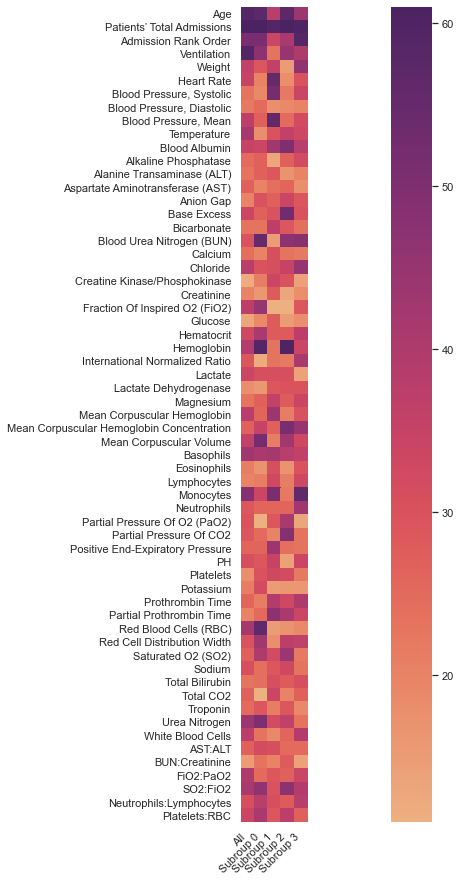

In [9]:
corr = [[59,57,38,57,44],
[61,61,59,61,60],
[51,51,34,41,59],
[59,47,23,45,40],
[36,29,36,15,46],
[35,20,55,18,30],
[23,19,52,22,34],
[22,25,18,19,20],
[37,27,56,25,32],
[42,18,30,36,33],
[35,34,43,50,38],
[25,27,13,27,32],
[23,27,29,17,20],
[27,20,24,26,18],
[20,30,27,34,29],
[34,27,30,53,30],
[23,23,37,29,24],
[30,55,15,47,48],
[24,20,31,23,22],
[38,30,31,35,45],
[12,21,34,30,14],
[20,16,28,13,18],
[37,45,11,11,29],
[13,19,28,15,18],
[33,41,28,28,37],
[39,59,23,60,34],
[29,12,23,22,41],
[34,31,31,31,14],
[18,16,29,30,30],
[23,27,36,28,34],
[38,26,44,21,30],
[27,35,27,51,45],
[36,52,21,43,33],
[43,41,42,38,36],
[21,17,31,17,30],
[20,21,33,21,33],
[49,34,51,22,56],
[29,26,26,26,43],
[30,11,29,41,13],
[29,25,20,49,23],
[26,26,44,24,23],
[31,29,35,14,34],
[18,30,33,32,22],
[21,32,15,16,16],
[26,21,39,33,40],
[20,25,47,41,34],
[42,56,15,17,19],
[30,43,18,37,36],
[27,40,32,44,22],
[31,24,29,33,23],
[23,24,31,28,31],
[27,11,34,20,27],
[25,29,21,29,19],
[44,50,32,36,23],
[37,23,19,26,39],
[27,32,31,25,25],
[15,23,20,28,14],
[40,25,29,27,34],
[41,46,30,47,39],
[31,38,31,28,38],
[34,41,29,37,27]]

sns.set(rc={'figure.figsize':(30,15)})

ax = sns.heatmap(
    corr, 
    vmin=11, vmax=61, center=36,
    cmap=sns.color_palette("flare", as_cmap=True),
    square=True,
    xticklabels = ['All', 'Subroup 0', 'Subroup 1', 'Subroup 2', 'Subroup 3'],
    yticklabels = ['Age','Patients’ Total Admissions','Admission Rank Order','Ventilation','Weight','Heart Rate','Blood Pressure, Systolic','Blood Pressure, Diastolic','Blood Pressure, Mean','Temperature','Blood Albumin','Alkaline Phosphatase','Alanine Transaminase (ALT)','Aspartate Aminotransferase (AST)','Anion Gap','Base Excess','Bicarbonate','Blood Urea Nitrogen (BUN)','Calcium','Chloride','Creatine Kinase/Phosphokinase','Creatinine','Fraction Of Inspired O2 (FiO2)','Glucose','Hematocrit','Hemoglobin','International Normalized Ratio','Lactate','Lactate Dehydrogenase','Magnesium','Mean Corpuscular Hemoglobin','Mean Corpuscular Hemoglobin Concentration','Mean Corpuscular Volume','Basophils','Eosinophils','Lymphocytes','Monocytes','Neutrophils','Partial Pressure Of O2 (PaO2)','Partial Pressure Of CO2','Positive End-Expiratory Pressure','PH','Platelets','Potassium','Prothrombin Time','Partial Prothrombin Time','Red Blood Cells (RBC)','Red Cell Distribution Width','Saturated O2 (SO2)','Sodium','Total Bilirubin','Total CO2','Troponin','Urea Nitrogen','White Blood Cells','AST:ALT','BUN:Creatinine','FiO2:PaO2','SO2:FiO2','Neutrophils:Lymphocytes','Platelets:RBC']
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);